<a href="https://colab.research.google.com/github/Dynamixmoses/Dynamixmoses/blob/main/Okesola_Moses_Olusola_WindEnergy_Project_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem Statement

##Business Context
Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).

##Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost. The nature of predictions made by the classification model will translate as follows:

True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
False positives (FP) are detections where there is no failure. These will result in inspection costs.
It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

##Data Description
The data provided is a transformed version of original data which was collected using sensors.
Train.csv - To be used for training and tuning of models.
Test.csv - To be used only for testing the performance of the final best model.
Both the datasets consist of 40 predictor variables and 1 target variable

In [ ]:
!pip install --upgrade pandas==2.0.3

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==2.0.3 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q

In [ ]:
pd.set_option('display.max_rows', None)

##Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    make_scorer,
    ConfusionMatrixDisplay,
)
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier
)
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [ ]:
data = pd.read_csv("//content/drive/MyDrive/Train.csv.csv" )
data1 = pd.read_csv("/content/drive/MyDrive/Test.csv.csv")

##Data Overview

##The first five rows of the Train set and Test set

data.head().T

In [ ]:
data1.head().T

0         1         2         3         4
V1      -0.613489  0.389608 -0.874861  0.238384  5.828225
V2      -3.819640 -0.512341 -0.640632  1.458607  2.768260
V3       2.202302  0.527053  4.084202  4.014528 -1.234530
V4       1.300420 -2.576776 -1.590454  2.534478  2.809264
V5      -1.184929 -1.016766  0.525855  1.196987 -1.641648
V6      -4.495964  2.235112 -1.957592 -3.117330 -1.406698
V7      -1.835817 -0.441301 -0.695367 -0.924035  0.568643
V8       4.722989 -4.405744  1.347309  0.269493  0.965043
V9       1.206140 -0.332869 -1.732348  1.322436  1.918379
V10     -0.341909  1.966794  0.466500  0.702345 -2.774855
V11     -5.122874  1.796544 -4.928214 -5.578345 -0.530016
V12      1.017021  0.410490  3.565070 -0.850662  1.374544
V13      4.818549  0.638328 -0.449329  2.590525 -0.650941
V14      3.269001 -1.389600 -0.656246  0.767418 -1.679466
V15     -2.984330 -1.883410 -0.166537 -2.390809 -0.379220
V16      1.387370 -5.017922 -1.630207 -2.341961 -4.443143
V17      2.032002 -3.827238  2.291865  0.571875  3.893857
V18     -0.511587  2.418060  2.396492 -0.933751 -0.607640
V19     -1.023069  1.762285  0.601278  0.508677  2.944931
V20      7.338733 -3.242297  1.793534  1.210715  0.367233
V21     -2.242244 -3.192960 -2.120238 -3.259524 -5.789081
V22      0.155489  1.857454  0.481968  0.104587  4.597528
V23      2.053786 -1.707954 -0.840707 -0.658875  4.450264
V24     -2.772273  0.633444  1.790197  1.498107  3.224941
V25      1.851369 -0.587898  1.874395  1.100305  0.396701
V26     -1.788696  0.083683  0.363930  4.142988  0.247765
V27     -0.277282  3.013935 -0.169063 -0.248446 -2.362047
V28     -1.255143 -0.182309 -0.483832 -1.136516  1.079378
V29     -3.832886  0.223917 -2.118982 -5.355810 -0.473076
V30     -1.504542  0.865228 -2.156586 -4.545931  2.242810
V31      1.586765 -1.782158  2.907291  3.808667 -3.591421
V32      2.291204 -2.474936 -1.318888  3.517918  1.773841
V33     -5.411388  2.493582 -2.997464 -3.074085 -1.501573
V34      0.870073  0.315165  0.459664 -0.284220 -2.226702
V35      0.574479  2.059288  0.619774  0.954576  4.776830
V36      4.157191  0.683859  5.631504  3.029331 -6.559698
V37      1.428093 -0.485452  1.323512 -1.367198 -0.805551
V38    -10.511342  5.128350 -1.752154 -3.412140 -0.276007
V39      0.454664  1.720744  1.808302  0.906000 -3.858207
V40     -1.448363 -1.488235  1.675748 -2.450889 -0.537694
Target   0.000000  0.000000  0.000000  0.000000  0.000000

##The last five rows of the Train and Test set

In [ ]:
data.tail().T

19995      19996     19997      19998     19999
V1     -2.071318   2.890264 -3.896979  -3.187322 -2.686903
V2     -1.088279   2.483069 -3.942407 -10.051662  1.961187
V3     -0.796174   5.643919 -0.351364   5.695955  6.137088
V4     -3.011720   0.937053 -2.417462  -4.370053  2.600133
V5     -2.287540  -1.380870  1.107546  -5.354758  2.657241
V6      2.807310   0.412051 -1.527623  -1.873044 -4.290882
V7      0.481428  -1.593386 -3.519882  -3.947210 -2.344267
V8      0.105171  -5.762498  2.054792   0.679420  0.974004
V9     -0.586599   2.150096 -0.233996  -2.389254 -1.027462
V10    -2.899398   0.272302 -0.357687   5.456756  0.497421
V11     8.868415  -2.094760 -3.781972   1.583029 -9.589075
V12     1.717155  -1.525834  2.180042   3.571478  3.176560
V13     1.357838   0.071573  6.111780   9.226573  1.054517
V14    -1.777135  -3.540142  1.984747   2.553587 -1.415882
V15     0.709780  -2.762006 -8.330002  -7.039109 -4.668611
V16     4.944939 -10.632206 -1.639184  -0.993573 -5.405377
V17    -3.100454  -0.495236 -0.914960  -9.664938  3.719759
V18    -1.199228   1.720074  5.672348   1.155224  2.892923
V19    -1.084629   3.871596 -3.924200   3.876895  2.328591
V20    -0.365044  -1.209610  2.133196   3.523634  1.457704
V21     3.131175  -8.222073 -4.502031  -7.015329 -6.428543
V22    -3.948103   2.120866  2.777178  -0.132037  1.818232
V23    -3.578469  -5.491808  5.727949  -3.446179  0.805897
V24    -8.139067   1.452340  1.619818  -4.801443  7.786026
V25    -1.936861   1.450002 -1.699691  -0.875727  0.330857
V26    -1.327691   3.684654 -0.041882  -3.811854  5.257424
V27    -0.402688   1.076760 -2.923094   5.422077 -4.867417
V28    -1.734796  -0.384175 -2.760158  -3.732322 -0.818941
V29     9.996461  -0.838593 -2.253766   0.608811 -5.667393
V30     6.955367  -0.748275  2.552033   5.256460 -2.860975
V31    -3.938493  -1.088553  0.981858   1.914766  4.674280
V32    -8.273996  -4.159092  7.112162   0.402812  6.620811
V33     5.745013   1.181466  1.476080   3.163661 -1.988786
V34     0.589014  -0.742412 -3.953710   3.752095 -1.348901
V35    -0.649988   5.368979  1.855555   8.529894  3.951801
V36    -3.043174  -0.693028  5.029209   8.450626  5.449706
V37     2.216461  -1.668971  2.082588   0.203958 -0.455411
V38     0.608723   3.659954 -6.409304  -7.129918 -2.202056
V39     0.178193   0.819863  1.477138   4.249394  1.678229
V40     2.927755  -1.987265 -0.874148  -6.112267 -1.974413
Target  1.000000   0.000000  0.000000   0.000000  0.000000

In [ ]:
data1.tail().T

4995      4996       4997      4998      4999
V1      -5.120451 -5.172498  -1.114136 -1.703241 -0.603701
V2       1.634804  1.171653  -0.403576  0.614650  0.959550
V3       1.251259  1.579105  -1.764875  6.220503 -0.720995
V4       4.035944  1.219922  -5.879475 -0.104132  8.229574
V5       3.291204  2.529627   3.571558  0.955916 -1.815610
V6      -2.932230 -0.668648   3.710802 -3.278706 -2.275547
V7      -1.328662 -2.618321  -2.482952 -1.633855 -2.574524
V8       1.754066 -2.000545  -0.307614 -0.103936 -1.041479
V9      -2.984586  0.633791  -0.921945  1.388152  4.129645
V10      1.248633 -0.578938  -2.999141 -1.065622 -2.731288
V11     -6.877747 -3.671247  -0.111655 -7.969807 -3.292371
V12      3.715160  0.460184  -1.976921  2.262126 -1.673752
V13     -2.511806  3.320582  -1.622992  3.134010  0.464506
V14     -1.394968 -1.074959  -0.945453 -0.485755 -1.645933
V15     -2.554137 -7.112535  -2.735095 -3.498287 -5.263407
V16     -2.197372 -4.355946  -0.813009 -4.561709 -7.987625
V17      4.771707 -0.001086   0.609751  3.135784  6.480488
V18      2.402944  3.698440   8.148839  2.536404  0.226333
V19      3.791758 -0.846390  -9.199173 -0.792224  4.963336
V20      0.486773 -0.222274  -3.872479  4.398442  6.752006
V21     -2.028078 -3.644960  -0.295705 -4.073022 -6.305771
V22      1.777923  0.736036   1.468382 -0.037573  3.270541
V23      3.667993  0.925657   2.884317 -2.371253  1.897225
V24     11.374878  3.277684   2.792106 -1.541981  3.270810
V25     -1.977092 -2.276759  -1.135704  2.907892 -0.637079
V26      2.251588  4.457628   1.197920  3.214506 -0.924996
V27     -7.318514 -4.542885  -4.341677 -0.168668 -6.758918
V28      1.906959 -1.348010  -2.869396 -1.541327  2.990181
V29     -3.733697 -1.779429   4.124074 -4.724387 -0.813841
V30     -0.012451  0.352203   4.196731 -5.525040  3.498989
V31      2.120487 -0.214294   3.470723  1.667974 -8.434720
V32      9.979118  4.423900   3.791778 -4.100352  2.369776
V33      0.063438  2.603811   7.481506 -5.949325 -1.062408
V34      0.217281 -2.152170 -10.061396  0.550372  0.790772
V35      3.036388  0.917401  -0.387166 -1.573640  4.951955
V36      2.109323  2.156586   1.848509  6.823936 -7.440825
V37     -0.557433  0.466963   1.818248  2.139307 -0.069506
V38      1.938718  0.470120  -1.245633 -4.036164 -0.918083
V39      0.512674  2.196756  -1.260876  3.436051 -2.291154
V40     -2.694194 -2.376515   7.474682  0.579249 -5.362891
Target   0.000000  0.000000   0.000000  0.000000  0.000000

##Check the shape of the Train and Test set

In [ ]:
data.shape

(20000, 41)

There are 20,000 rows and 41 columns in the train set.

In [ ]:
data1.shape

(5000, 41)

There are 5000 rows and 41 columns in the Test set.

##Check the data types of the columns for the Training and Testing dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22



* There are forty-one numeric columns( one integer and forty float type).

* There are null values both in V1 and V2 in the dataset.


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  


* There are forty-one numeric columns( one integer and forty float type).

* There are null values both in V1 and V2 in the dataset.

##Extract the columns of the Traind and Test dataset

In [ ]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40',
       'Target'],
      dtype='object')

In [ ]:
data1.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40',
       'Target'],
      dtype='object')

There are forty one columns in both the train and test sets, forty have independent variable, and one has dependent variable.

##Summary of of Training and Testing Dataset

In [ ]:
data.describe(include='all').T

count      mean       std        min       25%       50%       75%  \
V1      19982.0 -0.271996  3.441625 -11.876451 -2.737146 -0.747917  1.840112   
V2      19982.0  0.440430  3.150784 -12.319951 -1.640674  0.471536  2.543967   
V3      20000.0  2.484699  3.388963 -10.708139  0.206860  2.255786  4.566165   
V4      20000.0 -0.083152  3.431595 -15.082052 -2.347660 -0.135241  2.130615   
V5      20000.0 -0.053752  2.104801  -8.603361 -1.535607 -0.101952  1.340480   
V6      20000.0 -0.995443  2.040970 -10.227147 -2.347238 -1.000515  0.380330   
V7      20000.0 -0.879325  1.761626  -7.949681 -2.030926 -0.917179  0.223695   
V8      20000.0 -0.548195  3.295756 -15.657561 -2.642665 -0.389085  1.722965   
V9      20000.0 -0.016808  2.160568  -8.596313 -1.494973 -0.067597  1.409203   
V10     20000.0 -0.012998  2.193201  -9.853957 -1.411212  0.100973  1.477045   
V11     20000.0 -1.895393  3.124322 -14.832058 -3.922404 -1.921237  0.118906   
V12     20000.0  1.604825  2.930454 -12.948007 -0.396514  1.507841  3.571454   
V13     20000.0  1.580486  2.874658 -13.228247 -0.223545  1.637185  3.459886   
V14     20000.0 -0.950632  1.789651  -7.738593 -2.170741 -0.957163  0.270677   
V15     20000.0 -2.414993  3.354974 -16.416606 -4.415322 -2.382617 -0.359052   
V16     20000.0 -2.925225  4.221717 -20.374158 -5.634240 -2.682705 -0.095046   
V17     20000.0 -0.134261  3.345462 -14.091184 -2.215611 -0.014580  2.068751   
V18     20000.0  1.189347  2.592276 -11.643994 -0.403917  0.883398  2.571770   
V19     20000.0  1.181808  3.396925 -13.491784 -1.050168  1.279061  3.493299   
V20     20000.0  0.023608  3.669477 -13.922659 -2.432953  0.033415  2.512372   
V21     20000.0 -3.611252  3.567690 -17.956231 -5.930360 -3.532888 -1.265884   
V22     20000.0  0.951835  1.651547 -10.122095 -0.118127  0.974687  2.025594   
V23     20000.0 -0.366116  4.031860 -14.866128 -3.098756 -0.262093  2.451750   
V24     20000.0  1.134389  3.912069 -16.387147 -1.468062  0.969048  3.545975   
V25     20000.0 -0.002186  2.016740  -8.228266 -1.365178  0.025050  1.397112   
V26     20000.0  1.873785  3.435137 -11.834271 -0.337863  1.950531  4.130037   
V27     20000.0 -0.612413  4.368847 -14.904939 -3.652323 -0.884894  2.189177   
V28     20000.0 -0.883218  1.917713  -9.269489 -2.171218 -0.891073  0.375884   
V29     20000.0 -0.985625  2.684365 -12.579469 -2.787443 -1.176181  0.629773   
V30     20000.0 -0.015534  3.005258 -14.796047 -1.867114  0.184346  2.036229   
V31     20000.0  0.486842  3.461384 -13.722760 -1.817772  0.490304  2.730688   
V32     20000.0  0.303799  5.500400 -19.876502 -3.420469  0.052073  3.761722   
V33     20000.0  0.049825  3.575285 -16.898353 -2.242857 -0.066249  2.255134   
V34     20000.0 -0.462702  3.183841 -17.985094 -2.136984 -0.255008  1.436935   
V35     20000.0  2.229620  2.937102 -15.349803  0.336191  2.098633  4.064358   
V36     20000.0  1.514809  3.800860 -14.833178 -0.943809  1.566526  3.983939   
V37     20000.0  0.011316  1.788165  -5.478350 -1.255819 -0.128435  1.175533   
V38     20000.0 -0.344025  3.948147 -17.375002 -2.987638 -0.316849  2.279399   
V39     20000.0  0.890653  1.753054  -6.438880 -0.272250  0.919261  2.057540   
V40     20000.0 -0.875630  3.012155 -11.023935 -2.940193 -0.920806  1.119897   
Target  20000.0  0.055500  0.228959   0.000000  0.000000  0.000000  0.000000   

              max  
V1      15.493002  
V2      13.089269  
V3      17.090919  
V4      13.236381  
V5       8.133797  
V6       6.975847  
V7       8.006091  
V8      11.679495  
V9       8.137580  
V10      8.108472  
V11     11.826433  
V12     15.080698  
V13     15.419616  
V14      5.670664  
V15     12.246455  
V16     13.583212  
V17     16.756432  
V18     13.179863  
V19     13.237742  
V20     16.052339  
V21     13.840473  
V22      7.409856  
V23     14.458734  
V24     17.163291  
V25      8.223389  
V26     16.836410  
V27     17.560404  
V28      6.527643  
V29     10.722055  
V30     12.505812  
V31     17.255090  
V32     2

*  Target variable is either 0 or 1 in a train set.
*  All other variables ranges from ~ -18 to ~19 in a train set.



In [ ]:
data1.describe(include='all').T

count      mean       std        min       25%       50%       75%  \
V1      4995.0 -0.277622  3.466280 -12.381696 -2.743691 -0.764767  1.831313   
V2      4994.0  0.397928  3.139562 -10.716179 -1.649211  0.427369  2.444486   
V3      5000.0  2.551787  3.326607  -9.237940  0.314931  2.260428  4.587000   
V4      5000.0 -0.048943  3.413937 -14.682446 -2.292694 -0.145753  2.166468   
V5      5000.0 -0.080120  2.110870  -7.711569 -1.615238 -0.131890  1.341197   
V6      5000.0 -1.042138  2.005444  -8.924196 -2.368853 -1.048571  0.307555   
V7      5000.0 -0.907922  1.769017  -8.124230 -2.054259 -0.939695  0.212228   
V8      5000.0 -0.574592  3.331911 -12.252731 -2.642088 -0.357943  1.712896   
V9      5000.0  0.030121  2.174139  -6.785495 -1.455712 -0.079891  1.449548   
V10     5000.0  0.018524  2.145437  -8.170956 -1.353320  0.166292  1.511248   
V11     5000.0 -2.008615  3.112220 -13.151753 -4.050432 -2.043122  0.044069   
V12     5000.0  1.576413  2.907401  -8.164048 -0.449674  1.488253  3.562626   
V13     5000.0  1.622456  2.882892 -11.548209 -0.126012  1.718649  3.464604   
V14     5000.0 -0.921097  1.803470  -7.813929 -2.110952 -0.896011  0.272324   
V15     5000.0 -2.452174  3.387041 -15.285768 -4.479072 -2.417131 -0.432943   
V16     5000.0 -3.018503  4.264407 -20.985779 -5.648343 -2.773763 -0.178105   
V17     5000.0 -0.103721  3.336513 -13.418281 -2.227683  0.047462  2.111907   
V18     5000.0  1.195606  2.586403 -12.214016 -0.408850  0.881395  2.604014   
V19     5000.0  1.210490  3.384662 -14.169635 -1.026394  1.295864  3.526278   
V20     5000.0  0.138429  3.657171 -13.719620 -2.325454  0.193386  2.539550   
V21     5000.0 -3.664398  3.577841 -16.340707 -5.944369 -3.662870 -1.329645   
V22     5000.0  0.961960  1.640414  -6.740239 -0.047728  0.986020  2.029321   
V23     5000.0 -0.422182  4.056714 -14.422274 -3.162690 -0.279222  2.425911   
V24     5000.0  1.088841  3.968207 -12.315545 -1.623203  0.912815  3.537195   
V25     5000.0  0.061235  2.010227  -6.770139 -1.298377  0.076703  1.428491   
V26     5000.0  1.847261  3.400330 -11.414019 -0.242470  1.917032  4.156106   
V27     5000.0 -0.552397  4.402947 -13.177038 -3.662591 -0.871982  2.247257   
V28     5000.0 -0.867678  1.926181  -7.933388 -2.159811 -0.930695  0.420587   
V29     5000.0 -1.095805  2.655454  -9.987800 -2.861373 -1.340547  0.521843   
V30     5000.0 -0.118699  3.023292 -12.438434 -1.996743  0.112463  1.946450   
V31     5000.0  0.468810  3.446324 -11.263271 -1.822421  0.485742  2.779008   
V32     5000.0  0.232567  5.585628 -17.244168 -3.556267 -0.076694  3.751857   
V33     5000.0 -0.080115  3.538624 -14.903781 -2.348121 -0.159713  2.099160   
V34     5000.0 -0.392663  3.166101 -14.699725 -2.009604 -0.171745  1.465402   
V35     5000.0  2.211205  2.948426 -12.260591  0.321818  2.111750  4.031639   
V36     5000.0  1.594845  3.774970 -12.735567 -0.866066  1.702964  4.104409   
V37     5000.0  0.022931  1.785320  -5.079070 -1.240526 -0.110415  1.237522   
V38     5000.0 -0.405659  3.968936 -15.334533 -2.984480 -0.381162  2.287998   
V39     5000.0  0.938800  1.716502  -5.451050 -0.208024  0.959152  2.130769   
V40     5000.0 -0.932406  2.978193 -10.076234 -2.986587 -1.002764  1.079738   
Target  5000.0  0.056400  0.230716   0.000000  0.000000  0.000000  0.000000   

              max  
V1      13.504352  
V2      14.079073  
V3      15.314503  
V4      12.140157  
V5       7.672835  
V6       5.067685  
V7       7.616182  
V8      10.414722  
V9       8.850720  
V10      6.598728  
V11      9.956400  
V12     12.983644  
V13     12.620041  
V14      5.734112  
V15     11.673420  
V16     13.975843  
V17     19.776592  
V18     13.642235  
V19     12.427997  
V20     13.870565  
V21     11.046925  
V22      7.505291  
V23     13.180887  
V24     17.806035  
V25      6.556937  
V26     17.528193  
V27     17.290161  
V28      7.415659  
V29     14.039466  
V30     10.314976  
V31     12.558928  
V32     26.539391  
V33     13.323517  
V34     12

 * Target variable ris either 0 or 1 in a test set.

* All other variables ranges from ~ -21 to ~27 in a test set.


##Dataset Sanity Check

##Check for duplicated values in Train and Test dataset.

In [ ]:
print(data.duplicated().sum())
print(data1.duplicated().sum())


0
0




*   There are no duplicate values in the train dataset.
*  There are no duplicate values in the test dataset.



##Check for missing values in Train and Test dataset

In [ ]:
print(data.isna().sum())
print(data1.isna().sum())


V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64
V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       

*   There are missing values in the train dataset.
*   There are missing values in the train dataset.

## Copy the Train and Test Set into new Dataframes to keep the original sets intact

In [ ]:
df = data.copy()
df1 = data1.copy()

##Exploratory Data Analysis - Univariate and Bivariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

##Univariate Analysis

**Plotting histograms and boxplots for all the variables**

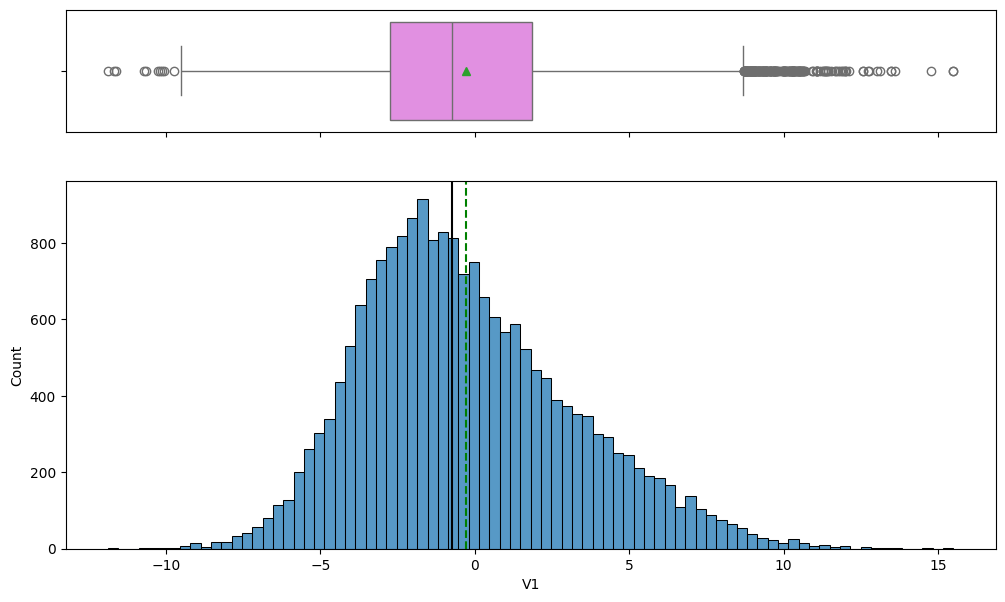

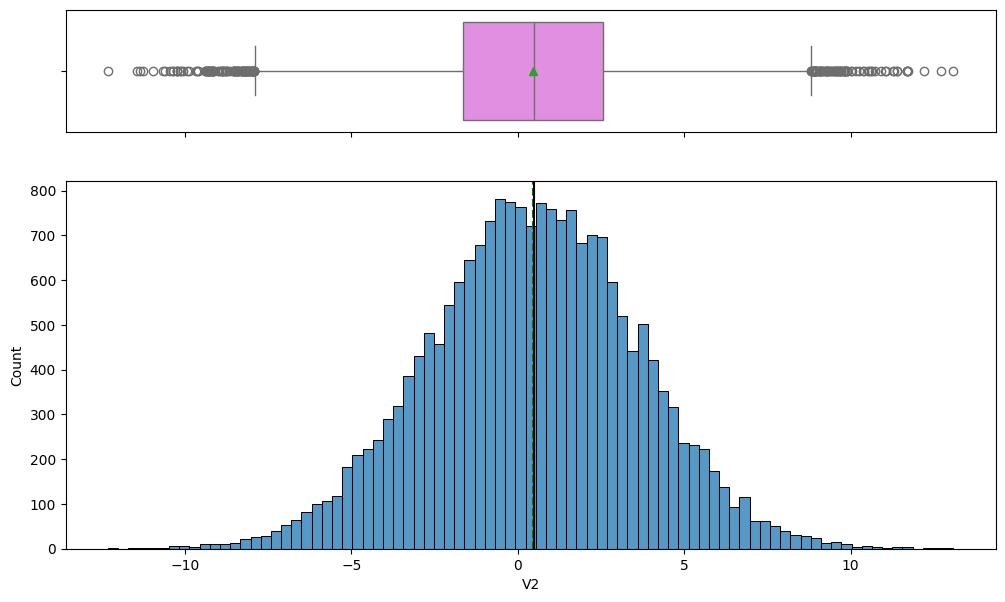

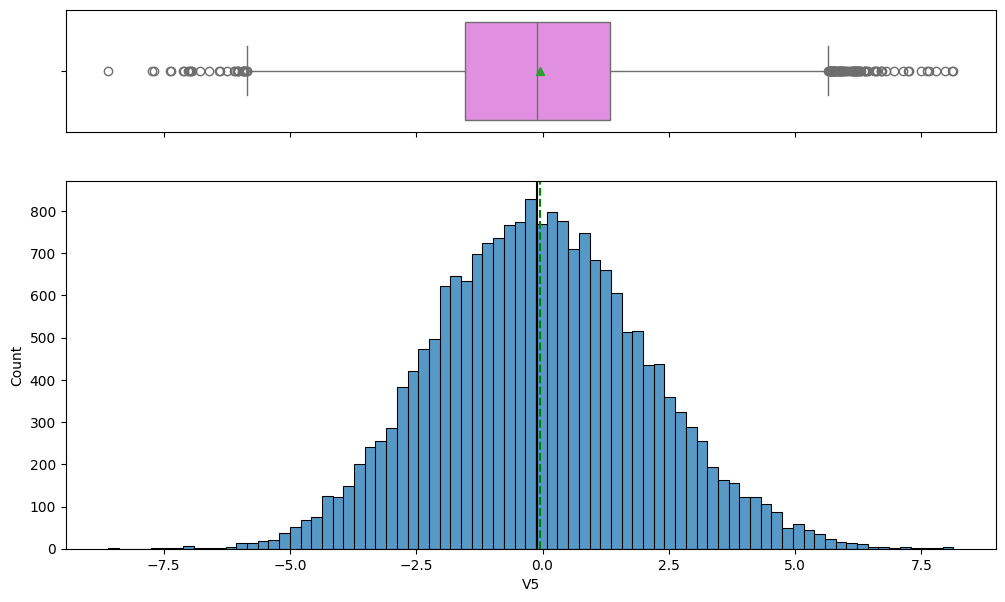

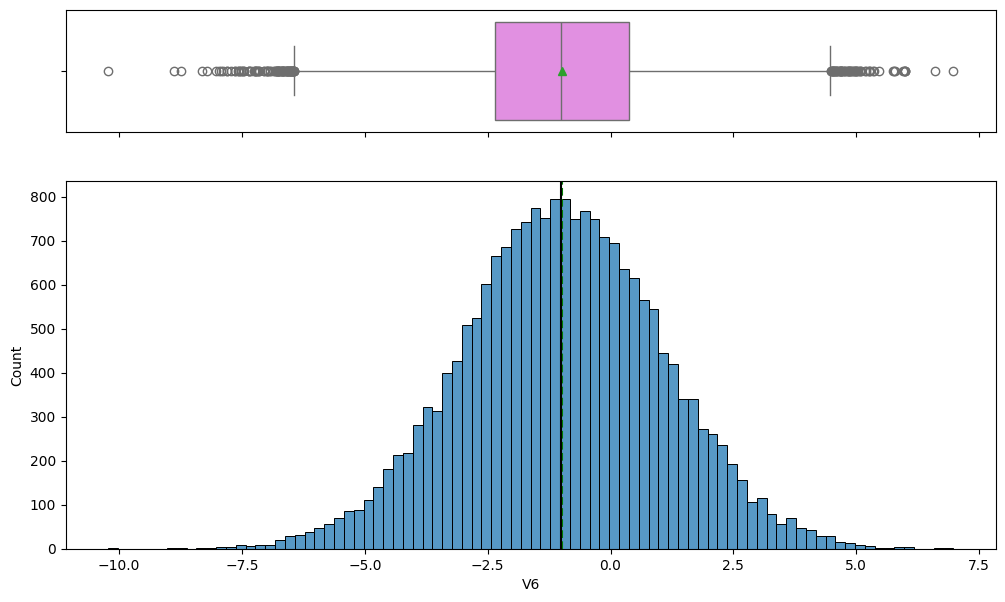

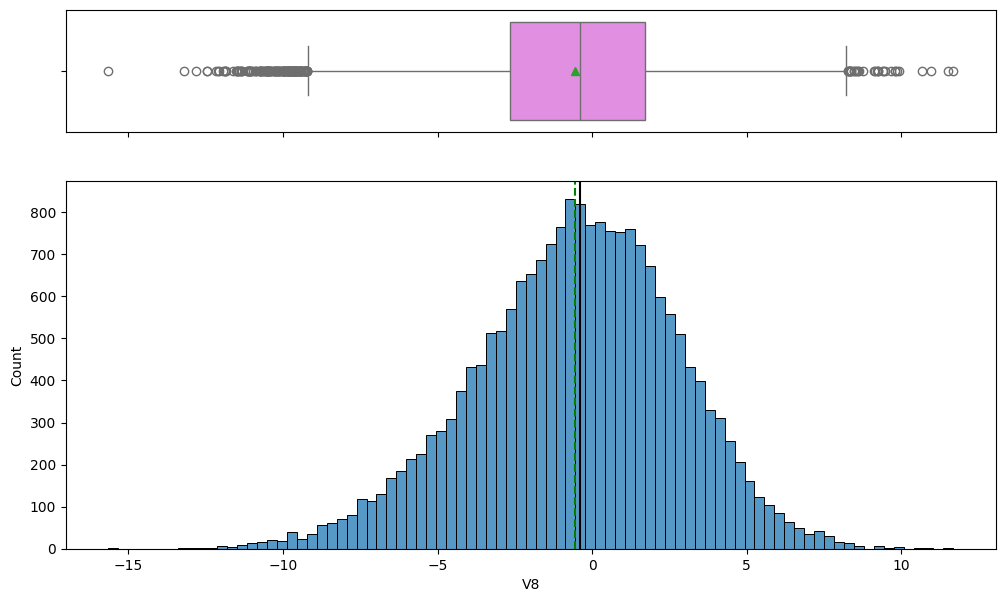

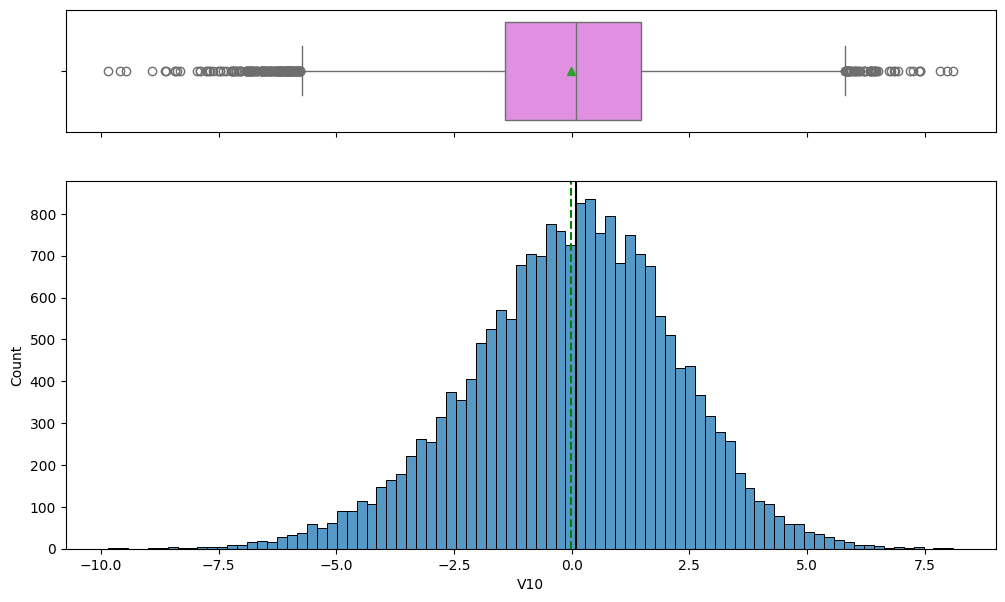

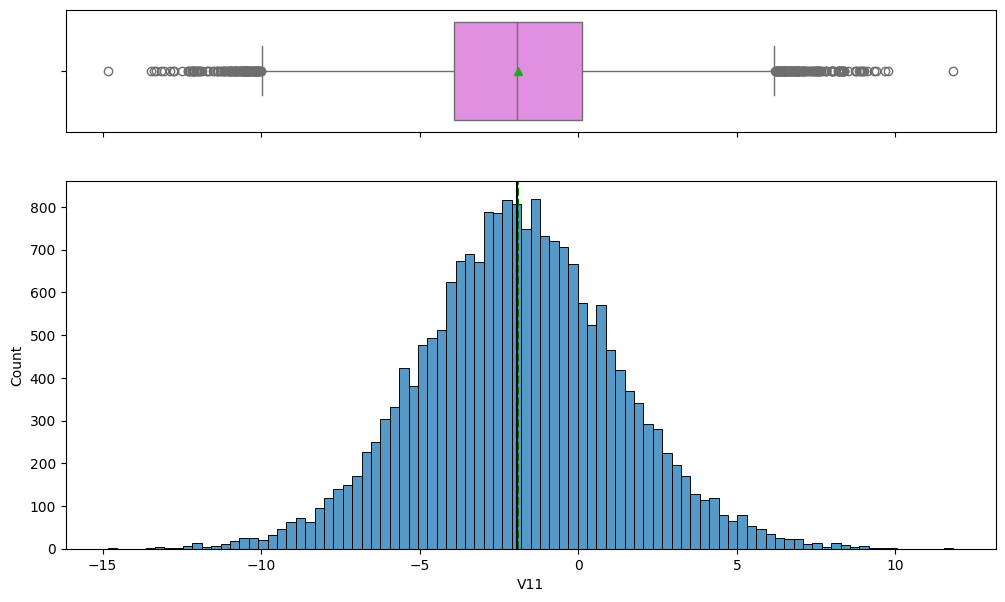

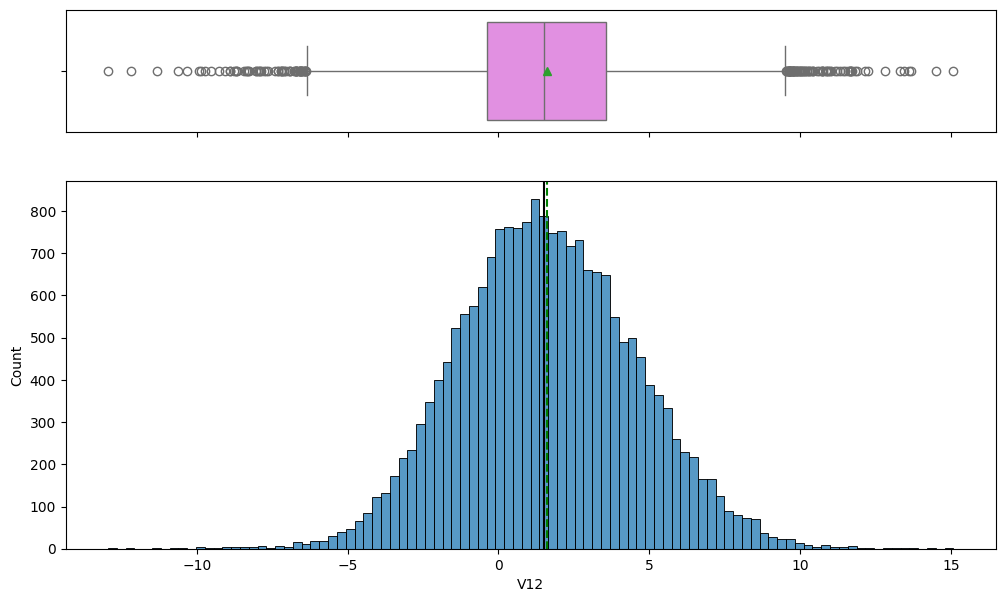

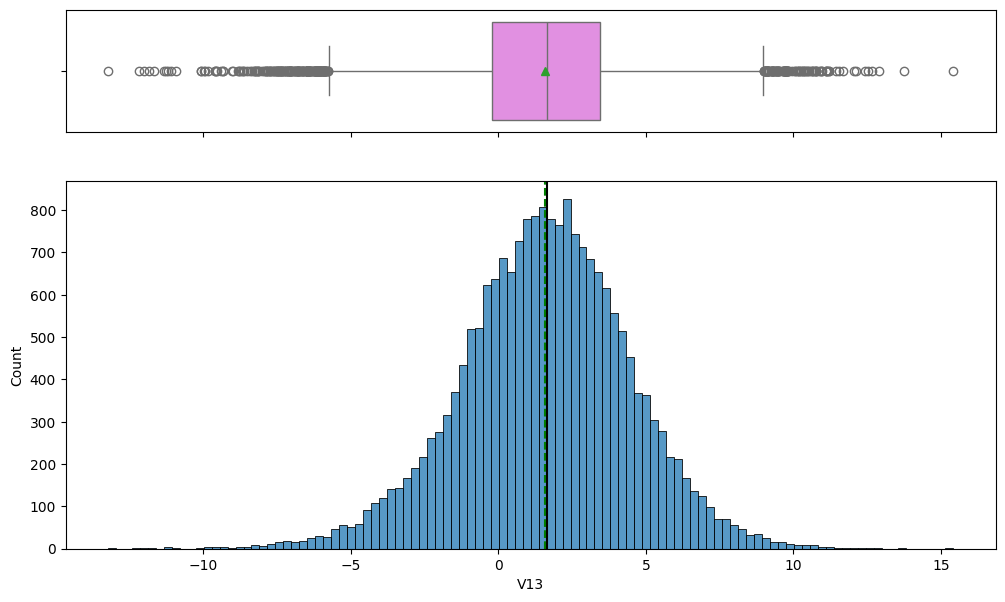

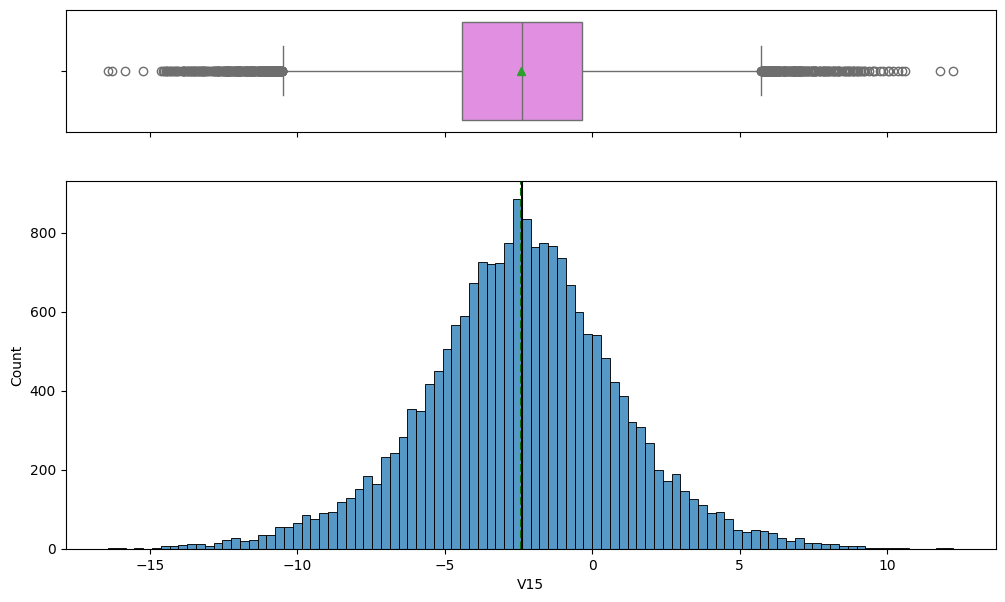

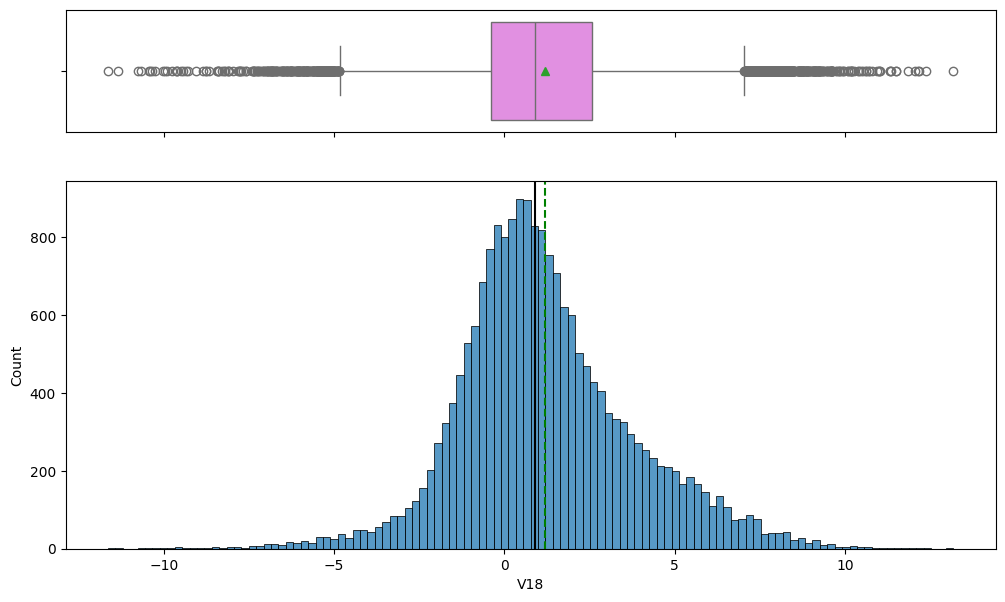

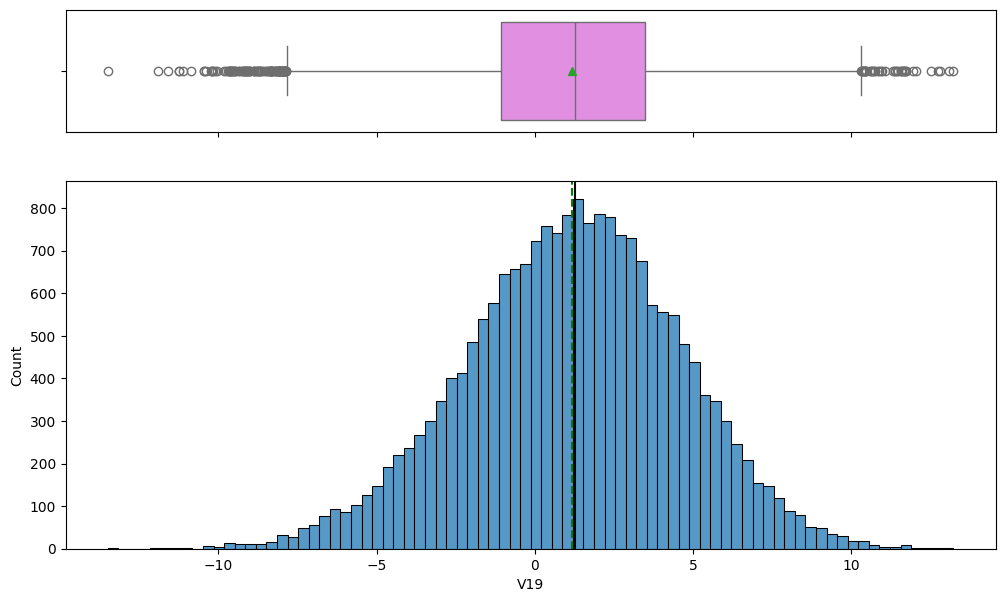

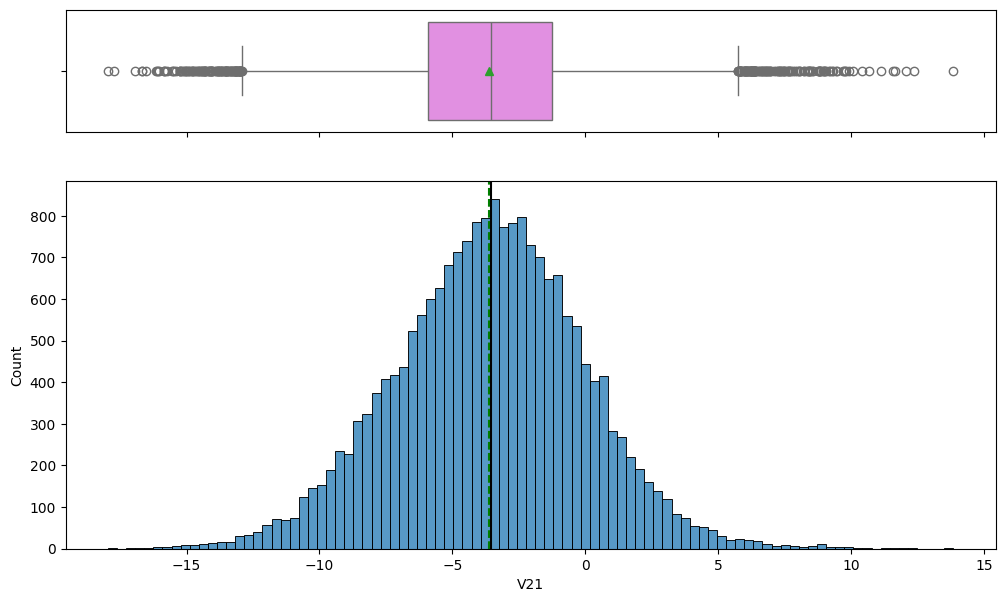

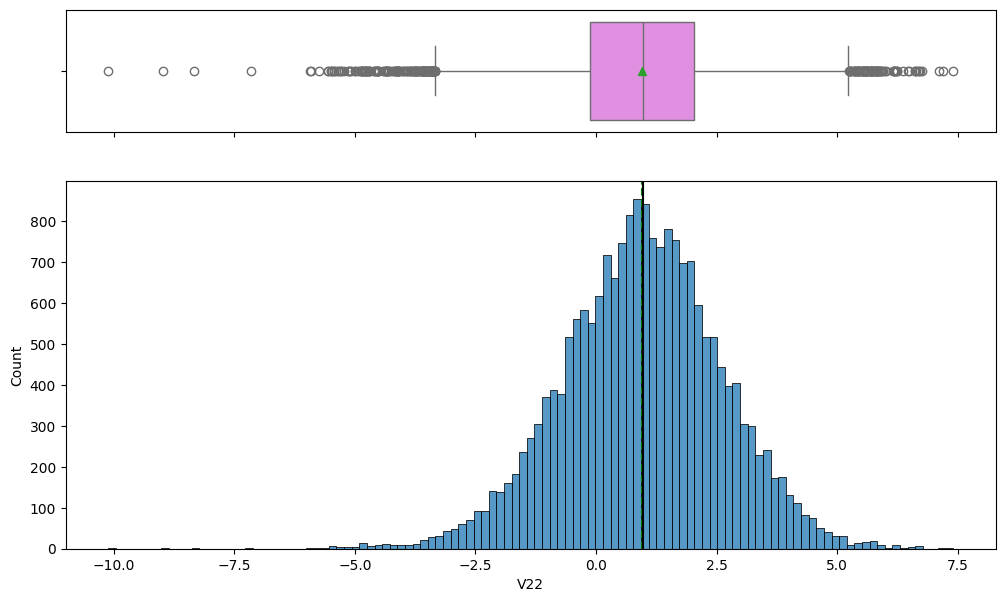

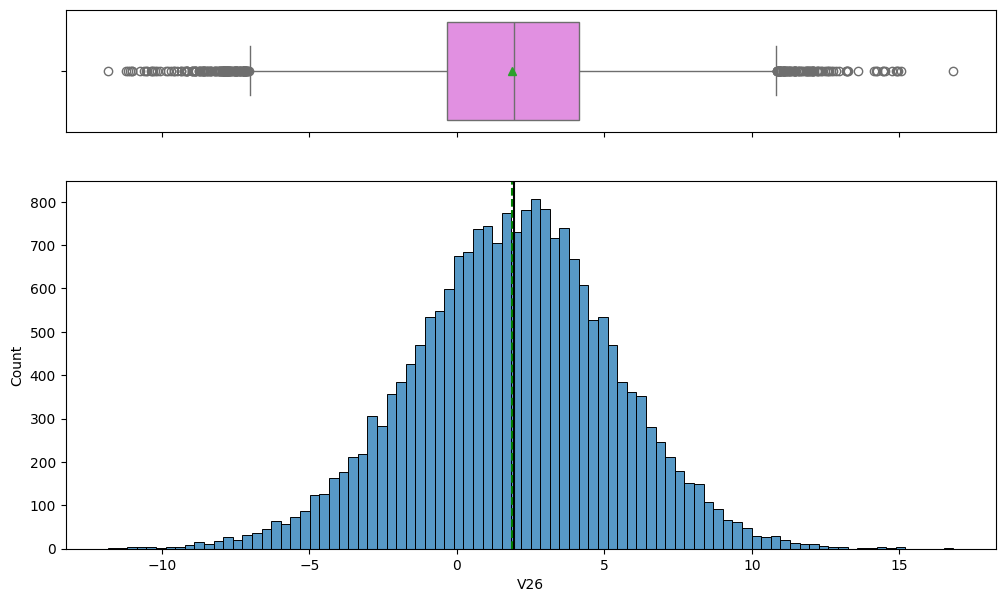

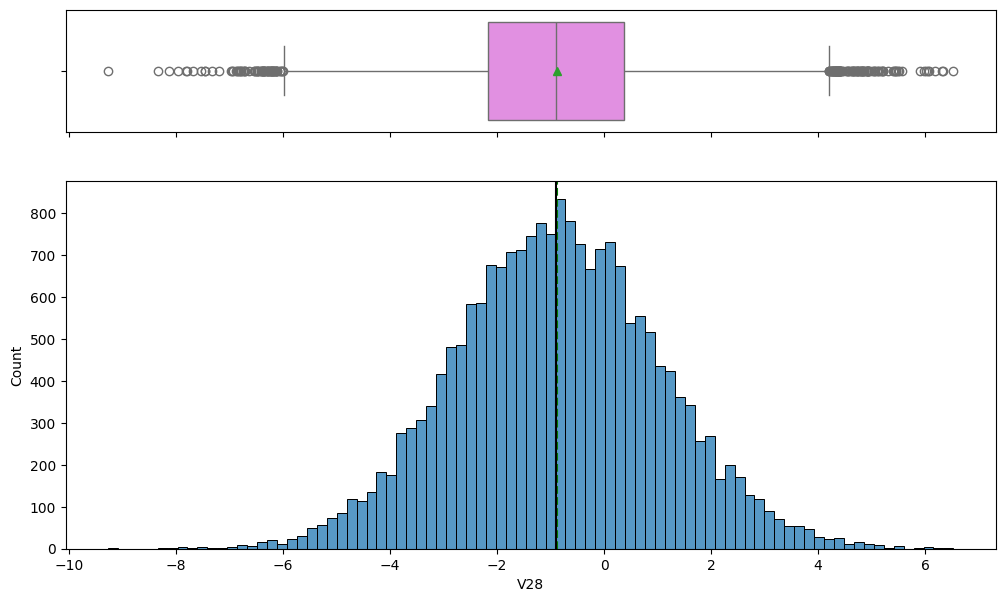

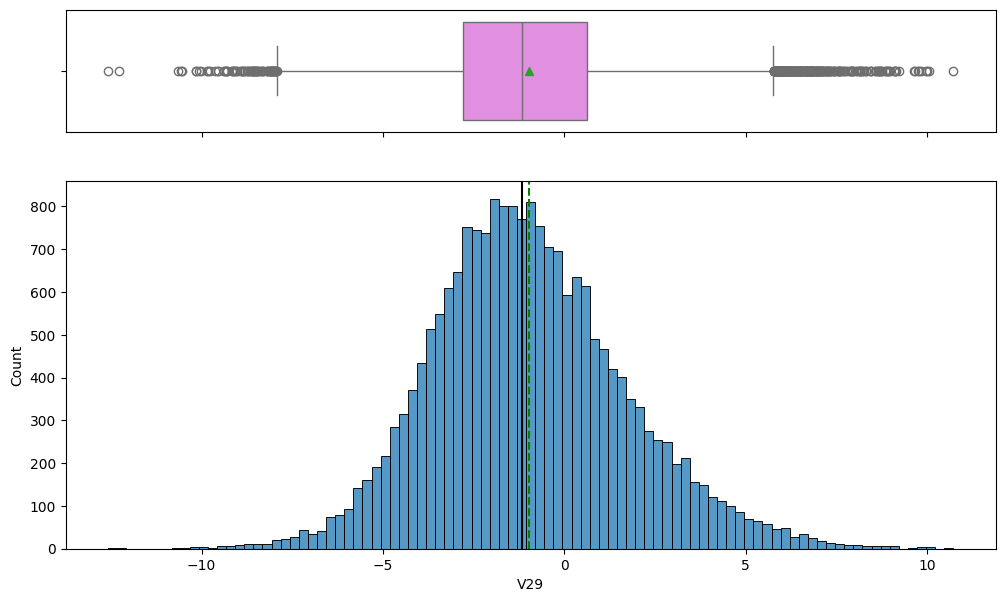

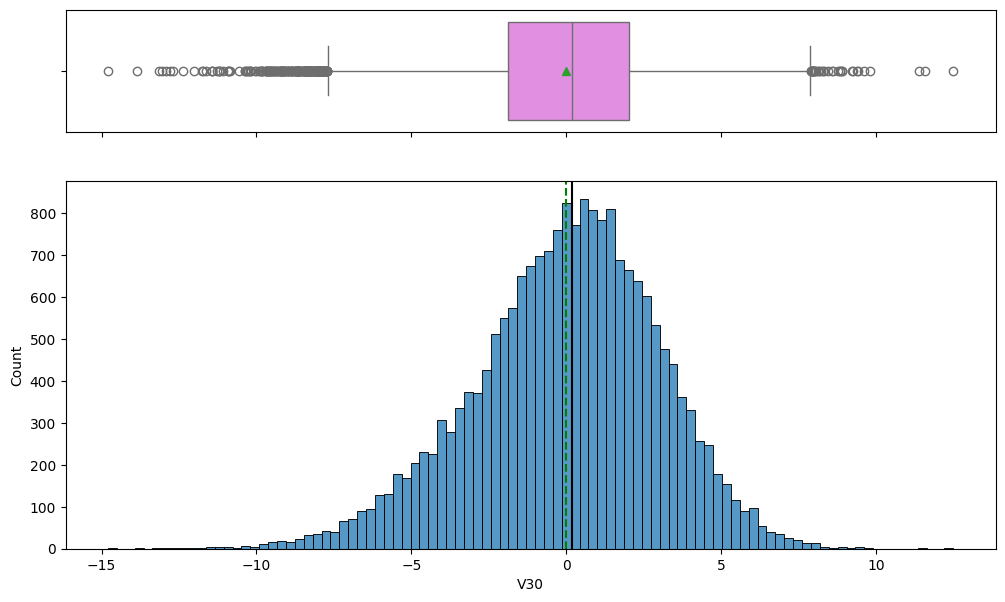

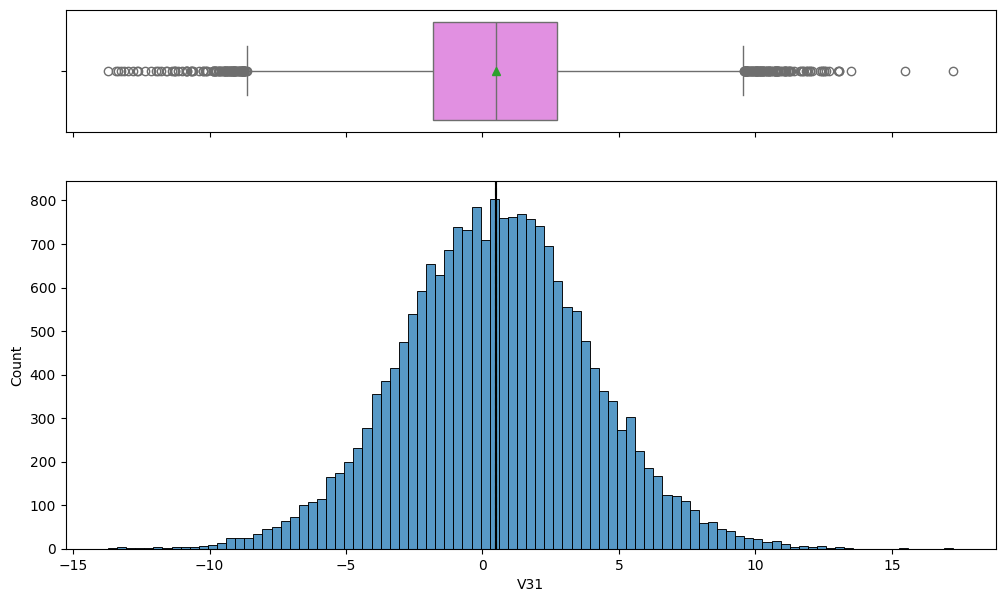

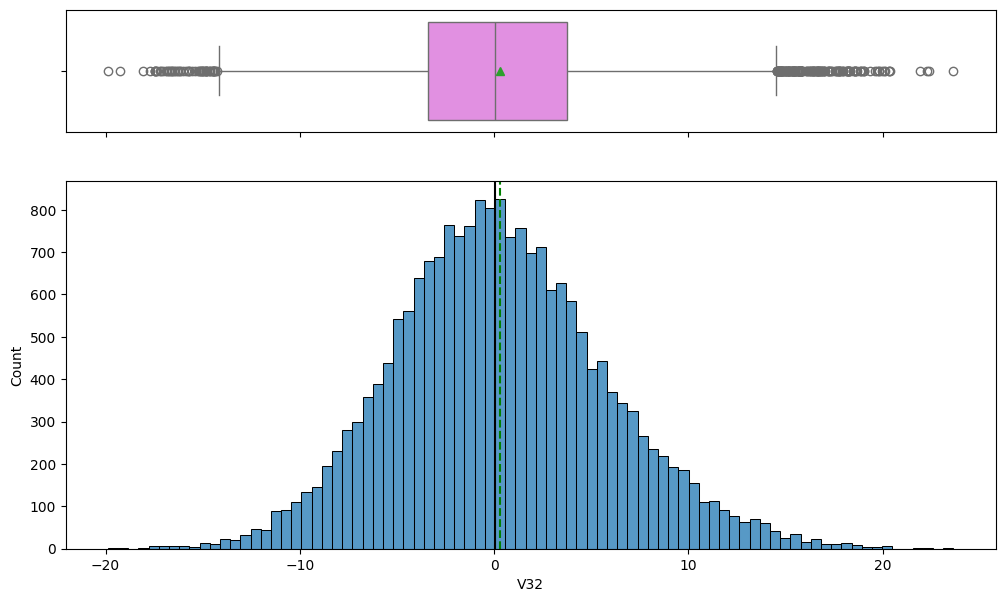

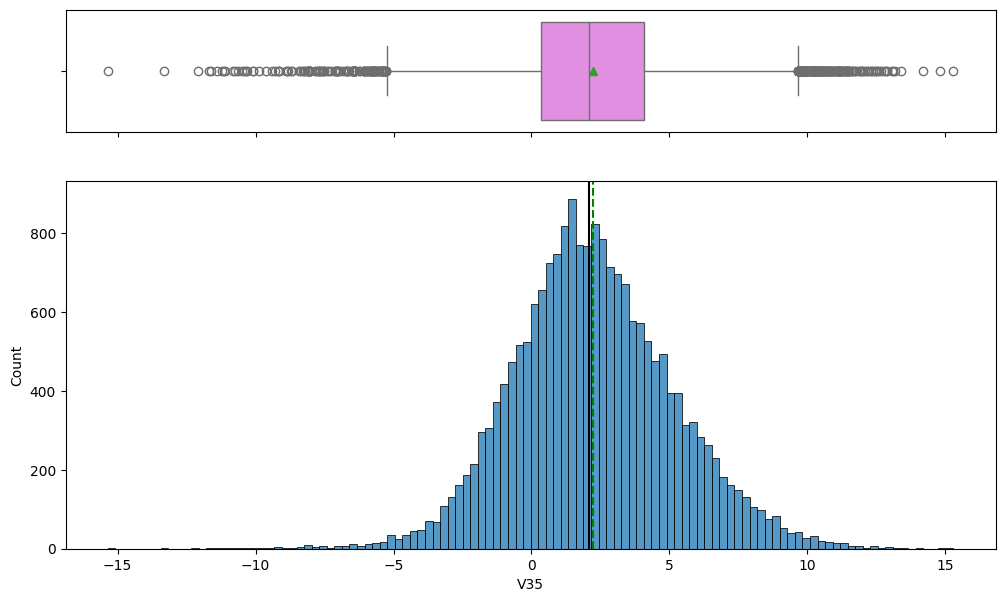

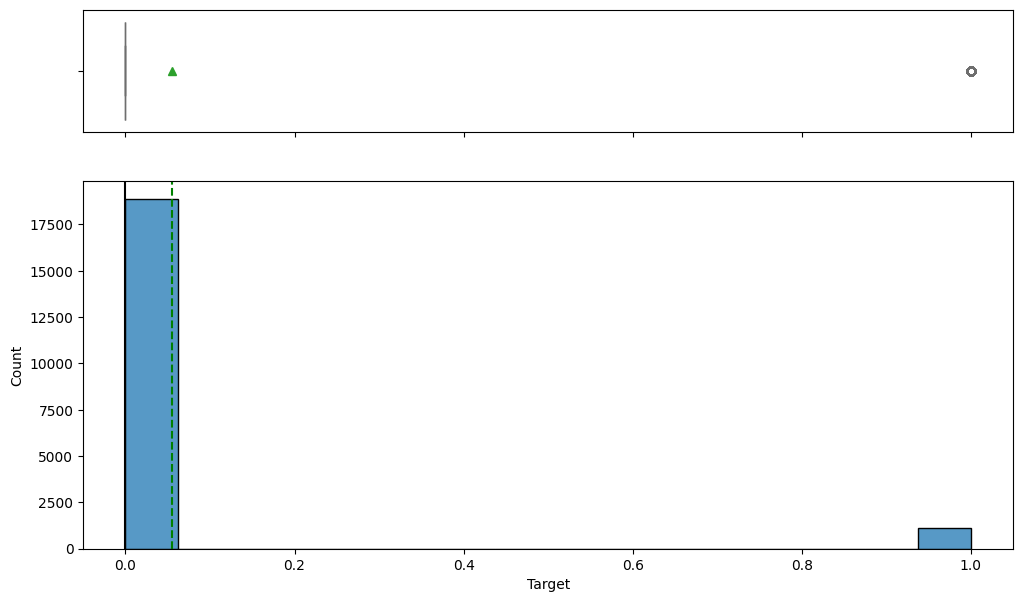

In [ ]:
for feature in df.columns:
    histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None)

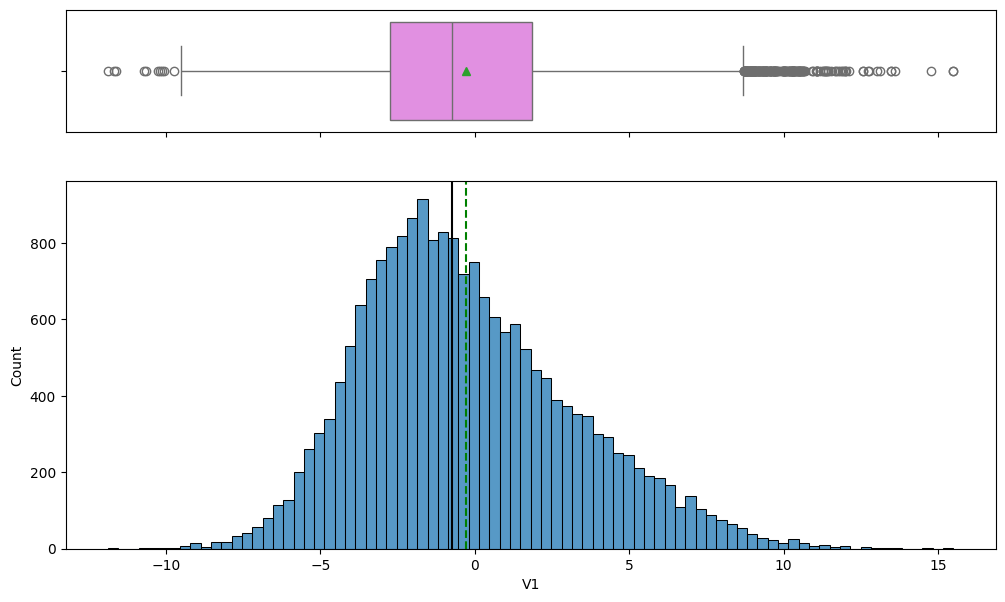

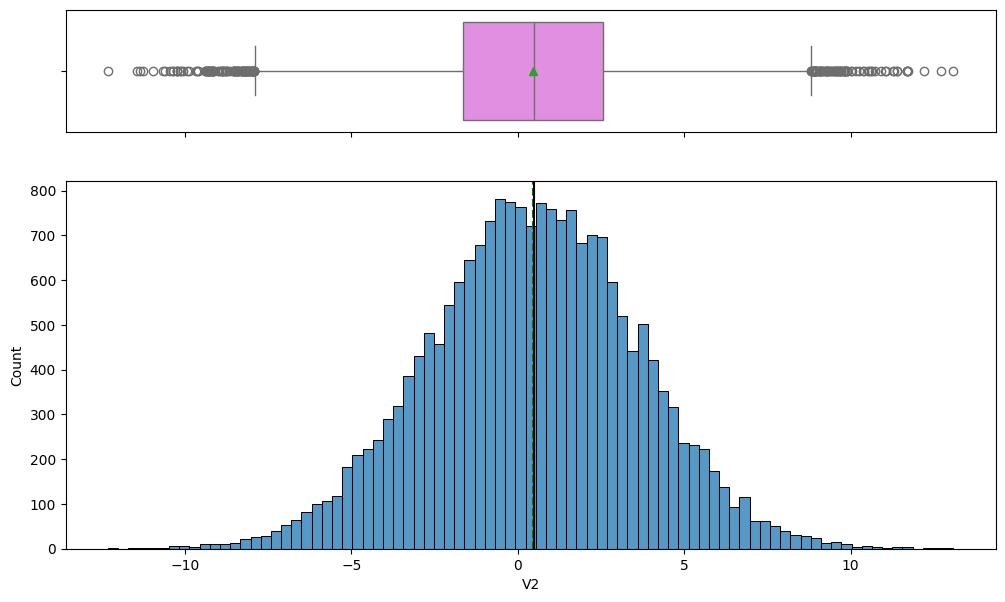

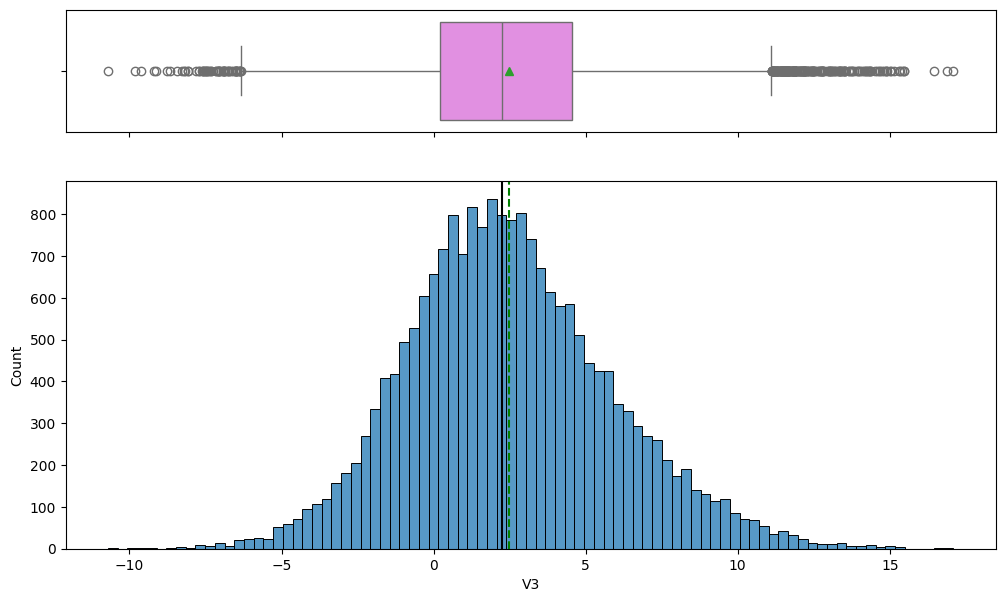

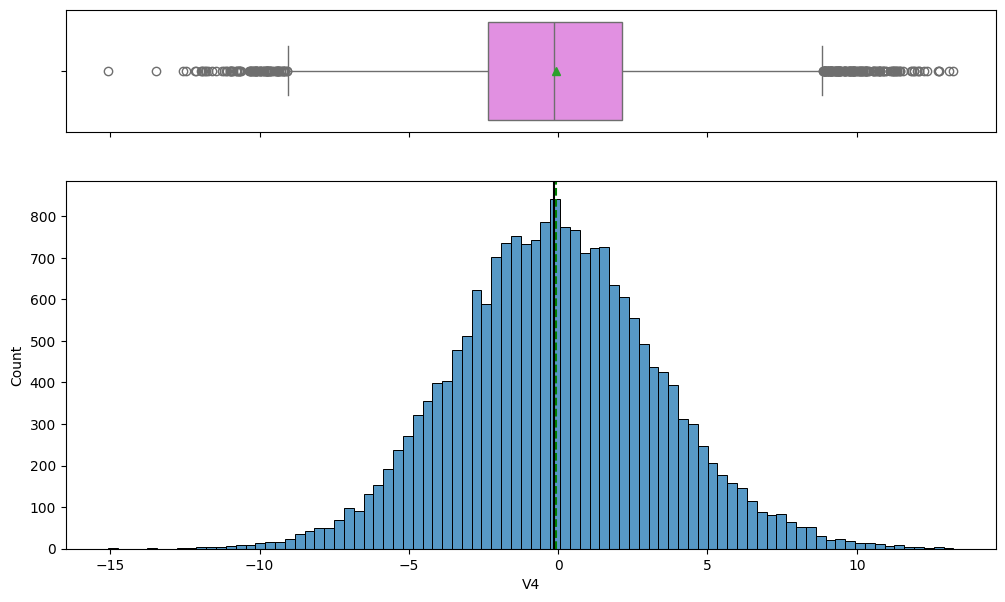

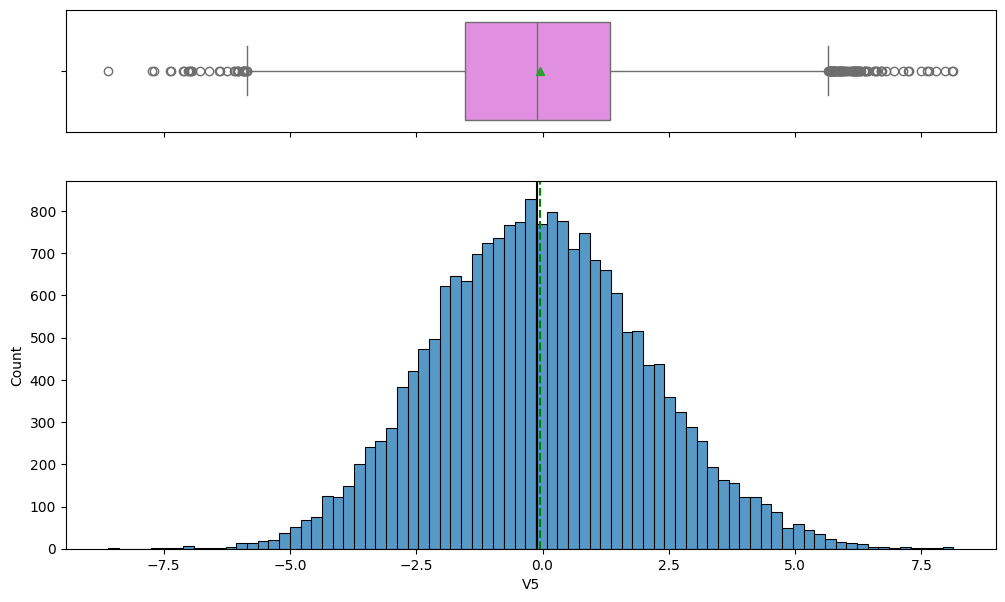

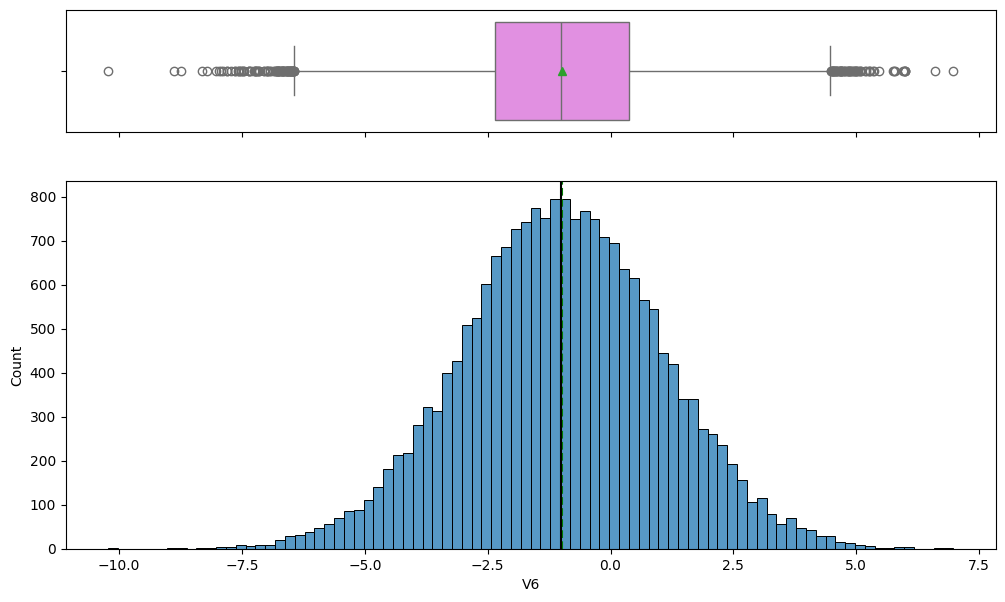

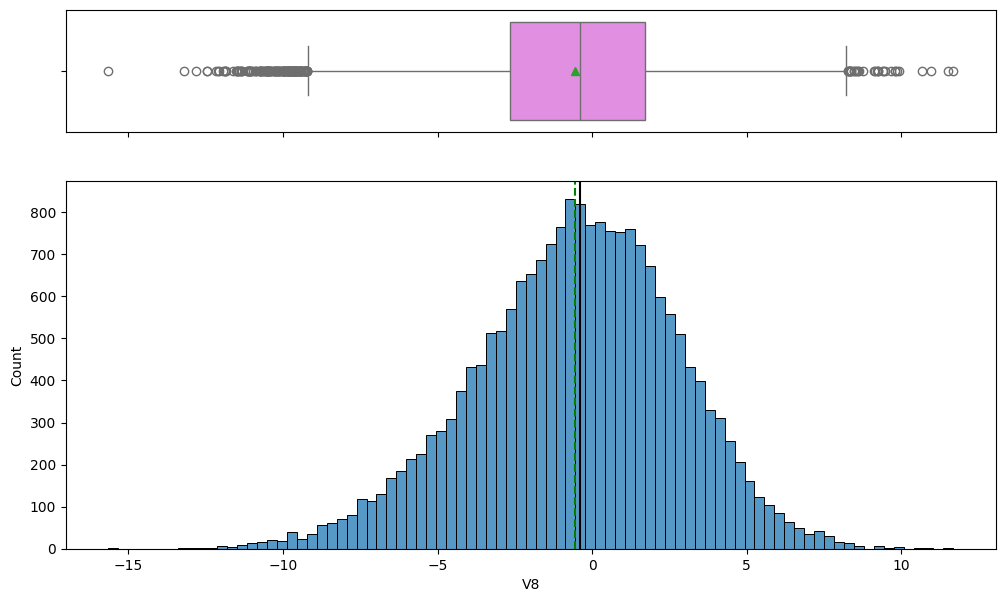

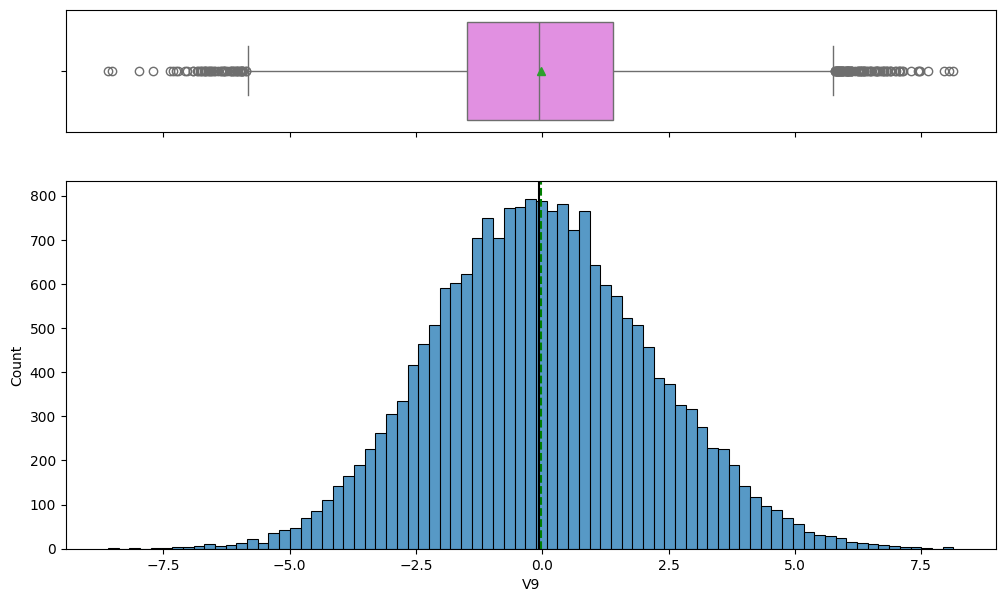

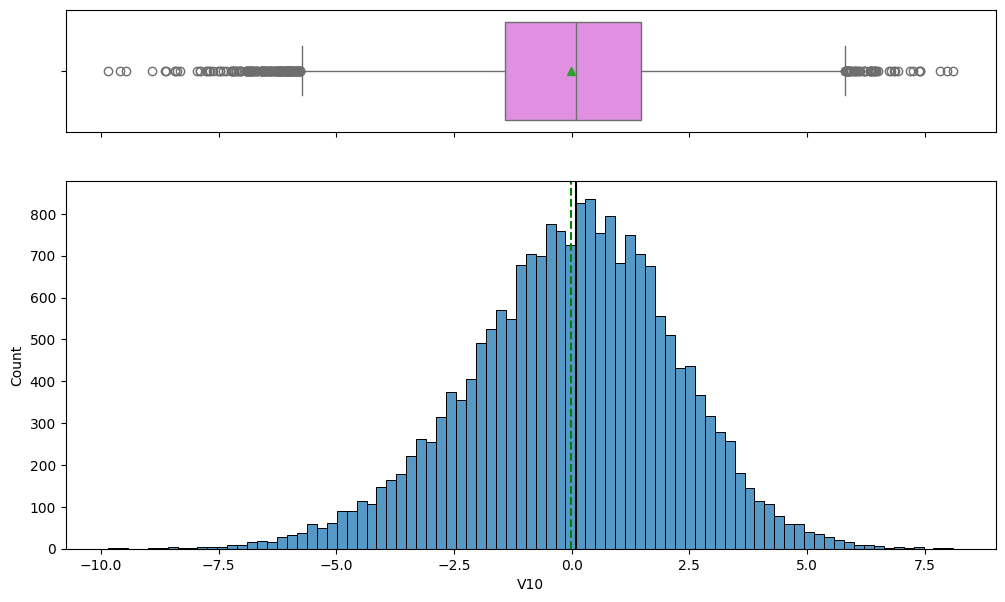

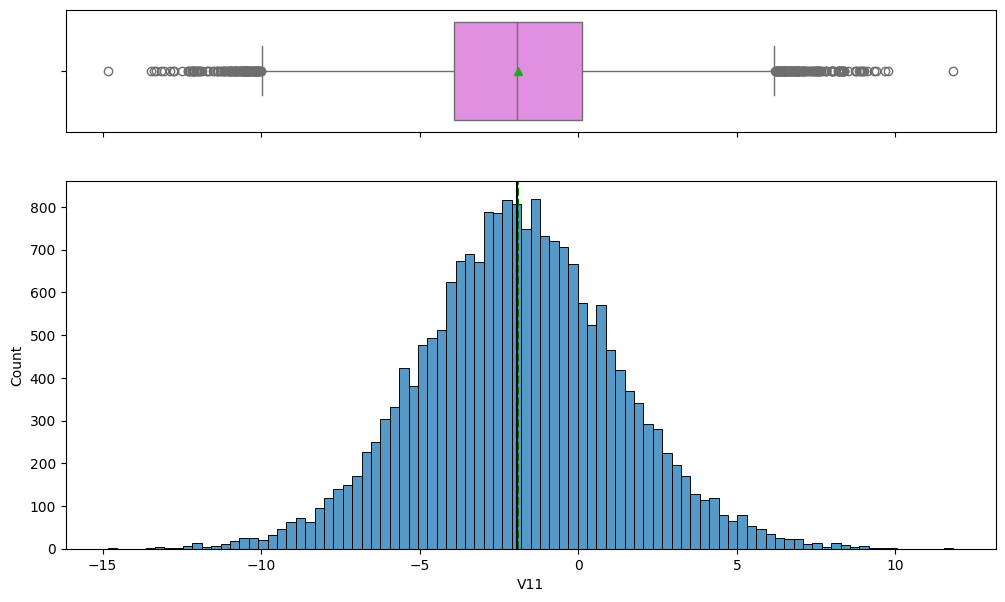

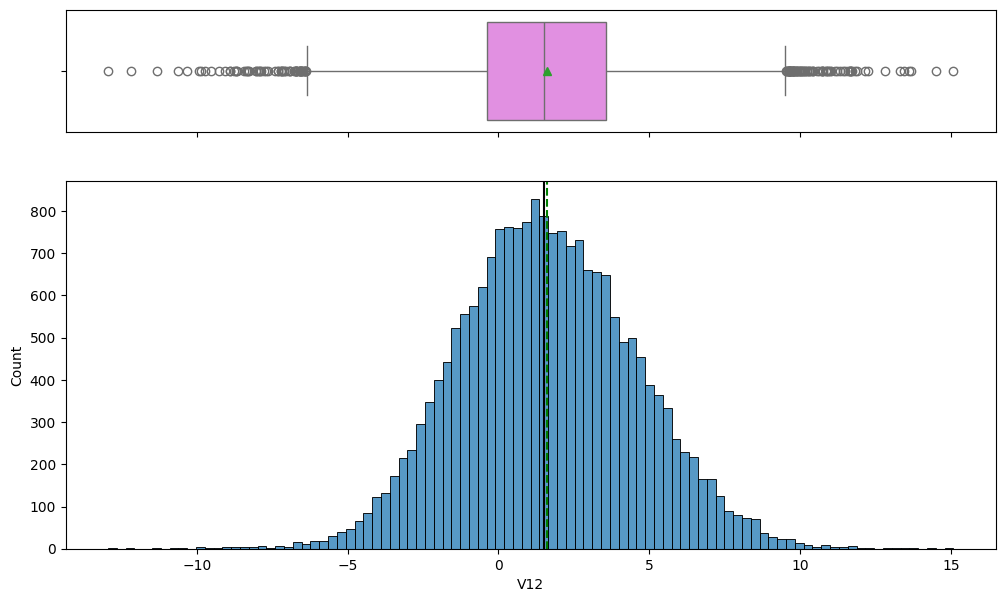

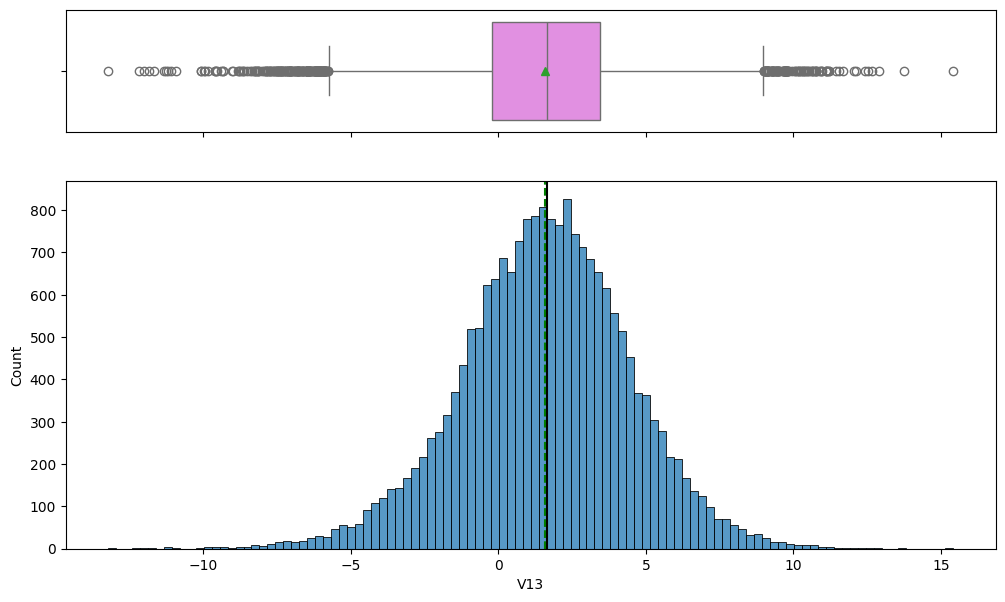

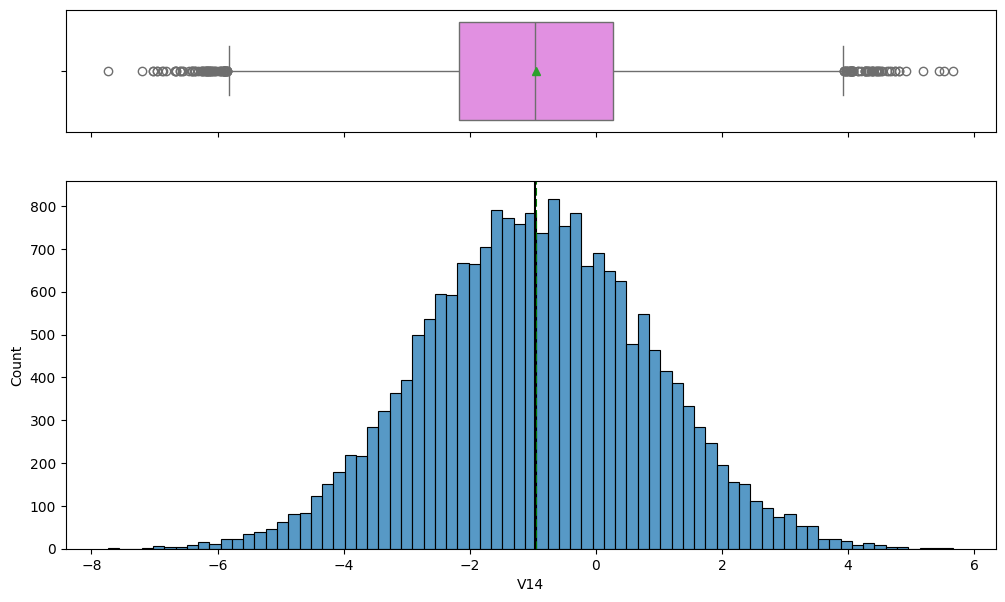

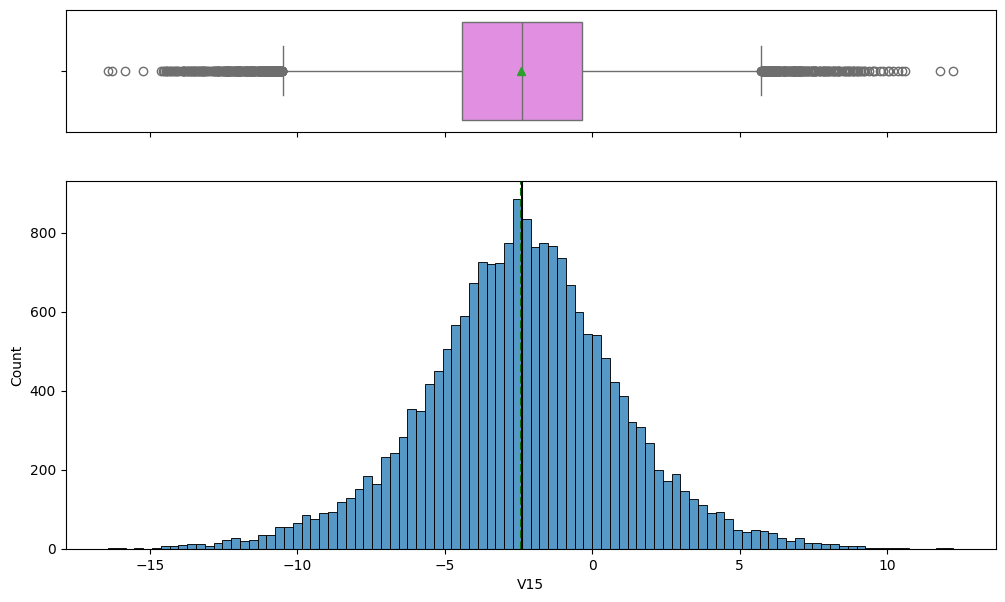

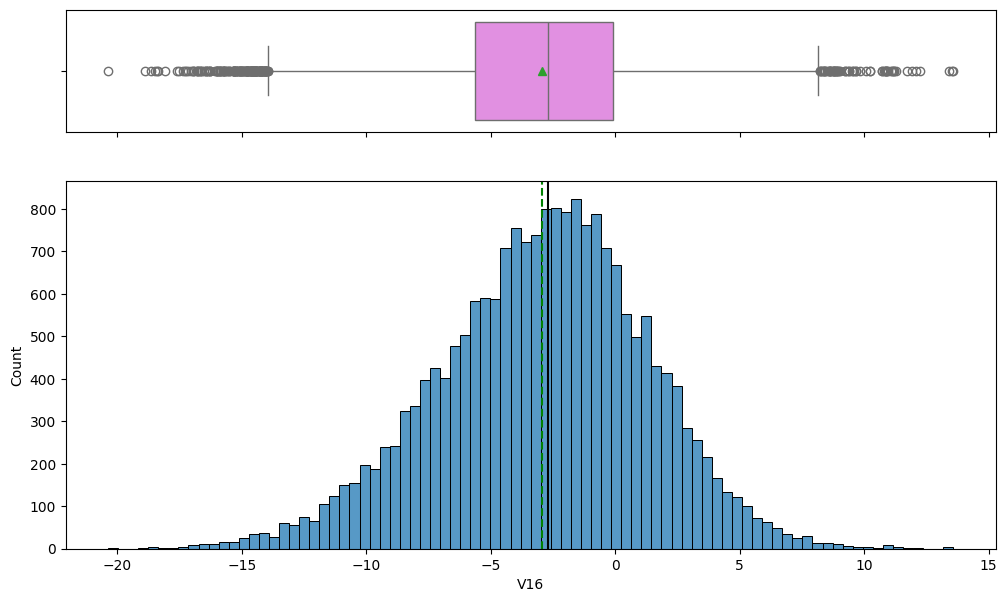

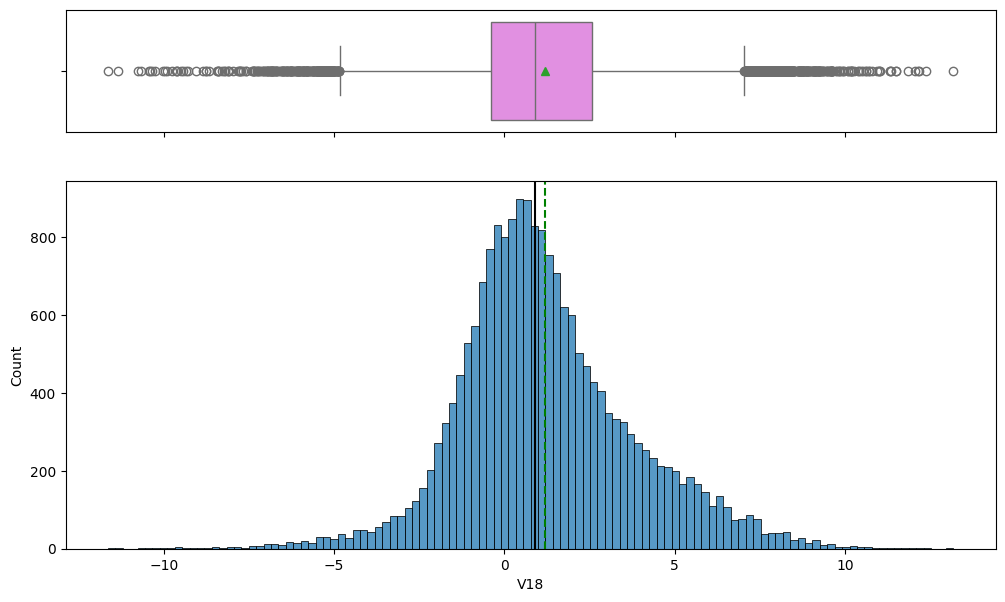

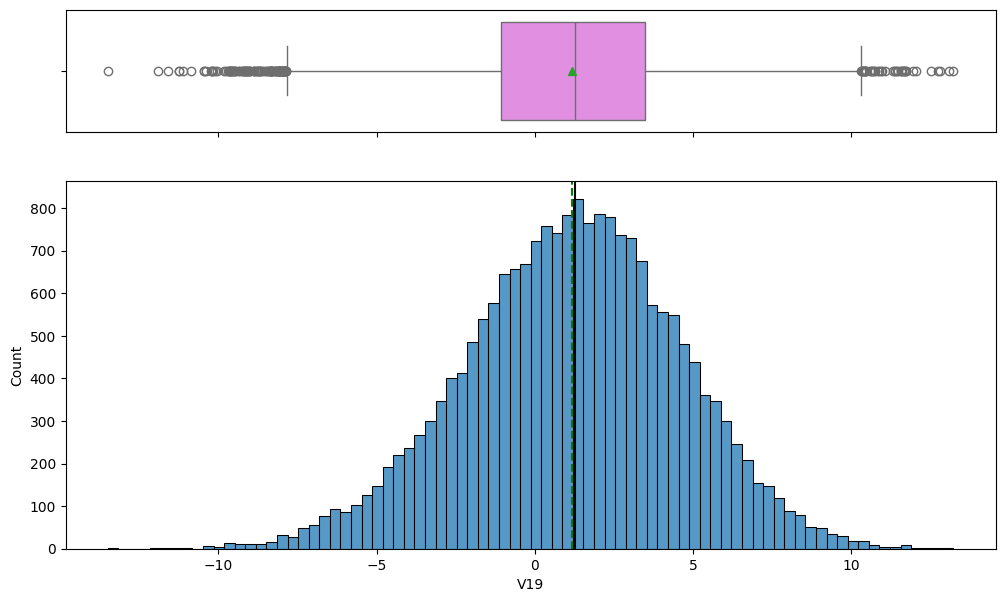

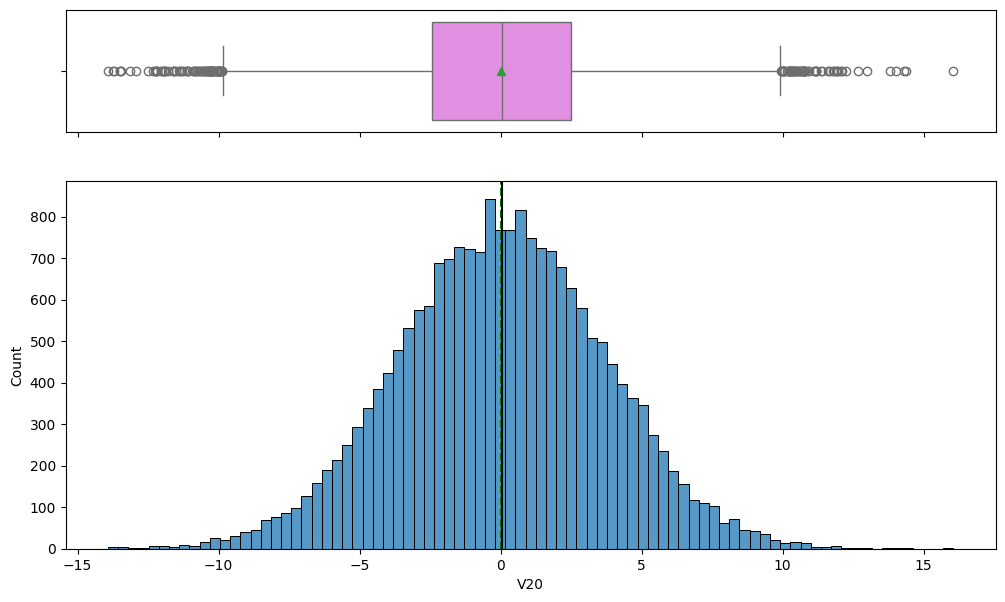

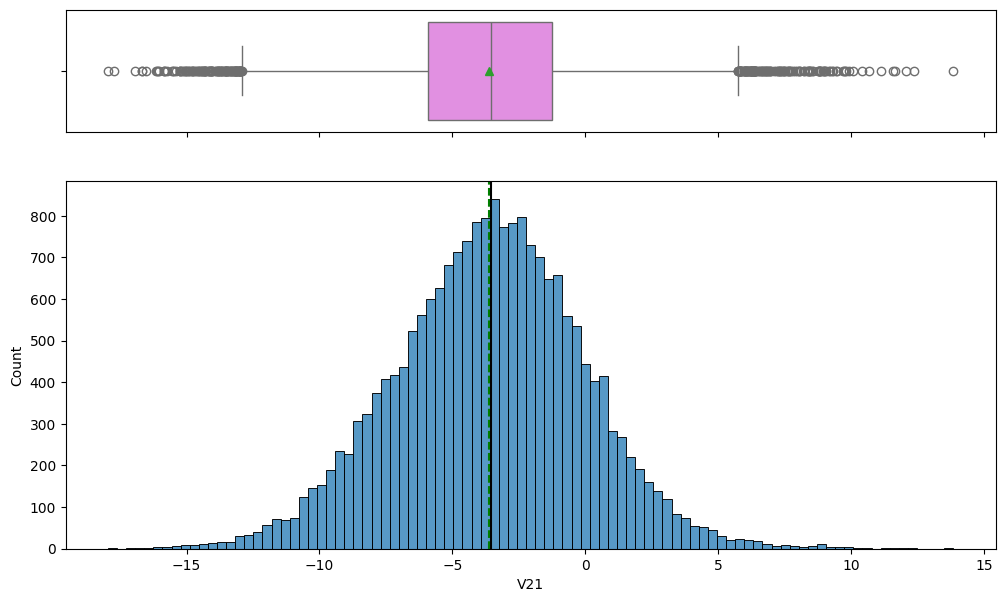

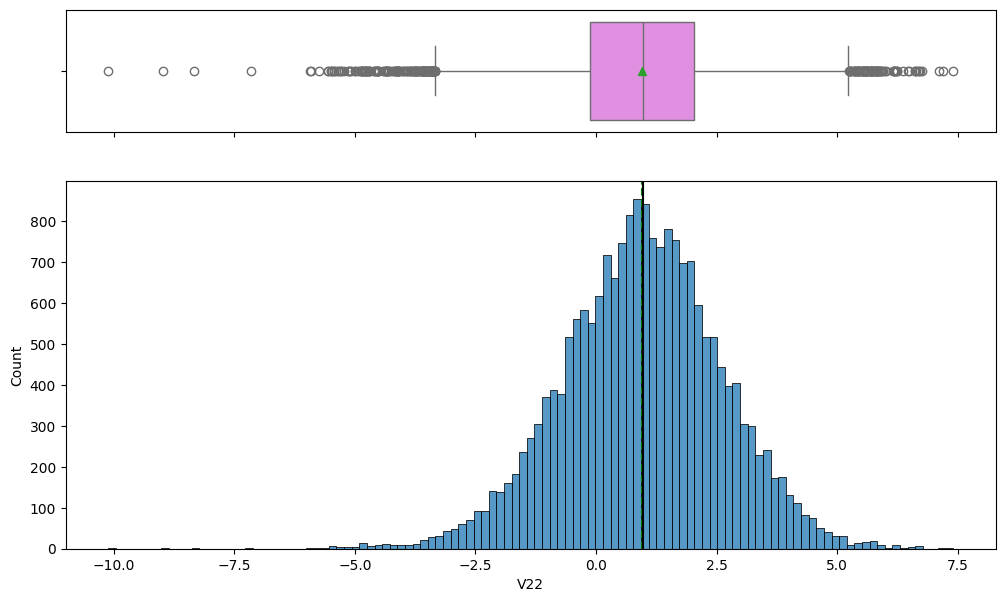

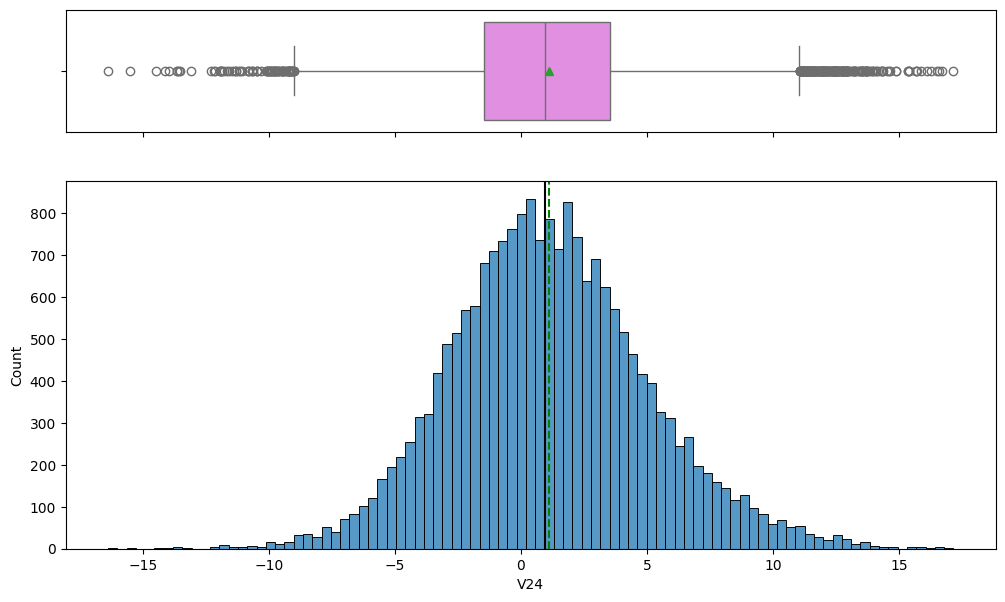

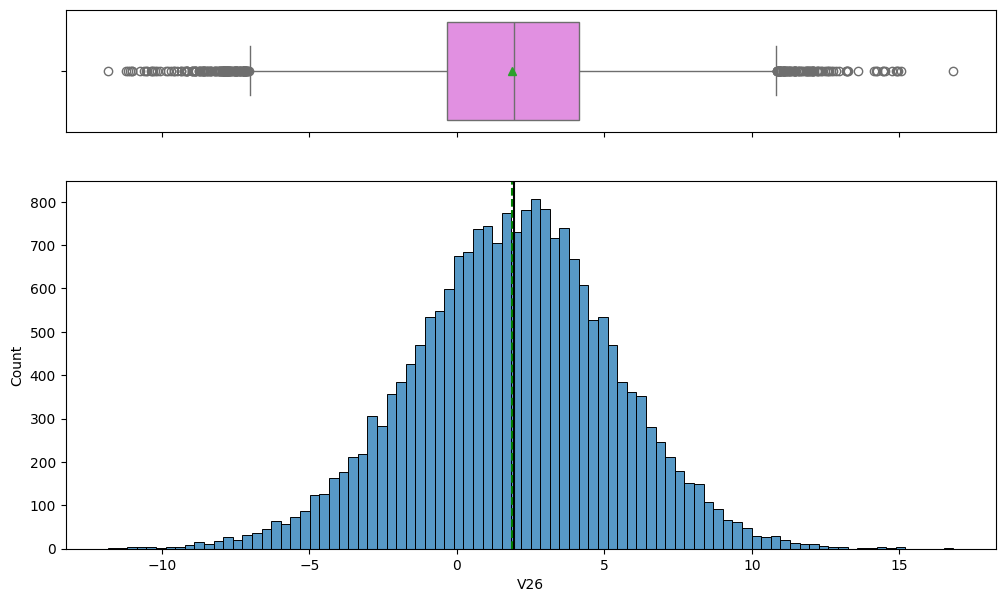

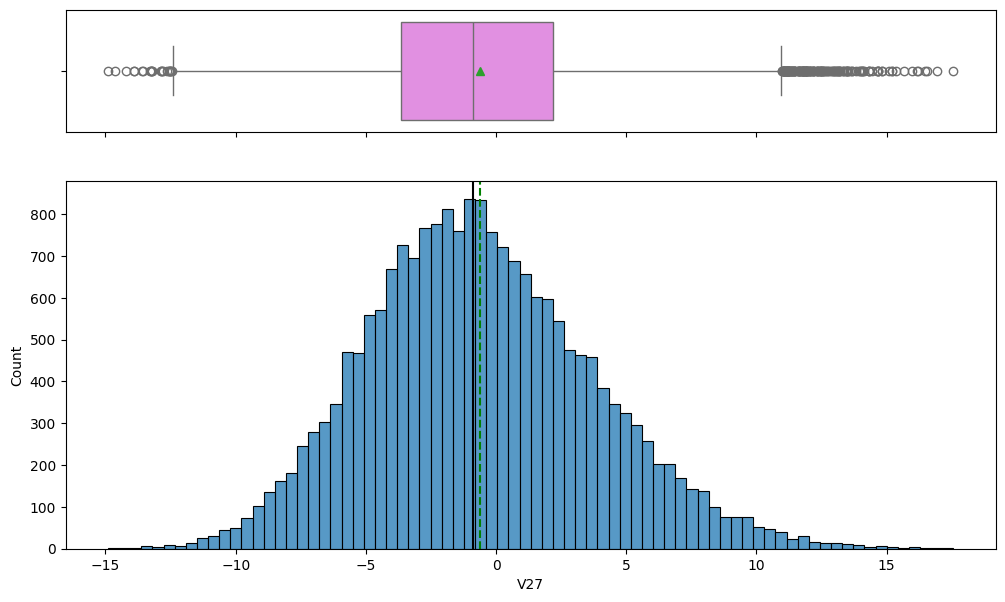

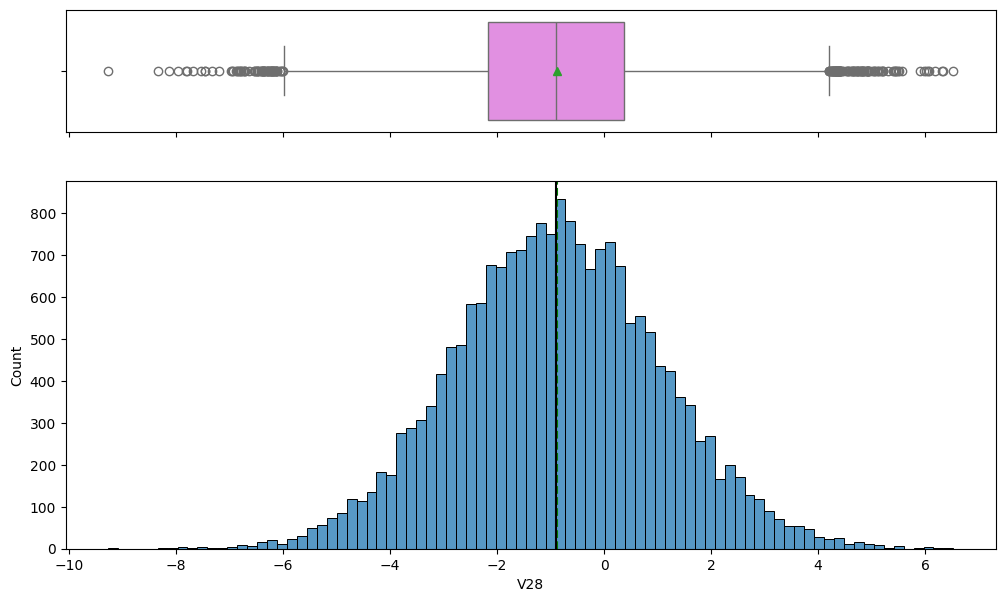

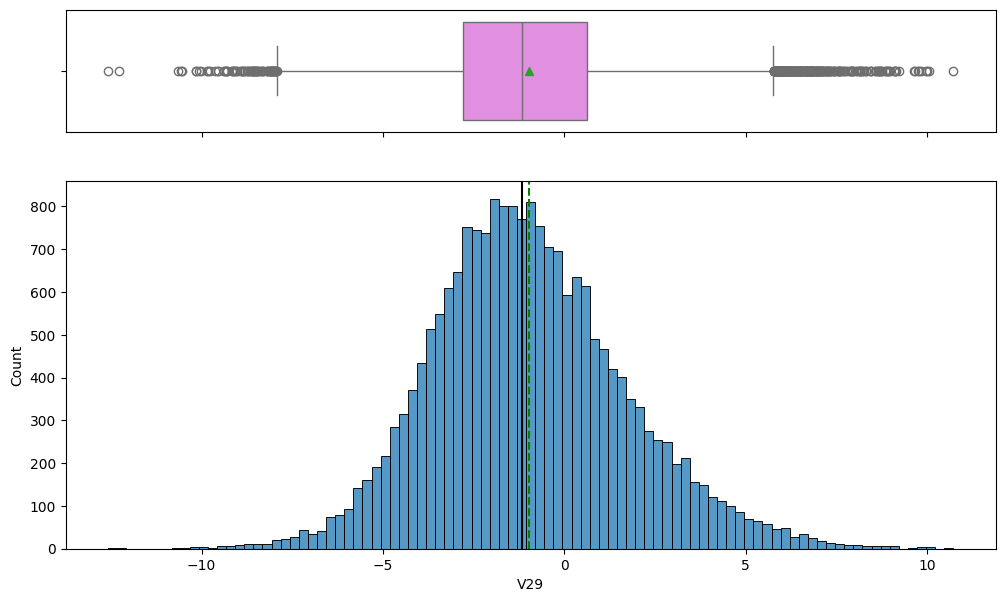

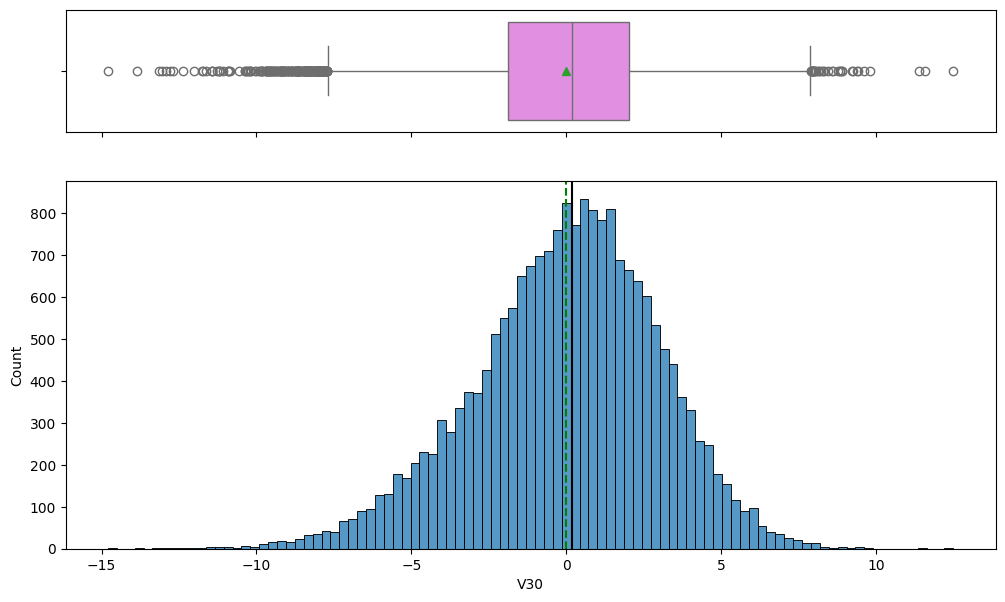

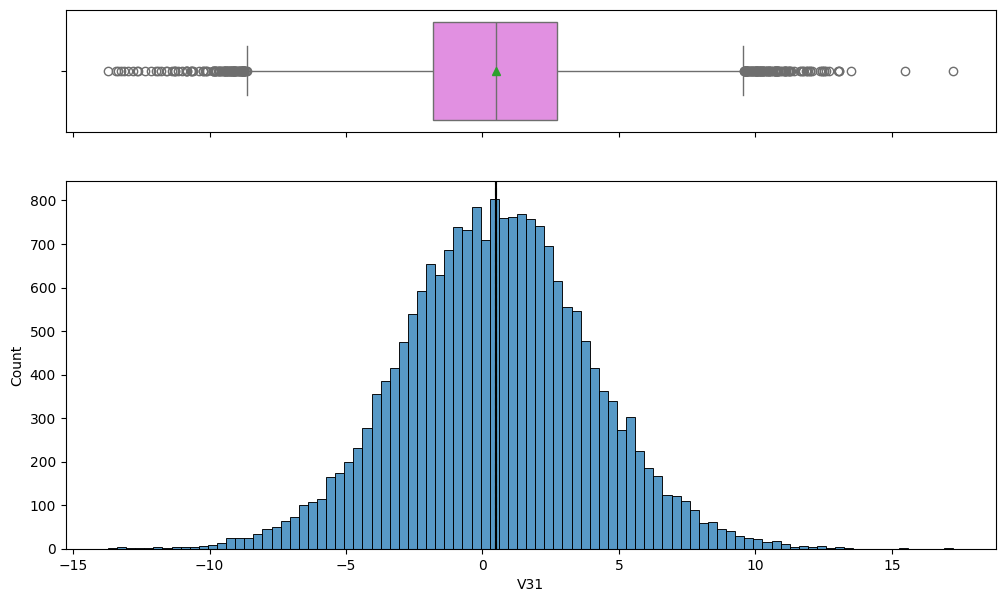

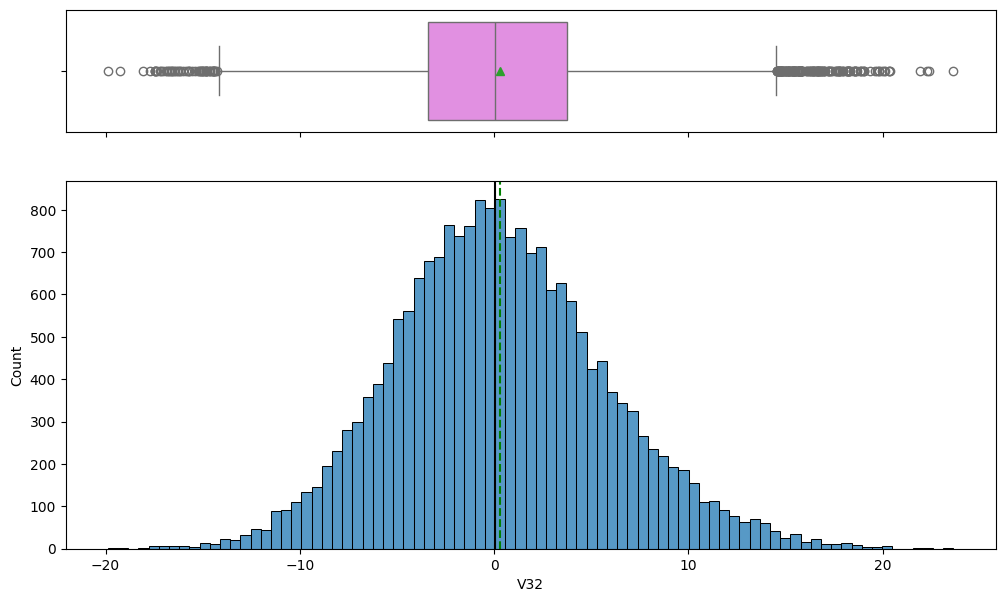

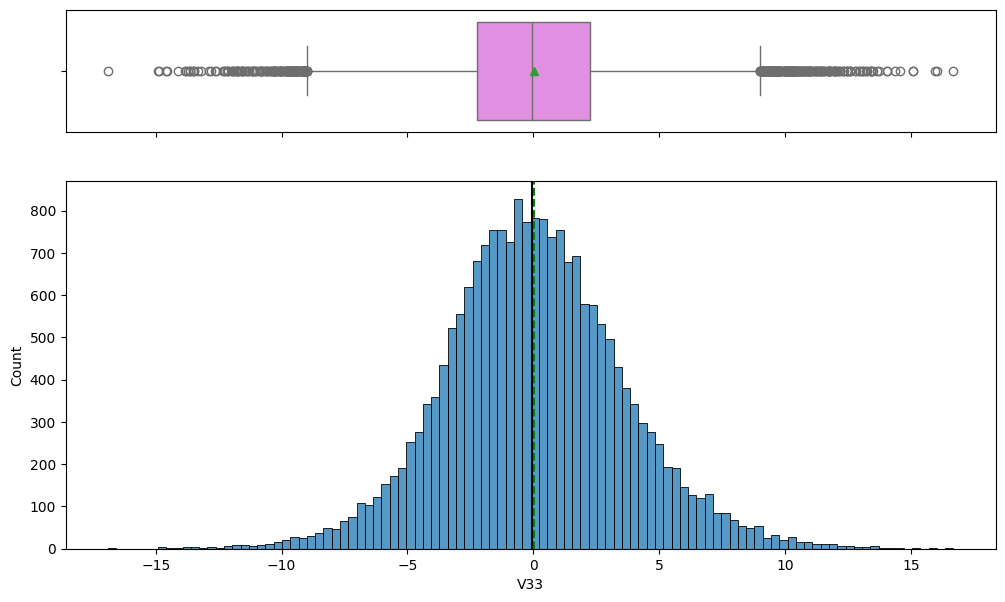

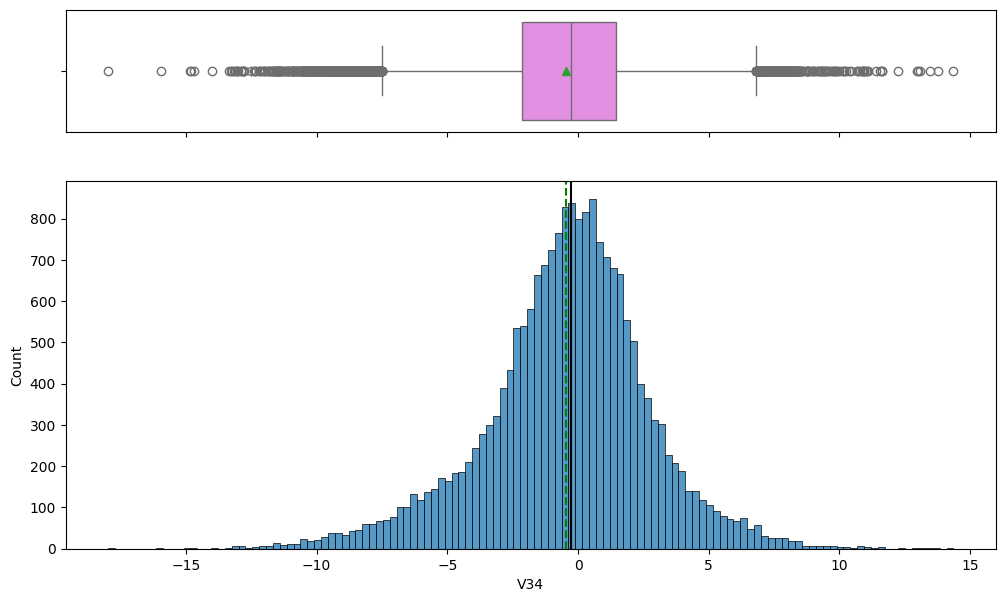

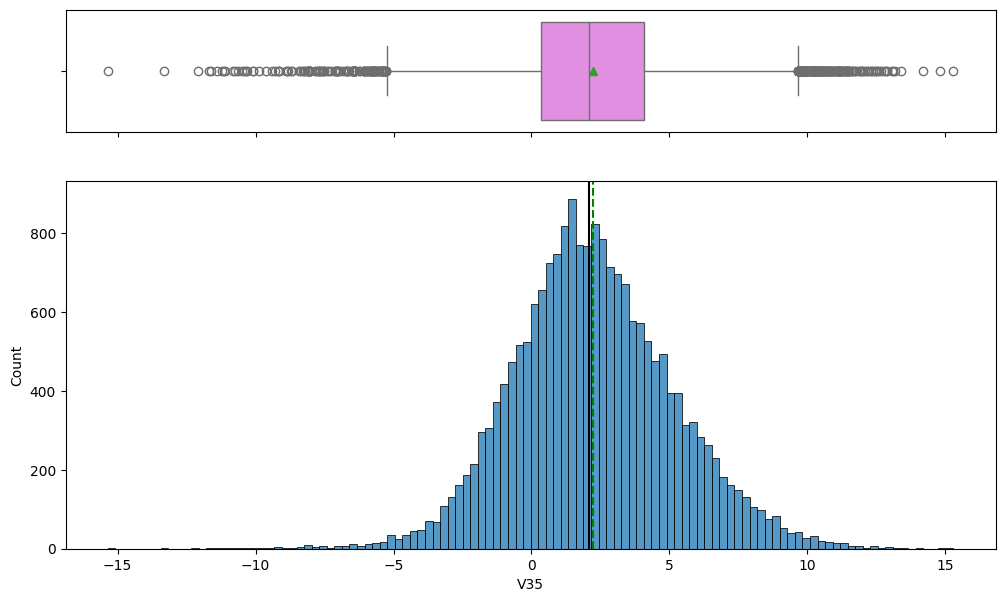

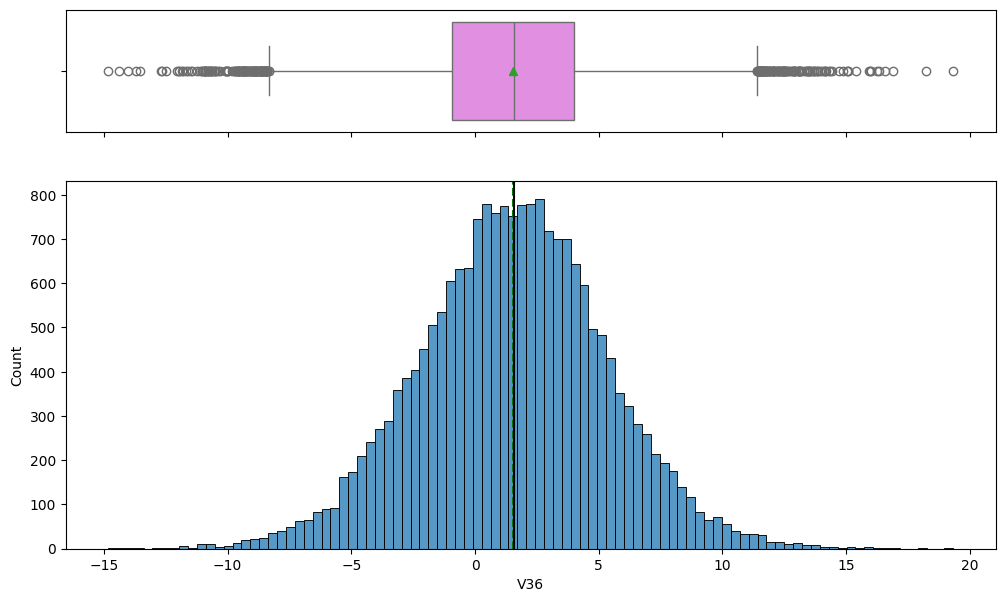

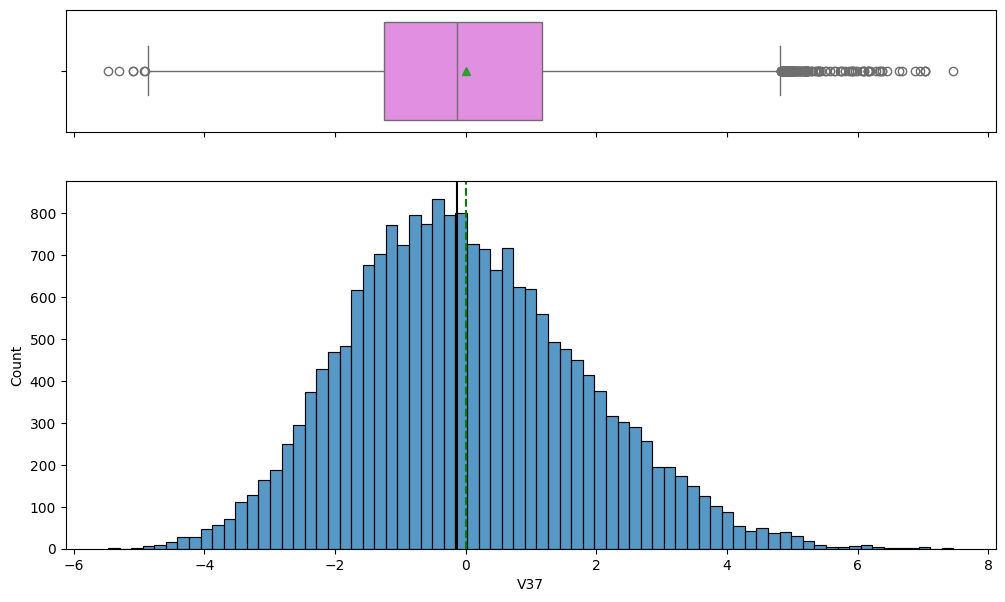

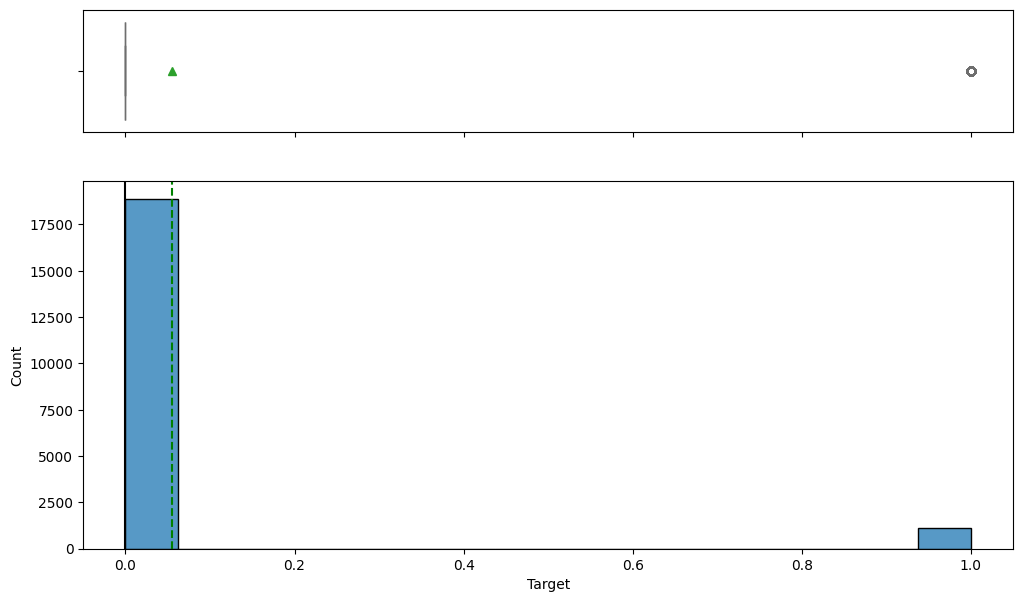

In [ ]:
for feature in df1.columns:
    histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None)

* Most of the independent variables in the train and test set are almost normaly distributed, but a few of them slightly skewed to the right or left.

* The Target variable which is either failure('1') or No-failure( 0') in both train and test dataset has more of No-failure than failure. Its distribution is densely populated at 'No-failure'.

*  Variables in train and test data have outliers to the both sides of their distribution plot.

* There are outliers at both sides of the plot which may suggest positive and negative extreme values.


In [ ]:
# Univariate Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Target', data=df)
plt.title('Target Variable Distribution')
plt.show()



 * The train dataset has 94.45% of the independent variables which are Wind energy sources and parts that may not break down.


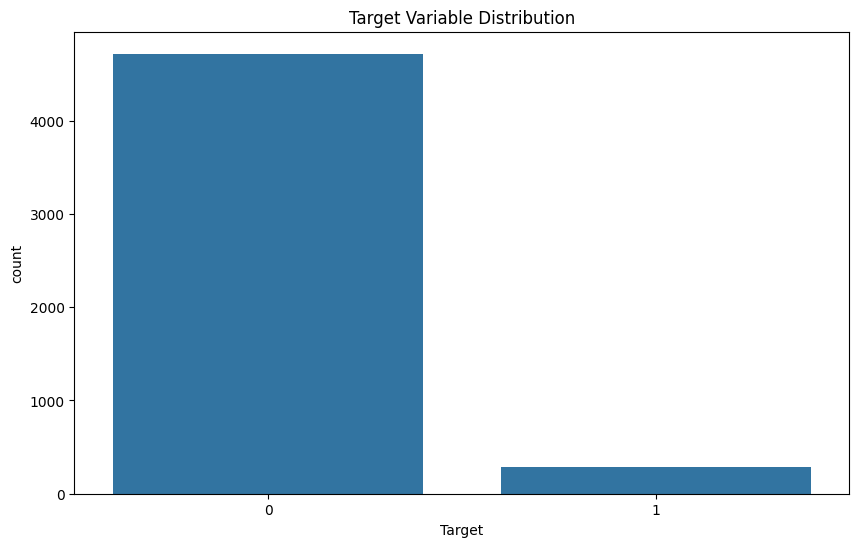

In [ ]:
# Univariate Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Target', data=df1)
plt.title('Target Variable Distribution')
plt.show()

* The test dataset has 99.9% of the independent variables which are Wind energy sources and parts that may not break down.

In [ ]:
## Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

# Check the values of Target variable

In [ ]:
# the values of target variable in the train set
df["Target"].value_counts()

Target
0    18890
1     1110
Name: count, dtype: int64

In [ ]:
# the values of target variable in the test set
df1["Target"].value_counts()

Target
0    4718
1     282
Name: count, dtype: int64

* Both the train dataset and test dataset have 94.45% and 99.9% of the independent variables respectively which are Wind energy sources and parts that may not break down.

# Bivariate Analysis

**Correlation check among numerical variables**

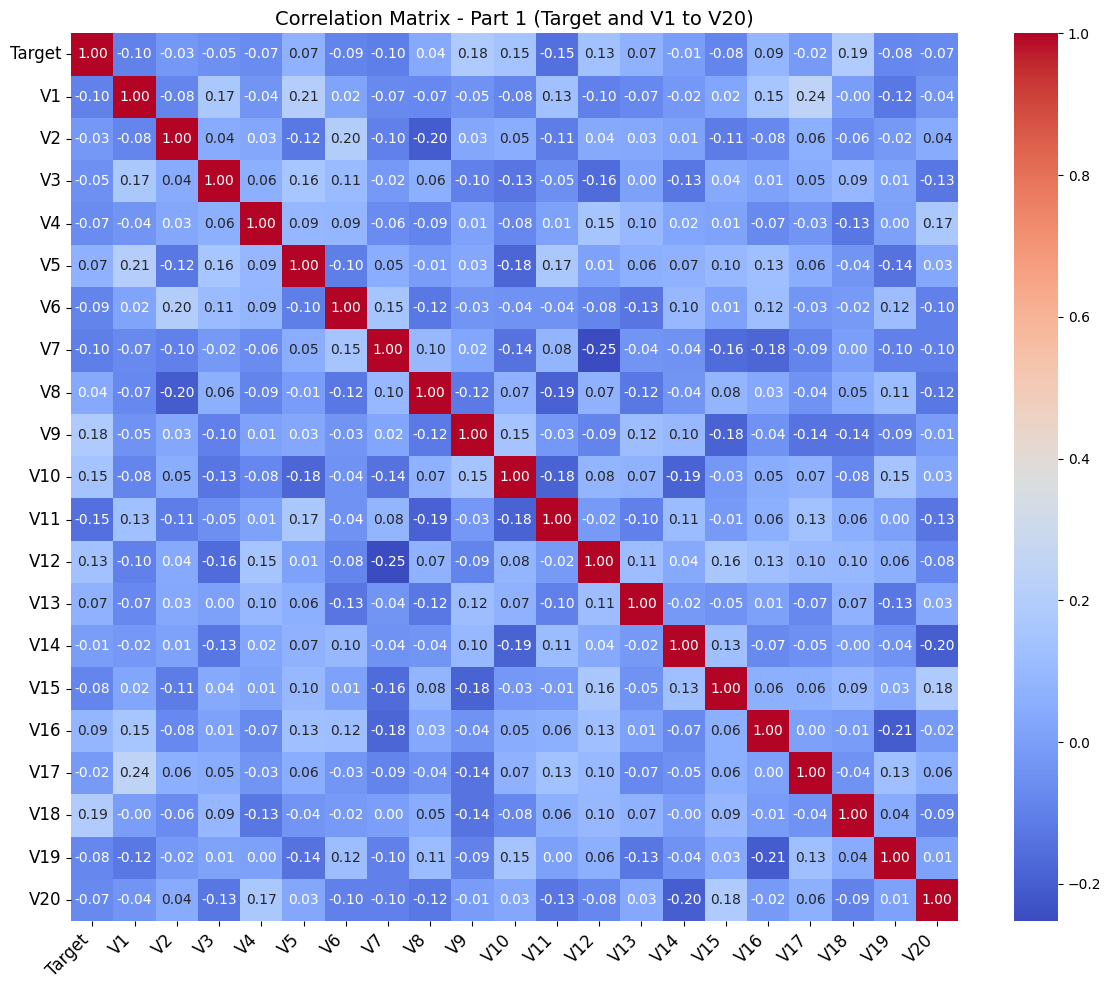

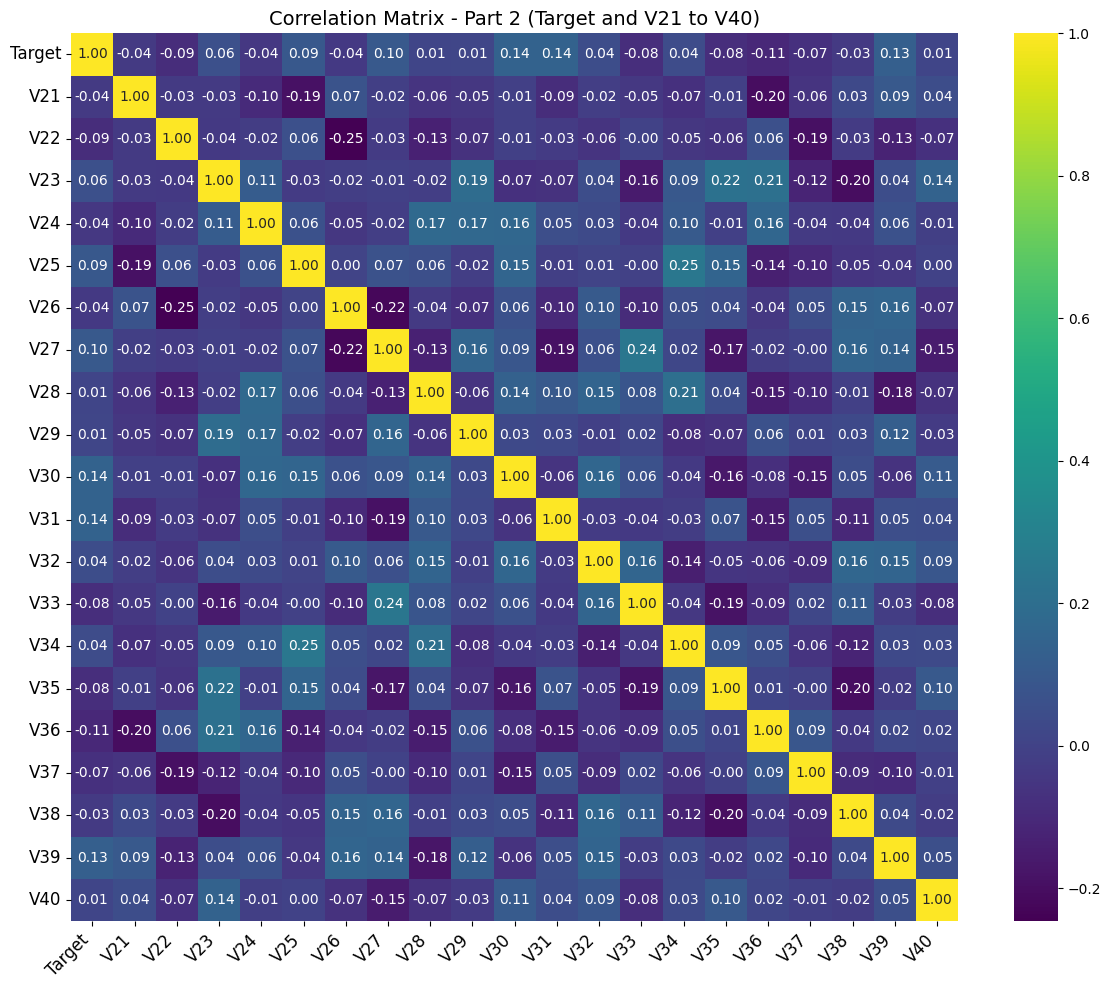

In [ ]:
# Generate a sample dataframe with 40 independent variables and 1 target variable
np.random.seed(42)
num_samples = 100  # You can adjust the number of samples
data = pd.DataFrame(np.random.rand(num_samples, 40), columns=[f'V{i}' for i in range(1, 41)])
data['Target'] = np.random.rand(num_samples)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Specify the columns for the different parts
variables_part1 = ['Target'] + [f'V{i}' for i in range(1, 21)]
variables_part2 = ['Target'] + [f'V{i}' for i in range(21, 41)]
variables_part3_x = [f'V{i}' for i in range(1, 21)]
variables_part3_y = [f'V{i}' for i in range(21, 41)]

# Create correlation matrices for each part
correlation_matrix_part1 = correlation_matrix.loc[variables_part1, variables_part1]
correlation_matrix_part2 = correlation_matrix.loc[variables_part2, variables_part2]
correlation_matrix_part3 = correlation_matrix.loc[variables_part3_x, variables_part3_y]

# Define a helper function to plot heatmaps
def plot_heatmap(matrix, title, cmap, filename):
    plt.figure(figsize=(12, 10))
    sns.heatmap(matrix, annot=True, cmap=cmap, fmt=".2f", annot_kws={"size": 10})
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(rotation=0, fontsize=12)
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

# Plot each part separately with readable colors and increased font size
plot_heatmap(correlation_matrix_part1, 'Correlation Matrix - Part 1 (Target and V1 to V20)', 'coolwarm', 'part1_heatmap.png')
plot_heatmap(correlation_matrix_part2, 'Correlation Matrix - Part 2 (Target and V21 to V40)', 'viridis', 'part2_heatmap.png')
plot_heatmap(correlation_matrix_part3, 'Correlation Matrix - Part 3 (V1 to V20 vs V21 to V40)', 'Spectral', 'part3_heatmap.png')





* 'V5', 'V8', 'V9', 'V10', 'V12', 'V16', 'V18', 'V22', 'V23', 'V25', 'V27', 'V33', and 'V39' show weak but positive relationship with the target variable.

*   We shall further analyze their relationship using distribution plot.

*   Though there are positive relationship among a few independent variables, their correlations are not strong.






## Further Analysis based on correlation check of independent variables that are positively correlated to dependent variable: 'Target'.

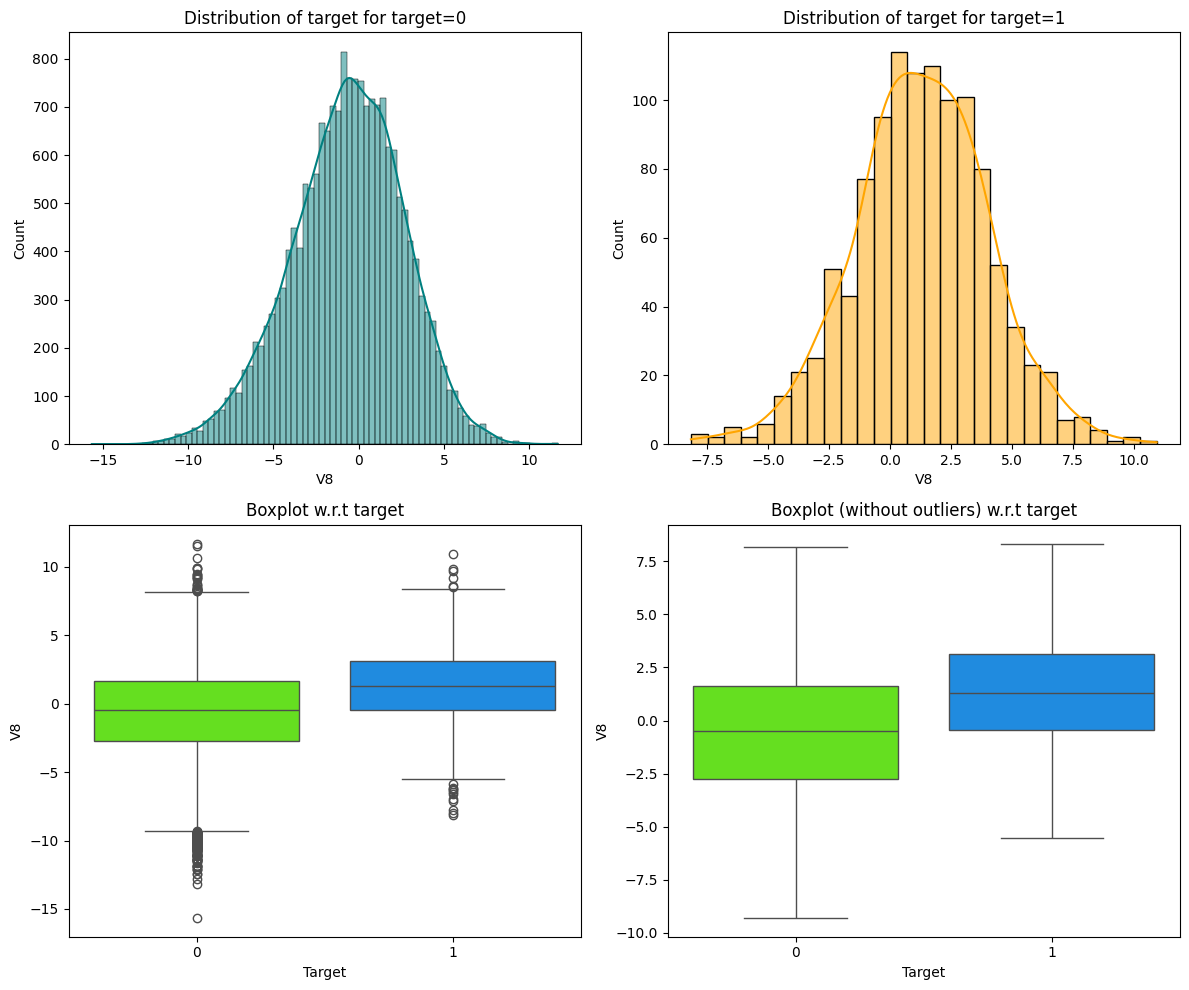

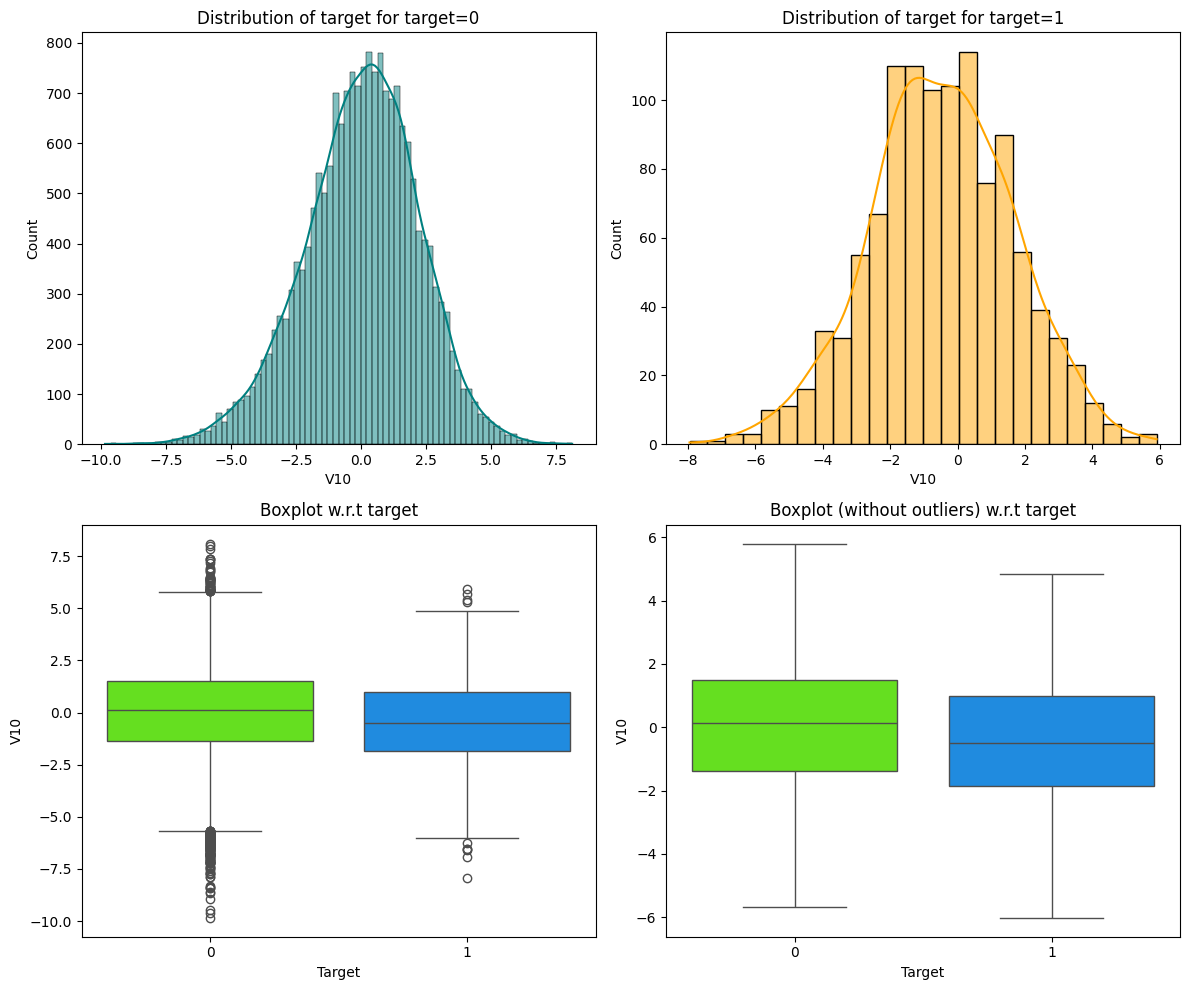

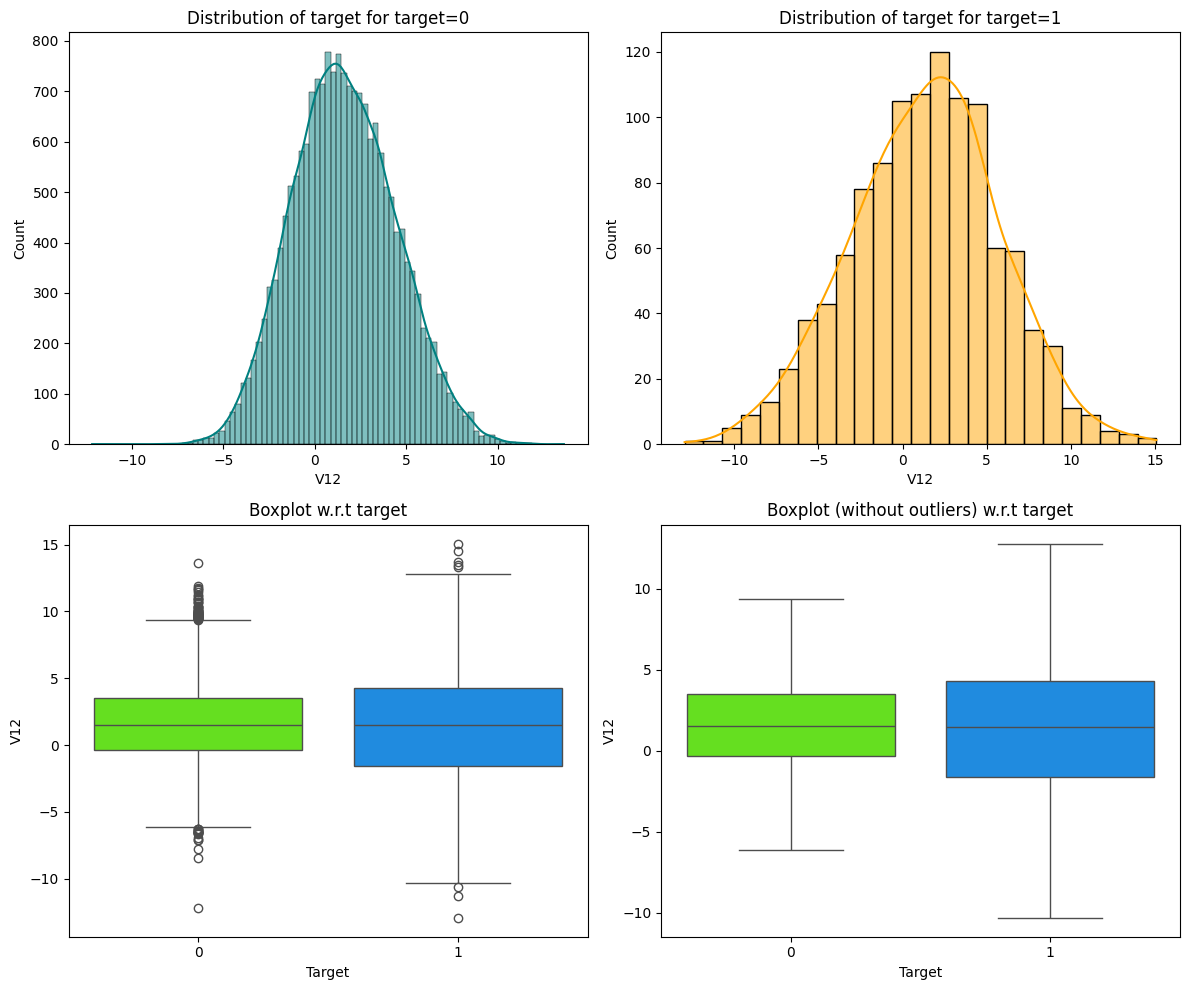

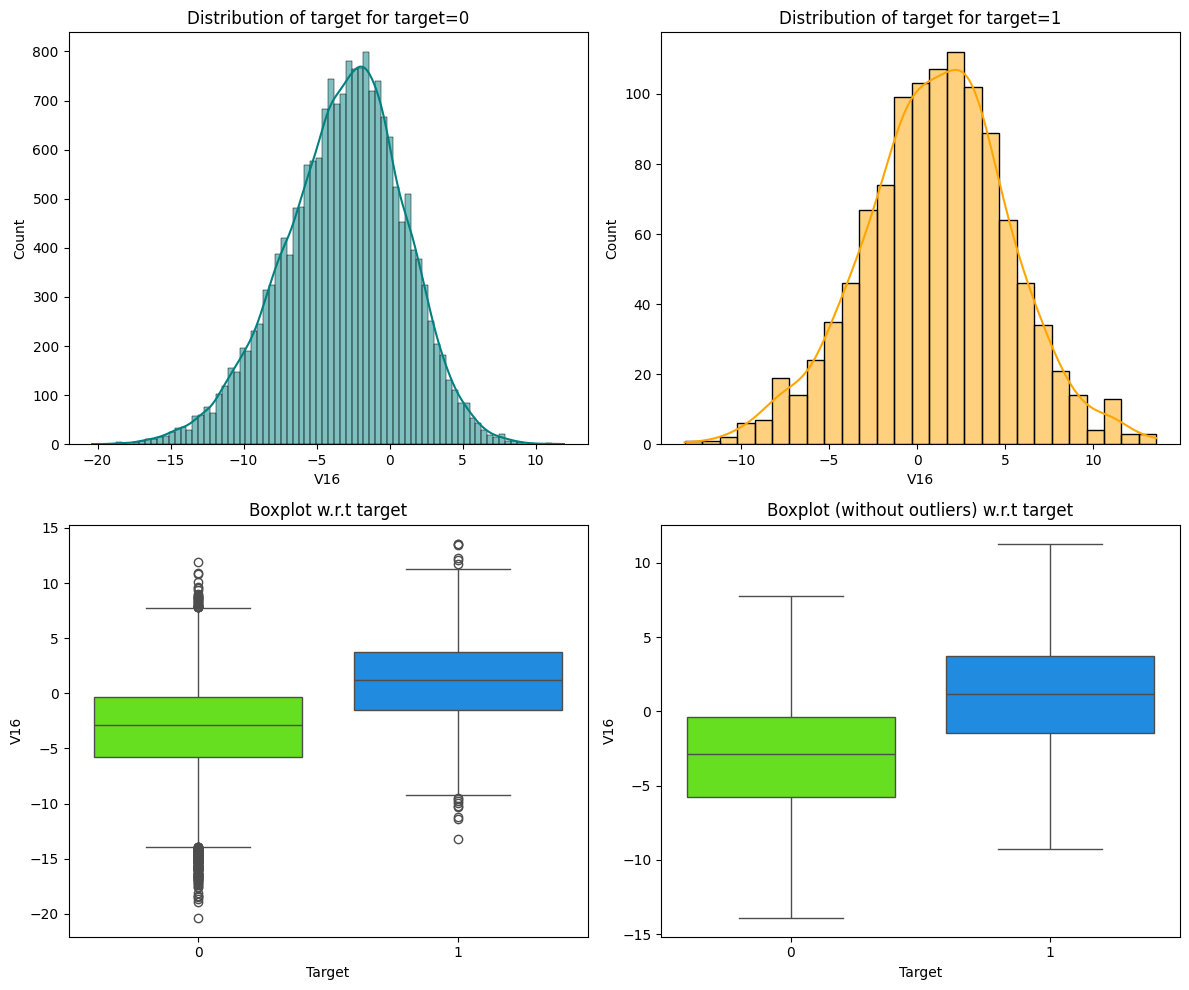

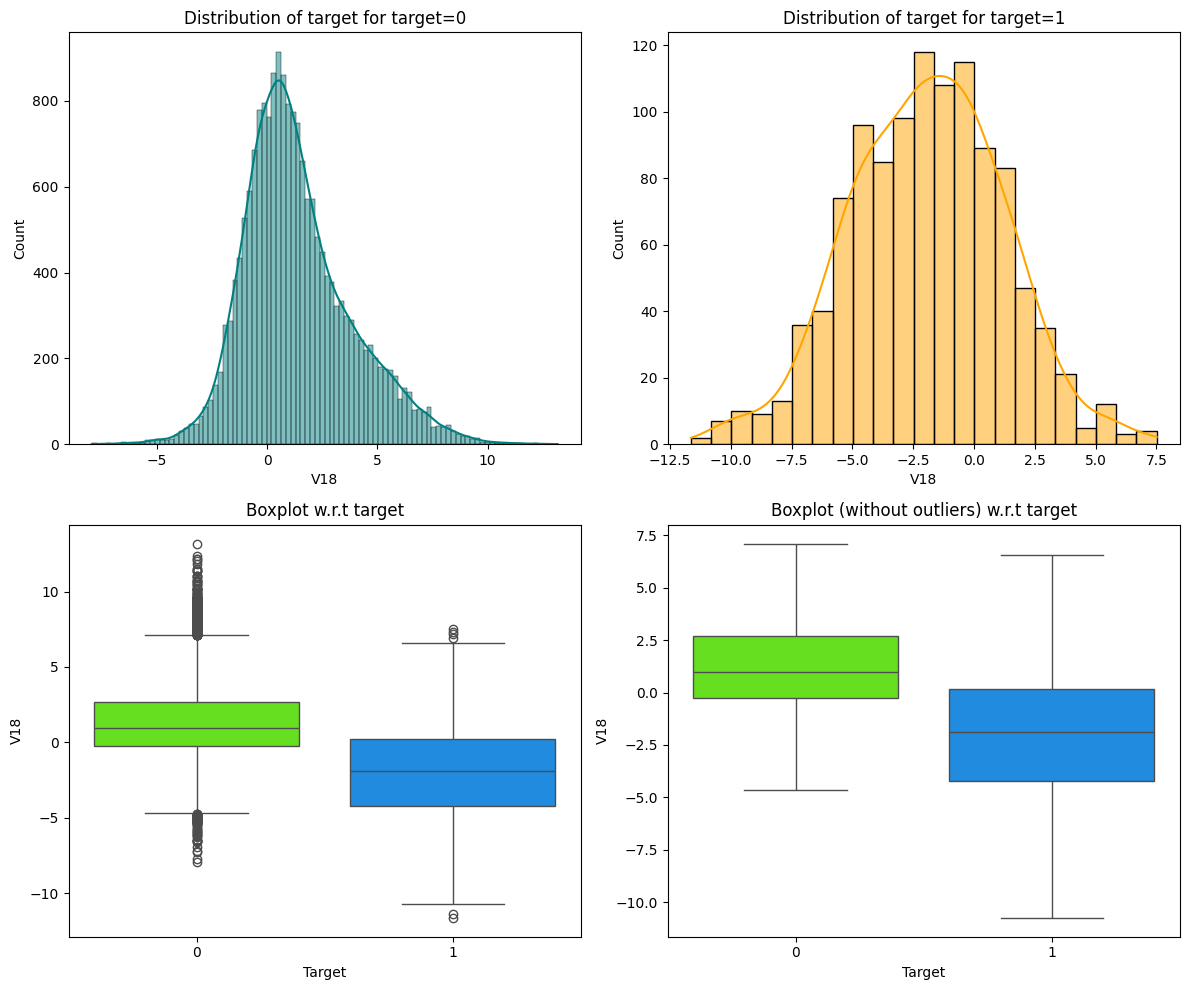

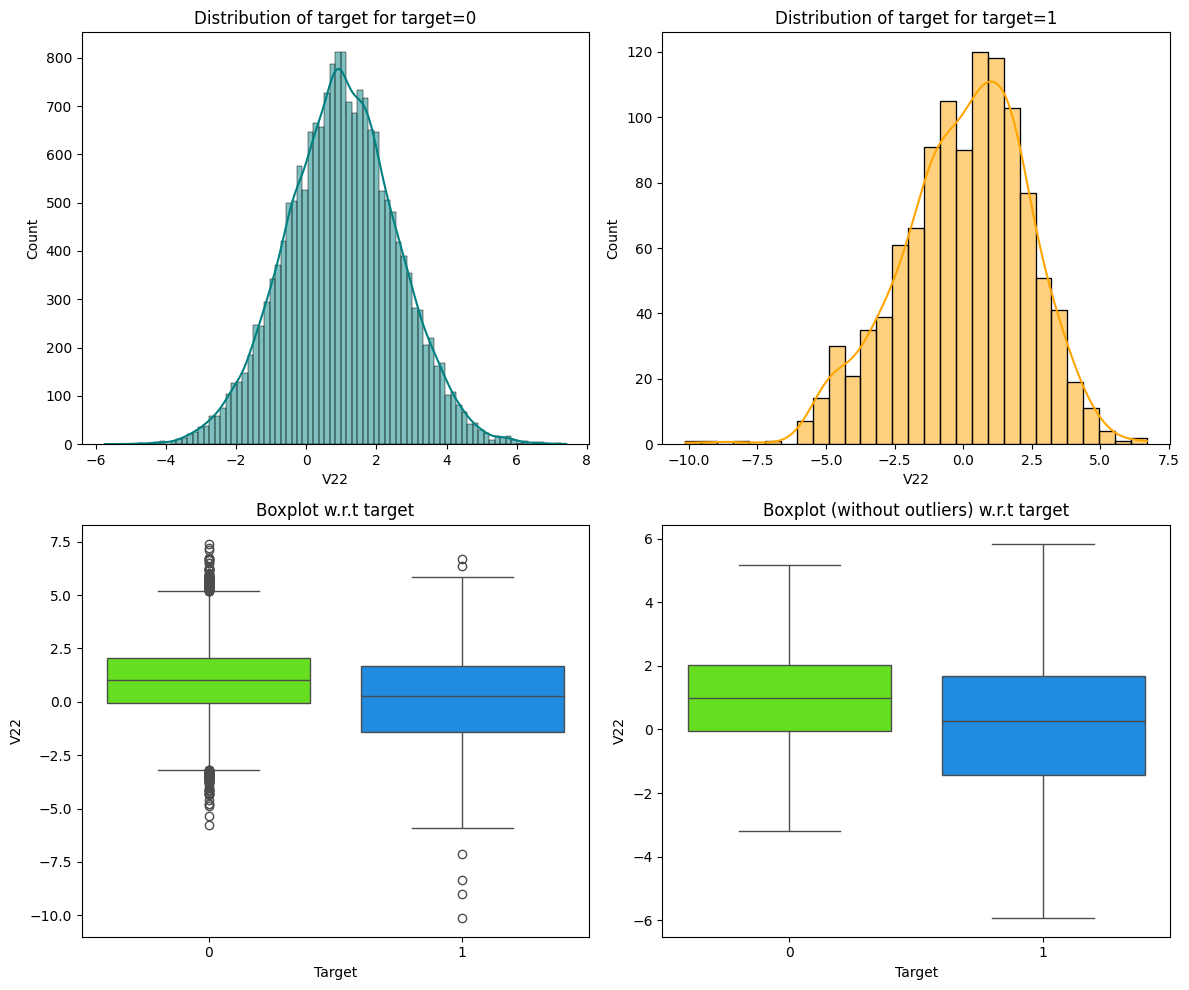

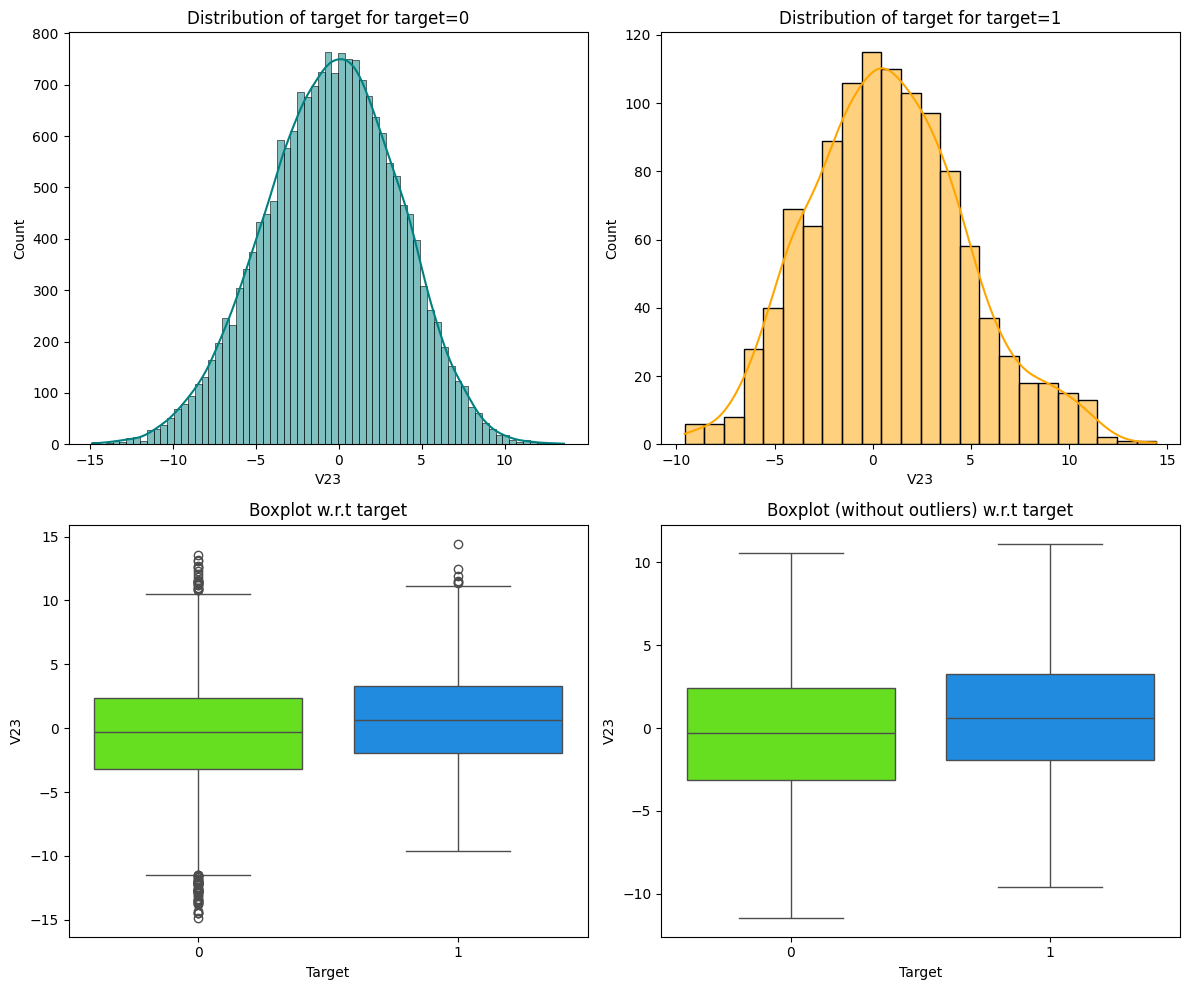

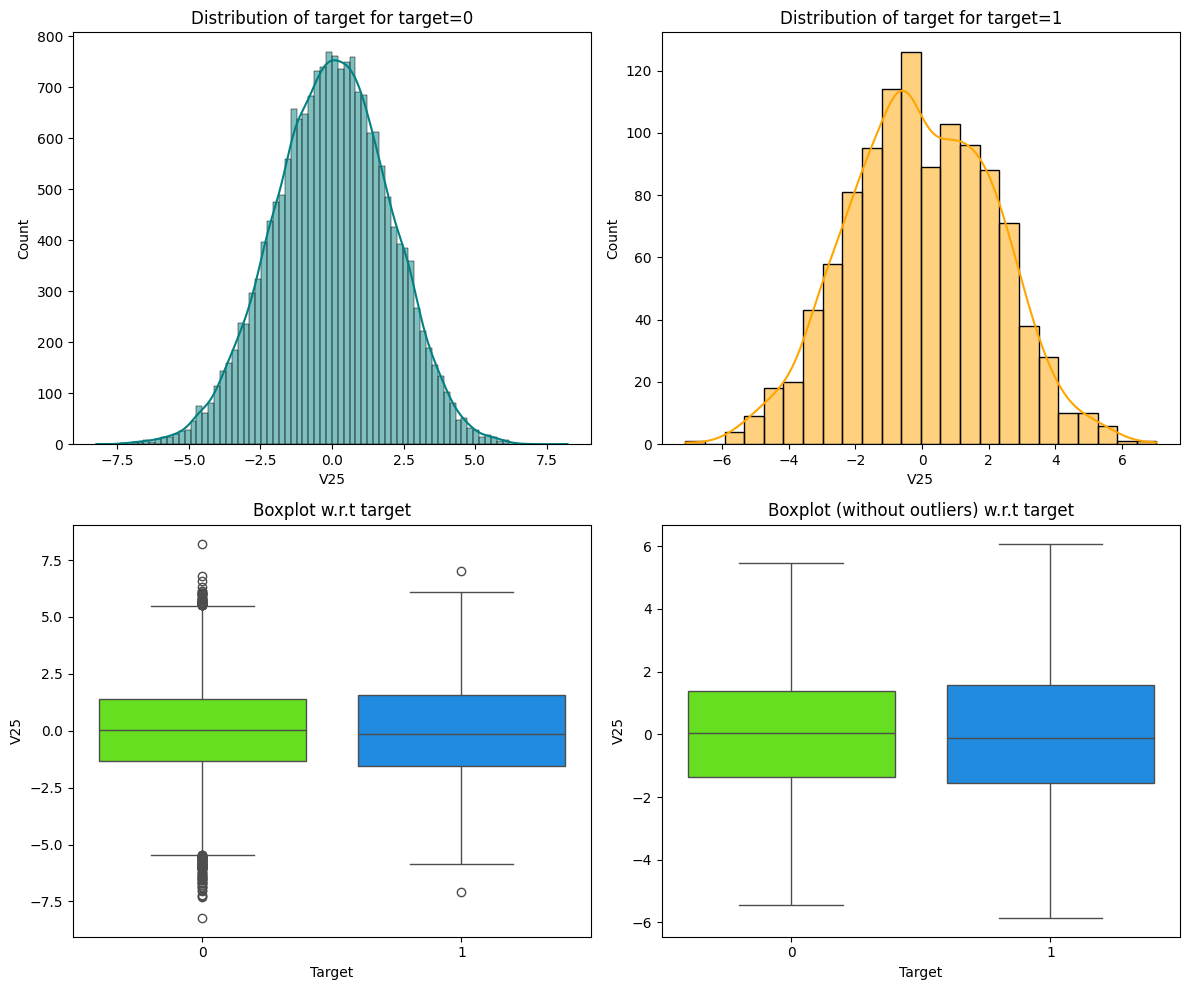

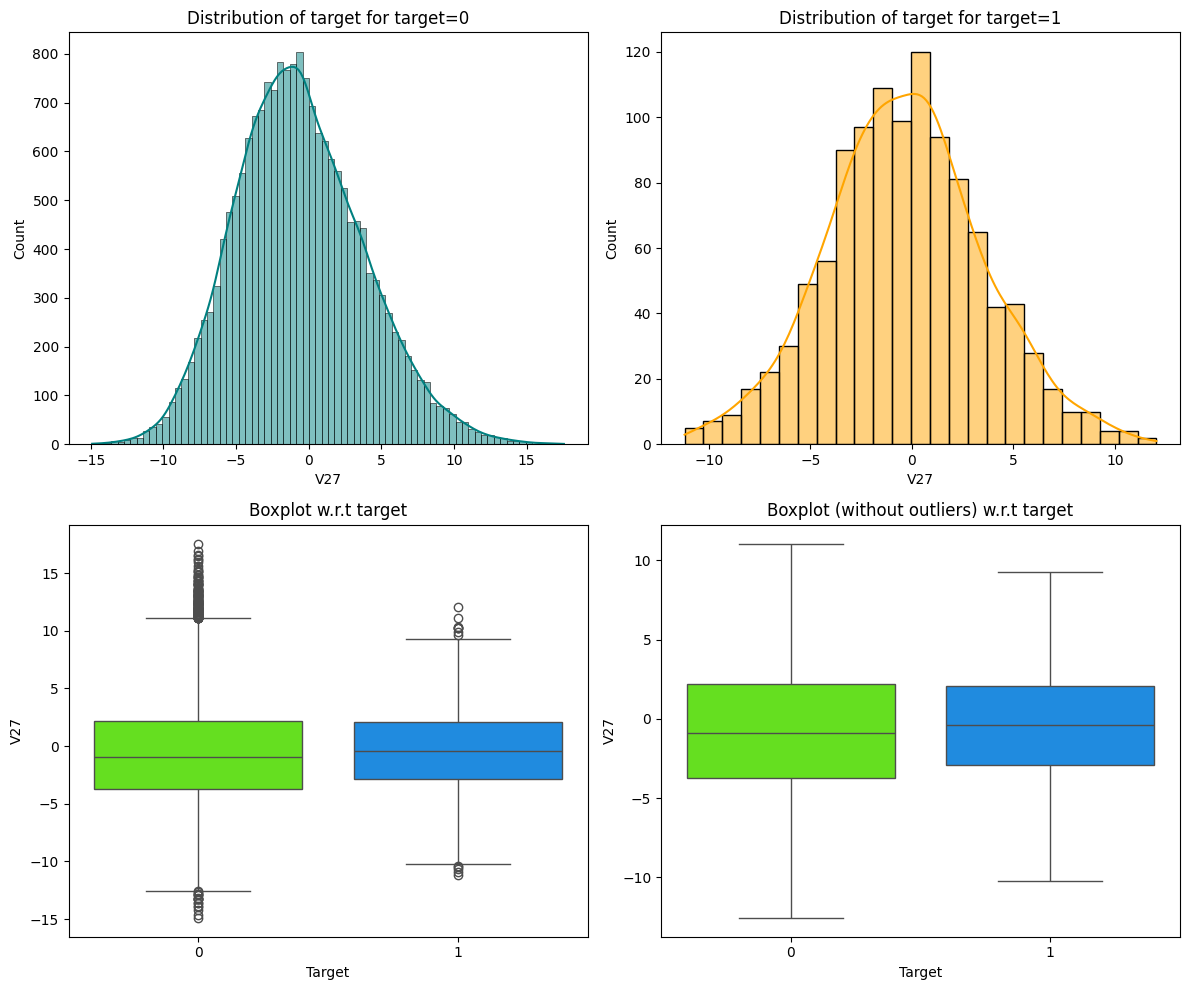

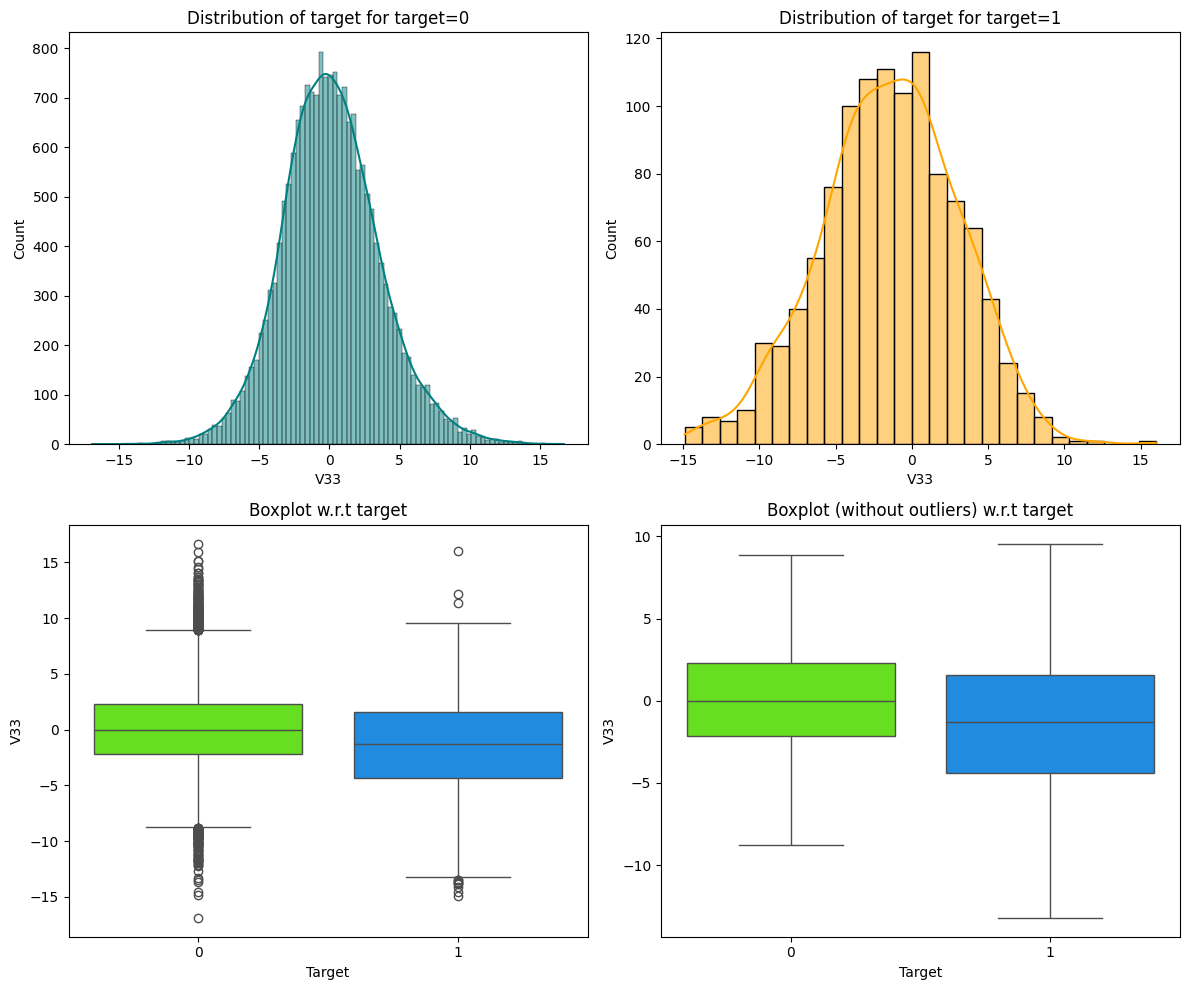

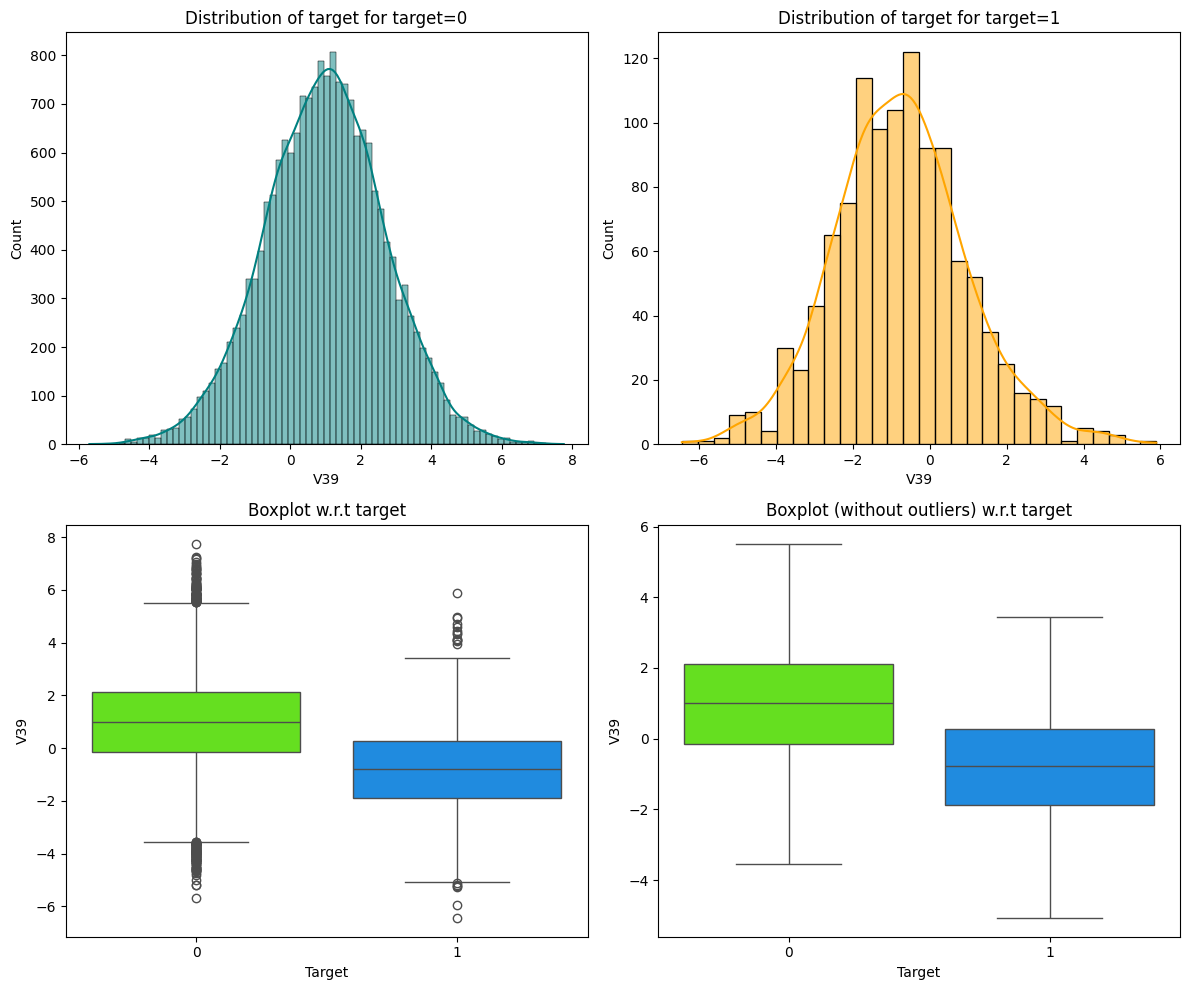

In [ ]:
# Define independent variables that are positively correlated to 'Target'
dv = ['V5', 'V8', 'V9', 'V10', 'V12', 'V16', 'V18', 'V22', 'V23', 'V25', 'V27', 'V33', 'V39']
for variable in dv:
  distribution_plot_wrt_target(df, variable, "Target")

* The distribution of the plot of target variable with a few independent variables is alomost normal.
* The target variable (represented by the y-axis) has different distributions for the two x-axis values (0 and 1).

*  The median difference suggests that the relationship between these independent variables and the target variable varies depending on the x-axis value.

* The presence of outliers indicates potential extreme values or anomalies in the data.

*   Further statistical analysis, such as hypothesis testing or regression modeling, could provide additional insights into the relationship between v5 and the target variable.


##Data Pre-processing

*  We will impute the missing values in the data after splitting into train, validation, and test sets to avoid data leakage.

##Data Preparation for Modeling

In [ ]:
# Encode the target variable
label_encoder = LabelEncoder()
df['Target'] = label_encoder.fit_transform(df['Target'])

# Prepare data for modeling
X = df.drop(columns=['Target'])
y = df['Target']
X_test = df1.drop(columns=['Target'], errors='ignore')

##Check Class Distribution Before Splitting

In [ ]:
print("Class distribution in target variable:")
class_counts = y.value_counts()
print(class_counts)

Class distribution in target variable:
Target
0    18890
1     1110
Name: count, dtype: int64


*  Wind energy sources and parts that may not fail accounts for 94.45% of the dataset, while the remaining percentage account for failure of wind energy sources and parts.


##9. Handle Classes with Fewer Samples

In [ ]:
for class_label in y.unique():
    class_count = (y == class_label).sum()
    if class_count < 2:
        print(f"Class {class_label} has only {class_count} instances, can't use stratify.")
        # Remove the single instance class
        X = X[y != class_label]
        y = y[y != class_label]
        print(f"Class {class_label} removed from the dataset")



##Split Train into Train and Validation Set

We have no need to split the dataset into train and test data since we are already given.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
print(X_train.shape, X_val.shape, X_test.shape)

(16000, 40) (4000, 40) (5000, 40)


*The splitted dataset has train set with 16000rows and 40 columns; validation set with 4000 rows and 40 columns, and test set with 5000 rows and 4o columns.

## Missing Value Imputation of Both Train and Test Data Using SimpleImputer

In [ ]:
# defining a list with names of columns that will be used for imputation in Train set
reqd_col_for_impute = ['V1','V2']

In [ ]:
df[reqd_col_for_impute].head()

V1        V2
0 -4.464606 -4.679129
1  3.365912  3.653381
2 -3.831843 -5.824444
3  1.618098  1.888342
4 -0.111440  3.872488

In [ ]:
# defining a list with names of columns that will be used for imputation in Test set
df1[reqd_col_for_impute].head()

V1        V2
0 -0.613489 -3.819640
1  0.389608 -0.512341
2 -0.874861 -0.640632
3  0.238384  1.458607
4  5.828225  2.768260

In [ ]:
# Initialize the SimpleImputer with the strategy to replace missing values with the median
imputer = SimpleImputer(strategy='median')

# Fit and transform the data with the imputer to impute missing values
X_imputed = imputer.fit_transform(X_train)

# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation data
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])


# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22

In [ ]:
# Verifying the shapes of the imputed data
print("X_train_imputed shape:", X_train.shape)
print("X_val_imputed shape:", X_val.shape)
print("X_test_imputed shape:", X_test.shape)

X_train_imputed shape: (16000, 40)
X_val_imputed shape: (4000, 40)
X_test_imputed shape: (5000, 40)


* Train set, Validation set, and Test set have no missing values.

##Exploratory Data Analysis after fixing all the missing values

##Correlation Check

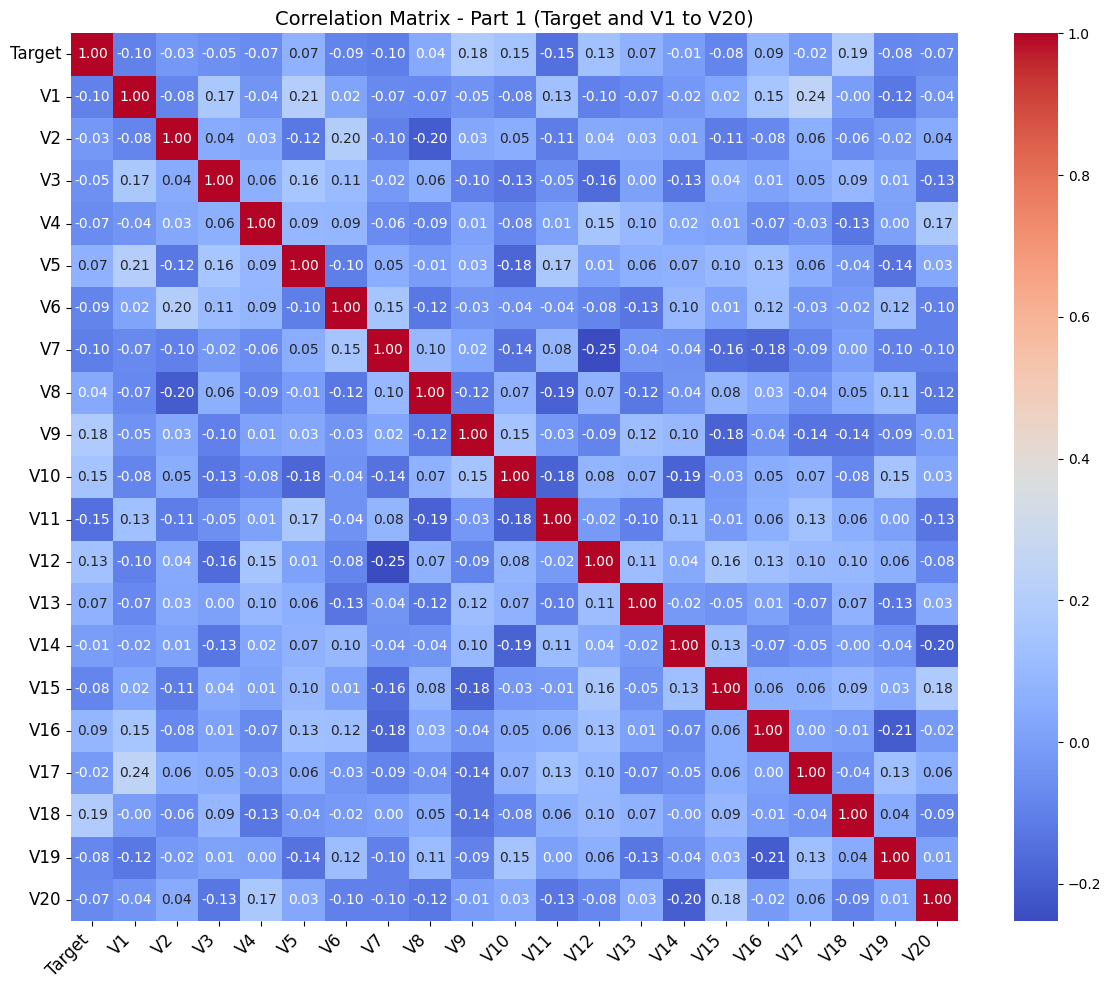

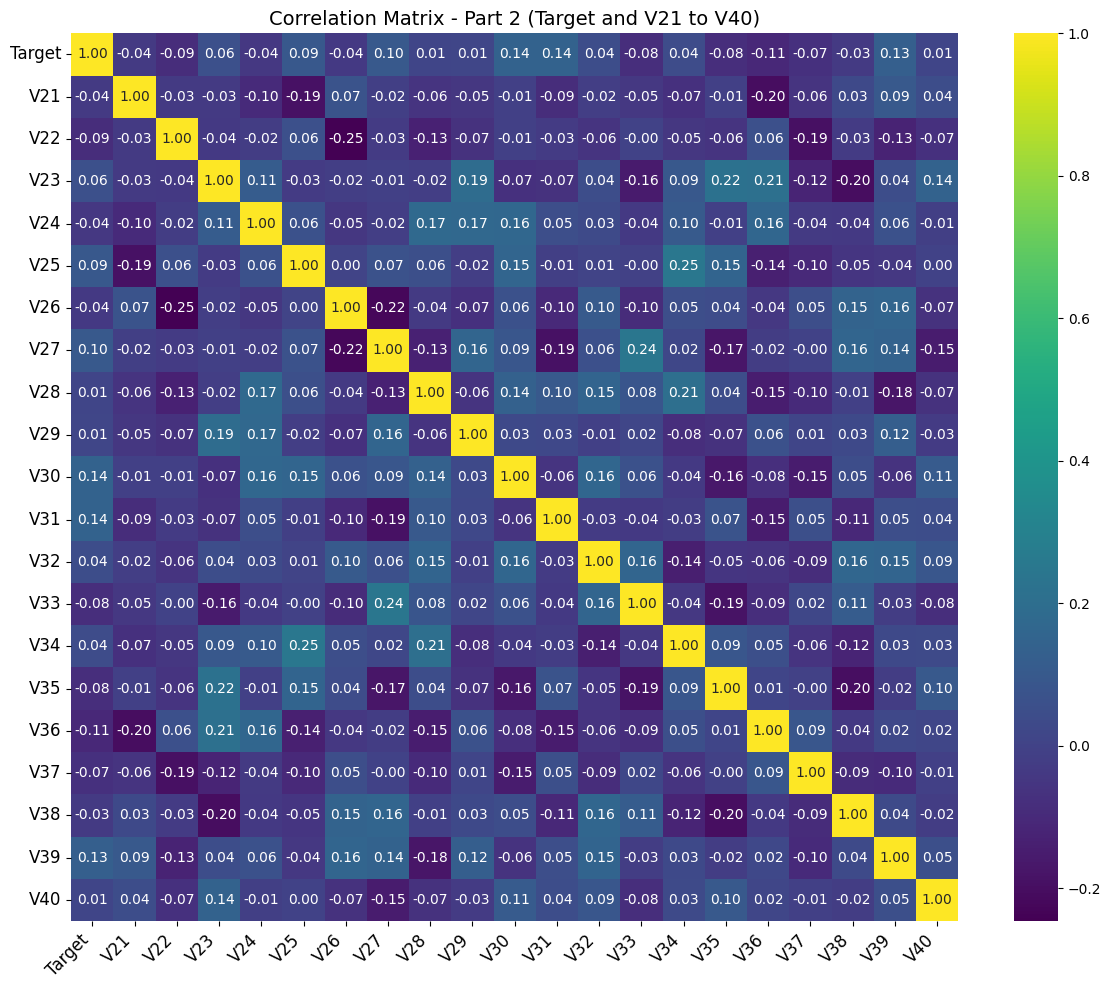

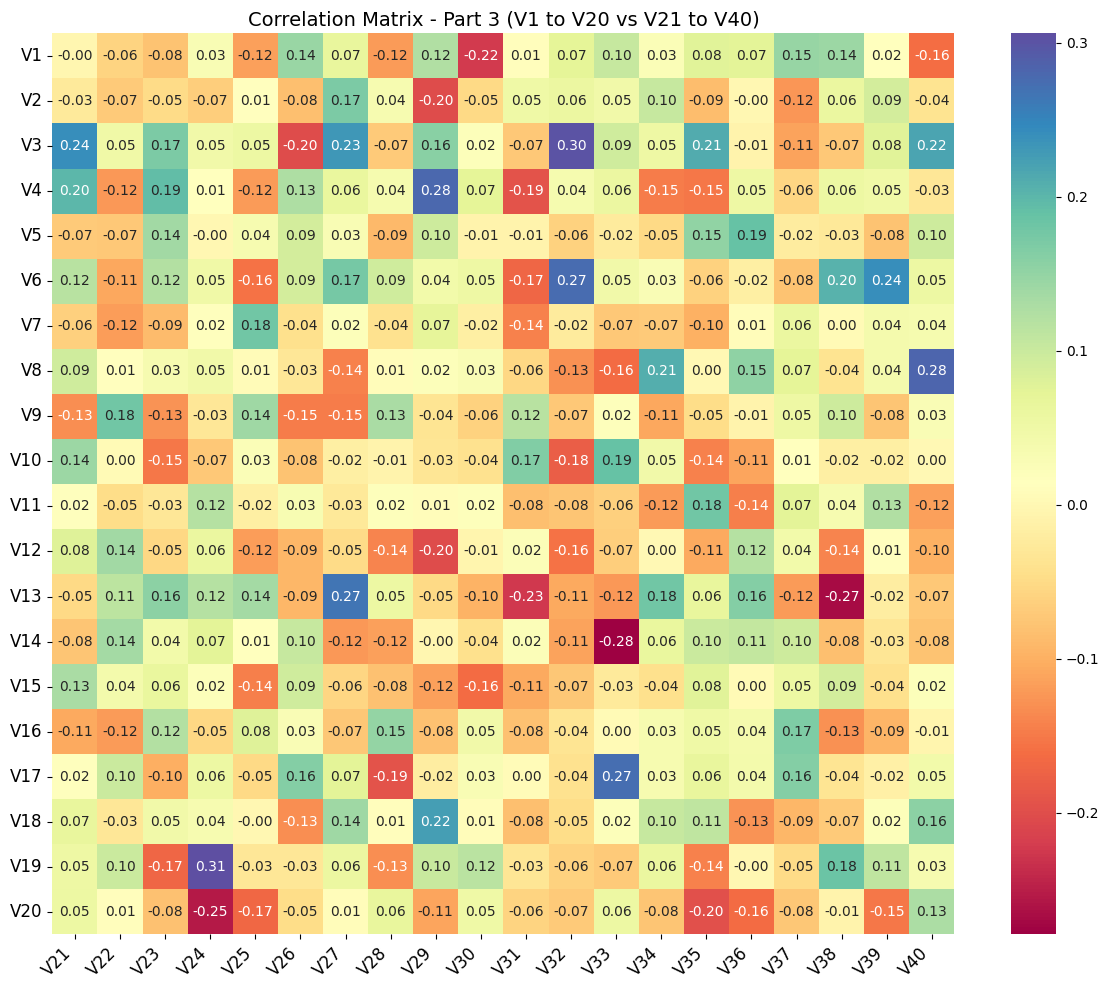

In [ ]:
# Generate a sample dataframe with 40 independent variables and 1 target variable
np.random.seed(42)
num_samples = 100  # You can adjust the number of samples
data = pd.DataFrame(np.random.rand(num_samples, 40), columns=[f'V{i}' for i in range(1, 41)])
data['Target'] = np.random.rand(num_samples)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Specify the columns for the different parts
variables_part1 = ['Target'] + [f'V{i}' for i in range(1, 21)]
variables_part2 = ['Target'] + [f'V{i}' for i in range(21, 41)]
variables_part3_x = [f'V{i}' for i in range(1, 21)]
variables_part3_y = [f'V{i}' for i in range(21, 41)]

# Create correlation matrices for each part
correlation_matrix_part1 = correlation_matrix.loc[variables_part1, variables_part1]
correlation_matrix_part2 = correlation_matrix.loc[variables_part2, variables_part2]
correlation_matrix_part3 = correlation_matrix.loc[variables_part3_x, variables_part3_y]

# Define a helper function to plot heatmaps
def plot_heatmap(matrix, title, cmap, filename):
    plt.figure(figsize=(12, 10))
    sns.heatmap(matrix, annot=True, cmap=cmap, fmt=".2f", annot_kws={"size": 10})
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(rotation=0, fontsize=12)
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

# Plot each part separately with readable colors and increased font size
plot_heatmap(correlation_matrix_part1, 'Correlation Matrix - Part 1 (Target and V1 to V20)', 'coolwarm', 'part1_heatmap.png')
plot_heatmap(correlation_matrix_part2, 'Correlation Matrix - Part 2 (Target and V21 to V40)', 'viridis', 'part2_heatmap.png')
plot_heatmap(correlation_matrix_part3, 'Correlation Matrix - Part 3 (V1 to V20 vs V21 to V40)', 'Spectral', 'part3_heatmap.png')


*  The relationship between target variable and independent variables after all missing values have been fixed has not changed compared to when there were still missing values in the dataset.
  



##Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

1.True positives (TP) are failures correctly predicted by the model.

2.False negatives (FN) are real failures in a generator where there is no detection by model.

3.False positives (FP) are failure detections in a generator where there is no failure.

##Which metric to optimize?

We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

### Defining scorer to be used for cross-validation and hyperparameter tuning

In [ ]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

##Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

##Defining scorer to be used for cross-validation and hyperparameter tuning

* We want to reduce false negatives and will try to maximize "Recall".

* To maximize Recall, we can use Recall as a scorer in cross-validation and hyperparameter tuning.

## Model Building on original data

##Let's start by building different models using KFold and cross_val_score and tune the best model using GridSearchCV and RandomizedSearchCV



* Stratified K-Folds cross-validation
provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.

In [ ]:
# Empty list to store all the models
models = []

# Appending initial models into the list
models.append(("Logistic Regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1,eval_metric="logloss")))
results1 = []  # Empty list to store all models' CV scores
names = []  # Empty list to store name of the models

# Define the scorer for model evaluation (e.g., recall score)
scorer = 'recall'

# Loop through all models to get the mean cross-validated score
print("\nCross-Validation performance on the training dataset:\n")

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # Setting number of splits equal to 5
    cv_result = cross_val_score(estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold)
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\nValidation Performance:\n")

# For evaluation on the validation dataset (X_val and y_val)
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on the training dataset:

Logistic Regression: 0.48988129245223133
Bagging: 0.7083222243382213
Random Forest: 0.7195899193804354
Gradient Boosting: 0.7173363803719928
AdaBoost: 0.6215641465117756
Decision Tree: 0.7196280073636767
XGBoost: 0.7995683361899321

Validation Performance:

Logistic Regression: 0.49099099099099097
Bagging: 0.7207207207207207
Random Forest: 0.7432432432432432
Gradient Boosting: 0.7432432432432432
AdaBoost: 0.6576576576576577
Decision Tree: 0.7387387387387387
XGBoost: 0.8198198198198198


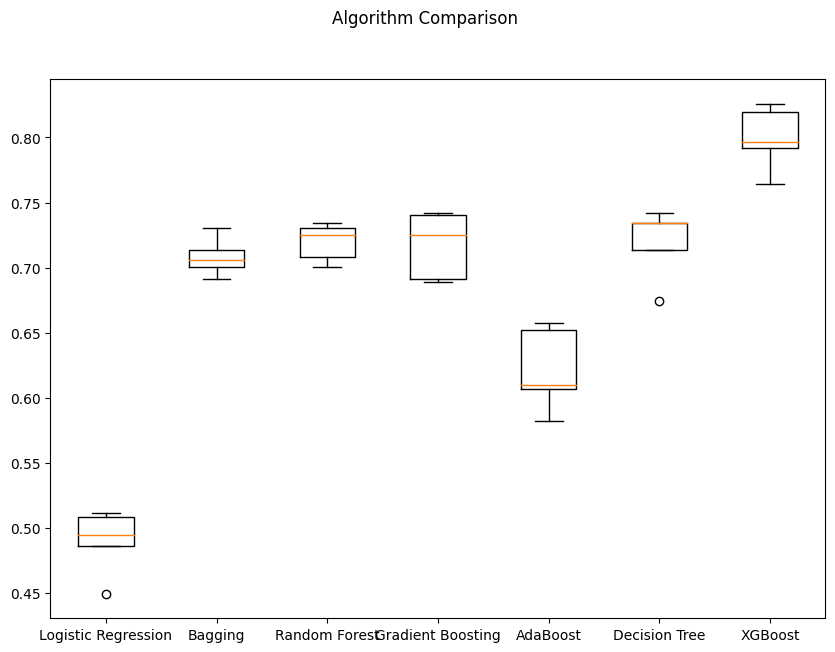

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()



*   The plot shows that XGBoost has the highest cross-validation  and validation performance follow by Random Forest and Decision Tree.
*   Gradient Boost and Bagging model performed moderately.
*  Logistic Regression's performance on cross-validation and validation is the least,and so we shall drop it, but go ahead to tune Adaboost whose performance is also considerable.

---



##Model Building with oversampled data

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 888
Before OverSampling, counts of label '0': 15112 

After OverSampling, counts of label '1': 15112
After OverSampling, counts of label '0': 15112 

After OverSampling, the shape of train_X: (30224, 40)
After OverSampling, the shape of train_y: (30224,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))


results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# Evaluate models using cross-validation on oversampled data
print("\nCross-validation performance on oversampled training dataset:\n")
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(estimator=model, X=X_train_over, y=y_train_over, scoring="recall", cv=kfold)
    results1.append(cv_result)
    names.append(name)
    print(f"{name}: {cv_result.mean()}")

# Fit models on the entire oversampled training data
print("\nValidation performance on oversampled validation dataset:\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print(f"{name}: {scores}")




Cross-validation performance on oversampled training dataset:

Bagging: 0.9781630048735123
Random forest: 0.9855744607906776
GBM: 0.9239674518302545
Adaboost: 0.8935280870047044
Xgboost: 0.9903390573001649
dtree: 0.9732668119313808

Validation performance on oversampled validation dataset:

Bagging: 0.8423423423423423
Random forest: 0.8558558558558559
GBM: 0.8828828828828829
Adaboost: 0.8558558558558559
Xgboost: 0.8648648648648649
dtree: 0.8198198198198198


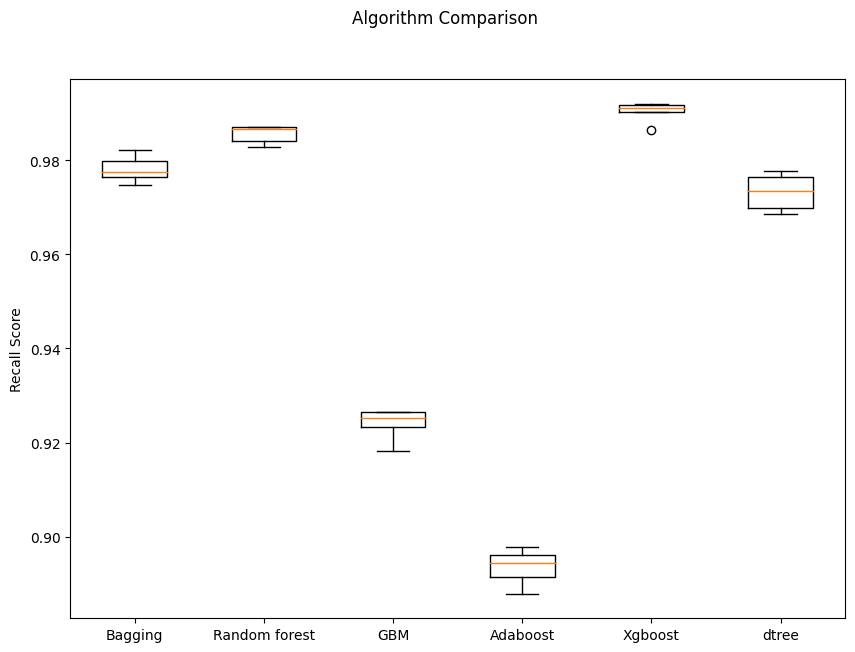

In [ ]:
# Plotting boxplots for CV scores of all models
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results1)
ax.set_xticklabels(names)
plt.ylabel('Recall Score')
plt.show()


1.Random Forest and Xgboost still maintain their positions as top performers, demonstrating robustness even on the oversampled dataset.

2.The oversampling technique seems to have positively impacted GBM's performance, bringing it closer to the top performers.

3.Bagging and Adaboost show a noticeable drop in performance on the oversampled validation dataset compared to their training performance, suggesting potential overfitting or sensitivity to the changed data distribution.

4.The decision tree's complete failure to perform on the oversampled validation set indicates a critical issue with its ability to generalize to the modified dataset.



##Model Building with undersampled data

In [ ]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_under == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_under == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_under.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_under.shape))

Before UnderSampling, counts of label '1': 888
Before UnderSampling, counts of label '0': 15112 

After UnderSampling, counts of label '1': 888
After UnderSampling, counts of label '0': 888 

After UnderSampling, the shape of train_X: (1776, 40)
After UnderSampling, the shape of train_y: (1776,) 




Cross-Validation performance on training dataset:

Bagging: 0.8704627689963816
Random forest: 0.8975052370976957
GBM: 0.8907446200723672
Adaboost: 0.8715927124992063
Xgboost: 0.8952707420808734
dtree: 0.8468355233923697

Validation Performance:

Bagging: 0.8918918918918919
Random forest: 0.8783783783783784
GBM: 0.8873873873873874
Adaboost: 0.8558558558558559
Xgboost: 0.8918918918918919
dtree: 0.8468468468468469


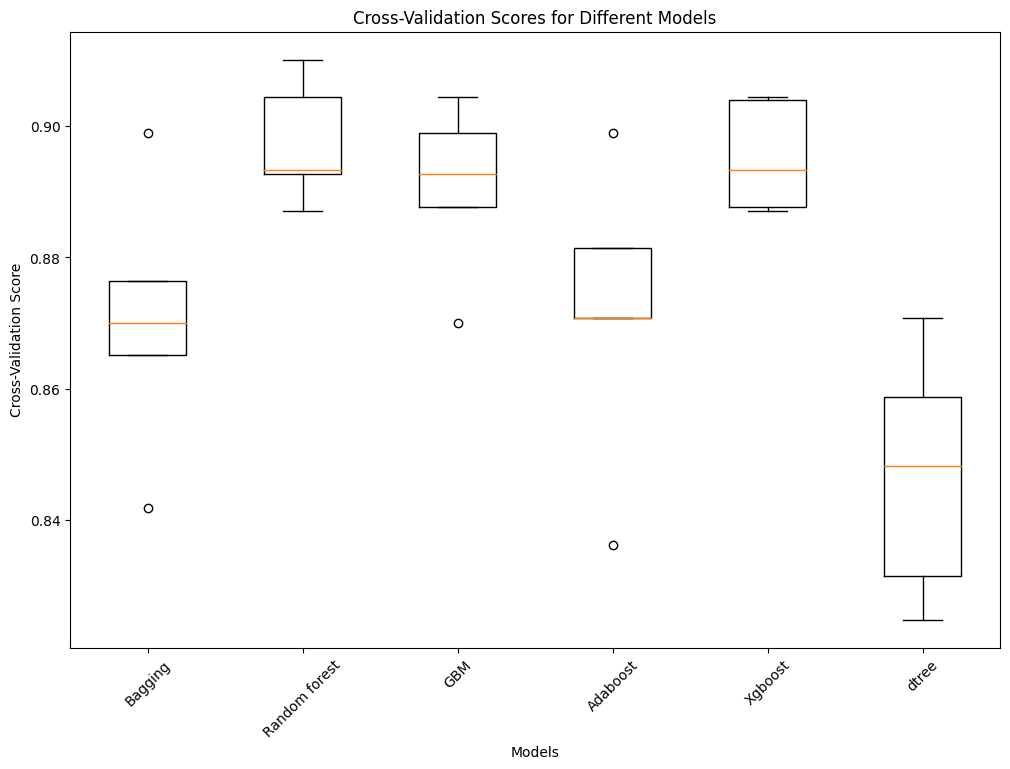

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results11 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_under, y=y_train_under, scoring=scorer, cv=kfold
    ) ## ode to build models on undersampled data
    results11.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_under, y_train_under) ## code to build models on undersampled data
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))

# Boxplot for cross-validation scores
plt.figure(figsize=(12, 8))
plt.boxplot(results11, labels=names)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Models')
plt.ylabel('Cross-Validation Score')
plt.xticks(rotation=45)
plt.show()



* Random Forest, GBM, and Xgboost
consistently show strong performance on both training and validation sets, suggesting good generalization.

* Potential Overfitting: Decision Tree, while performing well on the training set, shows a significant drop in performance on the validation set, indicating potential overfitting.

* We may likely consider focusing on Random Forest, GBM, or Xgboost for further tuning and evaluation, as they demonstrate a balance between strong performance and generalization.

**Conclusion on models to tune based on the cross validation performance and validation performance.**

* We shall consider Criteria for Model Selection:

1.High validation performance relative to training performance to ensure good generalization.

2.Consistent performance across both oversampled and undersampled datasets.

3.Models showing significant potential for improvement through hyperparameter tuning.

XGBoost, GBM, and Bagging models are preferred to be tuned because

*XGBoost shows the highest potential in terms of cross-validation performance on the oversampled data. While there's a performance drop in validation for the oversampled data, it maintains high validation scores with undersampled data, suggesting better generalization.

*GBM shows strong and consistent performance across both validation datasets.

*Bagging shows robust performance with undersampled data, indicating good generalization. Its performance discrepancy between training and validation on oversampled data suggests potential improvement through tuning and perhaps modifying the base estimator.



* We shall drop
1.Random Forest, though performs consistently well but shows signs of overfitting on oversampled data. Its performance on undersampled data is slightly less competitive.

2.Decision Trees are prone to overfitting, especially with smaller datasets or when not pruned effectively. The high variability in performance indicates that the Decision Tree might be capturing noise in the training data, leading to poor generalization.

3.While AdaBoost improves performance by focusing on difficult-to-classify samples, it might still fall short in terms of overall model complexity and generalization.

##Hperparameter Tuning

.We will tune  XGBoost, Bagging, and GBM models using GridSearchCV and RandomizedSearchCV.

**##Hyperparameter Tuning using Oversampled data**

##XGBoost Tuning using GridSearchCV

In [ ]:
%%time
# Define the XGBoost model
model = XGBClassifier(random_state=1, eval_metric='logloss')

# Parameter grid to pass in GridSearchCV
param_grid = {
    'scale_pos_weight': [5, 10],
    'gamma': [0, 3, 5],
    'subsample': [0.8, 0.9],
    'n_estimators': [150,200,250],
    'learning_rate': [0.1, 0.2],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train_over, y_train_over)

print("Best Parameters: {}\nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))


Best Parameters: {'gamma': 0, 'learning_rate': 0.1, 'n_estimators': 200, 'scale_pos_weight': 10, 'subsample': 0.8}
Score: 0.9963604643245816
CPU times: user 1min 18s, sys: 9.2 s, total: 1min 28s
Wall time: 12min 36s


In [ ]:
# Creating new pipeline with best parameters
tuned_xgb1 = XGBClassifier(
    scale_pos_weight=10,
    gamma=0,
    subsample=0.8,
    n_estimators=200,
    learning_rate=0.1,
)

tuned_xgb1.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#check the performance on Training set
xgb1_train_perf = model_performance_classification_sklearn(tuned_xgb1, X_train_over, y_train_over)## the code to check the performance on undersampled train set
print("Training performance:")
xgb1_train_perf

Training performance:


Accuracy  Recall  Precision        F1
0  0.997651     1.0   0.995324  0.997656

In [ ]:
# Calculating different metrics on validation set
xgb1_val_perf = model_performance_classification_sklearn(tuned_xgb1, X_val, y_val)
print("Validation performance:")
xgb1_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0   0.97525  0.873874   0.732075  0.796715

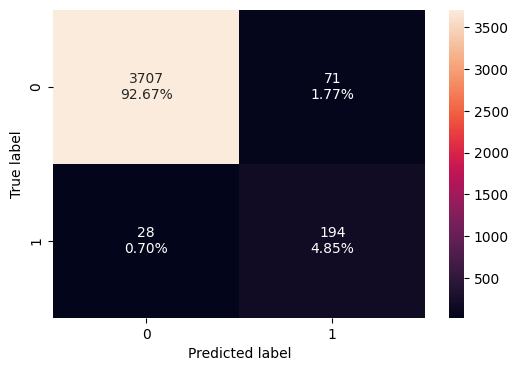

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_xgb1, X_val, y_val)

1.The XGBoost model performed exceptionally on the training set, fails to generalize to the validation set, particularly in identifying the positive class.

2.The high false negative rate on the validation set (6 FN) significantly impacts recall, precision, and F1 scores.

1.XGBoost model performs exceptionally well on the training set with nearly perfect metrics.

2.There is a notable discrepancy when validating on unseen data. The lower validation recall indicates the model may not be generalizing well, particularly in identifying positive cases, as demonstrated by the high number of false negatives.

##XGBoost Tuning using RandomizedSearchCV

In [ ]:
%time
# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={ 'n_estimators': [150, 200, 250], 'scale_pos_weight': [5,10], 'learning_rate': [0.1,0.2], 'gamma': [0,3,5], 'subsample': [0.8,0.9] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over) ## the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs
Best parameters are {'subsample': 0.9, 'scale_pos_weight': 5, 'n_estimators': 200, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.8709090909090909:


In [ ]:
# Creating new pipeline with best parameters
tuned_xgb2 = XGBClassifier(
    scale_pos_weight=10,
    gamma=5,
    subsample=0.9,
    n_estimators=200,
    learning_rate=0.1,
)

tuned_xgb2.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb2_train_perf = model_performance_classification_sklearn(tuned_xgb2, X_train_over, y_train_over) ##the code to check the performance on oversampled train set
print("Training performance:")
xgb2_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.991795  0.999934   0.983917  0.991861

In [ ]:
# Calculating different metrics on validation set
xgb2_val_perf = model_performance_classification_sklearn(tuned_xgb2, X_val, y_val)
print("Validation performance:")
xgb2_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0   0.96575  0.882883   0.638436  0.741021

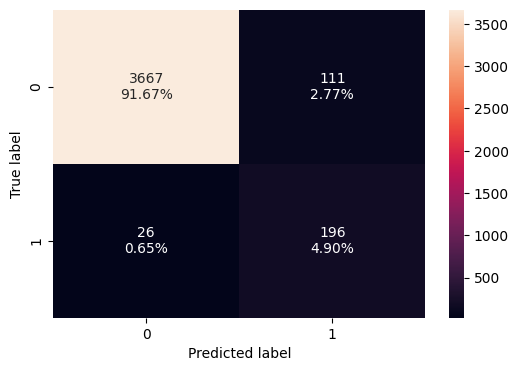

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_xgb2, X_val, y_val)

##Bagging Tuning using GridSearchCV



In [ ]:
%%time
# Define theB agging model
model = BaggingClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV
param_grid = {
    'max_samples': [0.8, 0.9, 1],
    'max_features': [0.7, 0.8, 0.9],
    'n_estimators': [30, 50,70],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train_over, y_train_over)

print("Best Parameters: {}\nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Best Parameters: {'max_features': 0.7, 'max_samples': 0.9, 'n_estimators': 70}
Score: 0.5599999999999999
CPU times: user 8.12 s, sys: 109 ms, total: 8.23 s
Wall time: 22.2 s


In [ ]:
# Creating new pipeline with best parameters
tuned_bag1 = BaggingClassifier(
    max_samples=1,
    max_features=0.7,
    n_estimators=30
)

tuned_bag1.fit(X_train_over, y_train_over)  # Fit the model on oversampled data

BaggingClassifier(max_features=0.7, max_samples=1, n_estimators=30)

In [ ]:
# check the performance on Training set
bag1_train_perf = model_performance_classification_sklearn(tuned_bag1, X_train_over, y_train_over)## the code to check the performance on undersampled train set
print("Training performance:")
bag1_train_perf

Training performance:


Accuracy  Recall  Precision   F1
0       0.5     0.0        0.0  0.0

In [ ]:
# Calculating different metrics on validation set
bag1_val_perf = model_performance_classification_sklearn(tuned_bag1, X_val, y_val)
print("Validation performance:")
bag1_val_perf

Validation performance:


Accuracy  Recall  Precision   F1
0    0.9445     0.0        0.0  0.0

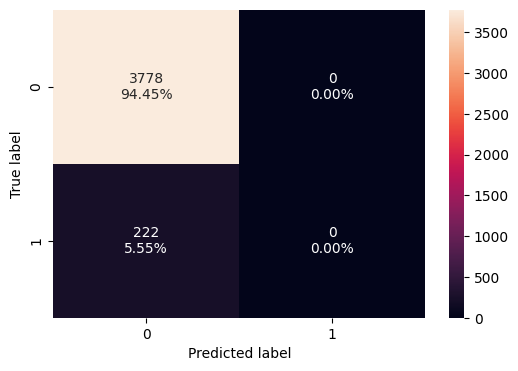

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_bag1, X_val, y_val)

##Bagging Tuning using RandomizedSearchCV

In [ ]:
# defining model
Model = BaggingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = { 'max_samples': [0.8,0.9,1], 'max_features': [0.7,0.8,0.9], 'n_estimators' : [30,50,70] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over) ## the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.7} with CV score=0.5599999999999999:


In [ ]:
# Creating new pipeline with best parameters
tuned_bag2 = BaggingClassifier(
    max_samples=1,
    max_features=0.7,
    n_estimators=30
)

tuned_bag2.fit(X_train_over, y_train_over)  # Fit the model on oversampled data

BaggingClassifier(max_features=0.7, max_samples=1, n_estimators=30)

In [ ]:
# check the performance on Training set
bag2_train_perf = model_performance_classification_sklearn(tuned_bag2, X_train_over, y_train_over)## the code to check the performance on undersampled train set
print("Training performance:")
bag2_train_perf

Training performance:


Accuracy  Recall  Precision        F1
0       0.5     1.0        0.5  0.666667

In [ ]:
# Calculating different metrics on validation set
bag2_val_perf = model_performance_classification_sklearn(tuned_bag2, X_val, y_val)
print("Validation performance:")
bag2_val_perf

Validation performance:


Accuracy  Recall  Precision        F1
0    0.0555     1.0     0.0555  0.105163

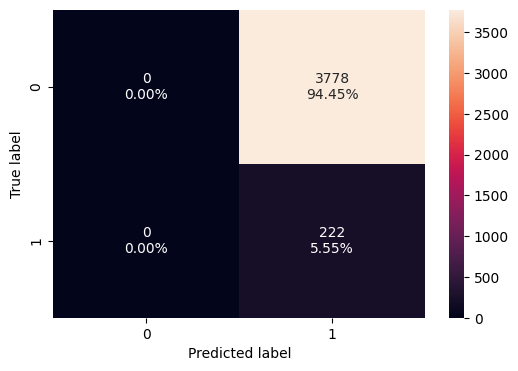

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_bag2, X_val, y_val)

##GradientBoost Tuning using GridSearchCV

In [ ]:
%%time
# Define theB agging model
model =GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV
param_grid = {
    "subsample": [0.5, 0.7],
    "n_estimators": np.arange(100, 150, 25),
    "learning_rate": [0.2, 0.05, 1],
    "max_features": [0.5, 0.7]
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train_over, y_train_over)

print("Best Parameters: {}\nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))
pass
pass

Best Parameters: {'learning_rate': 0.2, 'max_features': 0.5, 'n_estimators': 100, 'subsample': 0.7}
Score: 0.6763636363636364
CPU times: user 3.05 s, sys: 141 ms, total: 3.19 s
Wall time: 16.2 s


In [ ]:
# Creating new pipeline with best parameters
tuned_gb1 = GradientBoostingClassifier(random_state=1)
{
    "subsample": 0.7,
    "n_estimators": 100,
    "learning_rate": 0.2,
    "max_features": 0.5
}


tuned_gb1.fit(X_train_over, y_train_over)  # Fit the model on oversampled data

In [ ]:
# check the performance on Training set
gb1_train_perf = model_performance_classification_sklearn(tuned_gb1, X_train_over, y_train_over)## the code to check the performance on oversampled train set
gb1_train_perf

Accuracy    Recall  Precision        F1
0   0.95047  0.926085   0.973565  0.949232

In [ ]:
# Calculating different metrics on validation set
gb1_val_perf = model_performance_classification_sklearn(tuned_gb1, X_val, y_val)
print("Validation performance:")
gb1_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0   0.96225  0.882883   0.610592  0.721915

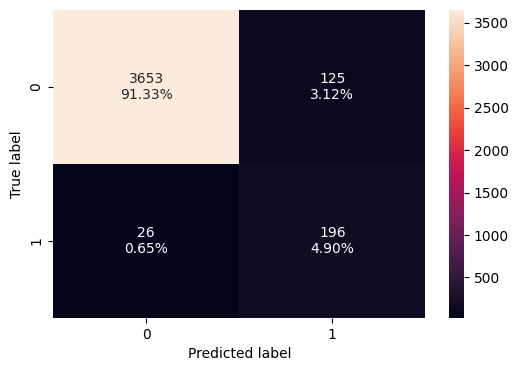

In [ ]:
## creating confusion matrix
confusion_matrix_sklearn(tuned_gb1, X_val, y_val)

## GradientBoost Tuning using RandomizedSearchCV

In [ ]:
%%time

# Define the GradientBoosting model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": np.arange(100, 150, 25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample": [0.5, 0.7],
    "max_features": [0.5, 0.7]
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Create the RandomizedSearchCV object
randomized_cv = RandomizedSearchCV(
    estimator=model,  # Corrected 'Model' to 'model'
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)  # Fit the model on oversampled data

# Output the best parameters and best CV score
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_, randomized_cv.best_score_))



Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.2} with CV score=0.6763636363636364:
CPU times: user 3.87 s, sys: 80.7 ms, total: 3.95 s
Wall time: 18.7 s


In [ ]:
# Creating a new instance of GradientBoostingClassifier with the best parameters
tuned_gb2 = GradientBoostingClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=0.2,
    subsample=0.7,
    max_features=0.5
)

# Fit the model on the oversampled data
tuned_gb2.fit(X_train_over, y_train_over)



GradientBoostingClassifier(learning_rate=0.2, max_features=0.5, random_state=1,
                           subsample=0.7)

In [ ]:
# check the performance on Training set
gb2_train_perf = model_performance_classification_sklearn(tuned_gb2, X_train_over, y_train_over)## the code to check the performance on undersampled train set
gb2_train_perf


Accuracy    Recall  Precision        F1
0  0.963936  0.944812   0.982386  0.963233

In [ ]:
# Calculating different metrics on validation set
gb2_val_perf = model_performance_classification_sklearn(tuned_gb2, X_val, y_val)
print("Validation performance:")
gb2_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0     0.971  0.882883   0.685315  0.771654

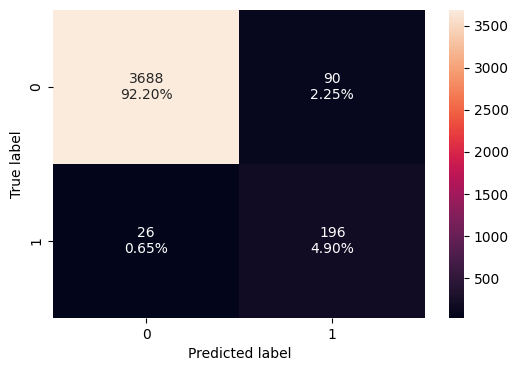

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_gb2, X_val, y_val)

#Hperparameter Tuning with Undersampled data using GridSearchCV and RandomizedSearchCV







##XGBoost Tuning using GridSearchCV

In [ ]:
%%time
# Define the XGBoost model
model = XGBClassifier(random_state=1, eval_metric='logloss')

# Parameter grid to pass in GridSearchCV
param_grid = {
    'scale_pos_weight': [5, 10],
    'gamma': [0, 3, 5],
    'subsample': [0.8, 0.9],
    'n_estimators': [150,200,250],
    'learning_rate': [0.1, 0.2],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train_under, y_train_under)

print("Best Parameters: {}\nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))


Best Parameters: {'gamma': 5, 'learning_rate': 0.1, 'n_estimators': 150, 'scale_pos_weight': 10, 'subsample': 0.8}
Score: 0.9290928711991366
CPU times: user 32.2 s, sys: 601 ms, total: 32.8 s
Wall time: 3min 29s


In [ ]:
# Creating new pipeline with best parameters
tuned_xgb3 = XGBClassifier(
    scale_pos_weight=10,
    gamma=5,
    subsample=0.8,
    n_estimators=150,
    learning_rate=0.1,
    eval_metric='logloss'
)

tuned_xgb3.fit(X_train_under, y_train_under)  # Fit the model on undersampled data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
#check the performance on Training set
xgb3_train_perf = model_performance_classification_sklearn(tuned_xgb3, X_train_under, y_train_under)## the code to check the performance on undersampled train set xgb_train_perf
xgb3_train_perf

Accuracy  Recall  Precision        F1
0  0.980856     1.0   0.963124  0.981215

In [ ]:
# Calculating different metrics on validation set
xgb3_val_perf = model_performance_classification_sklearn(tuned_xgb3, X_val, y_val)
print("Validation performance:")
xgb3_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0    0.8345  0.918919   0.240566  0.381308

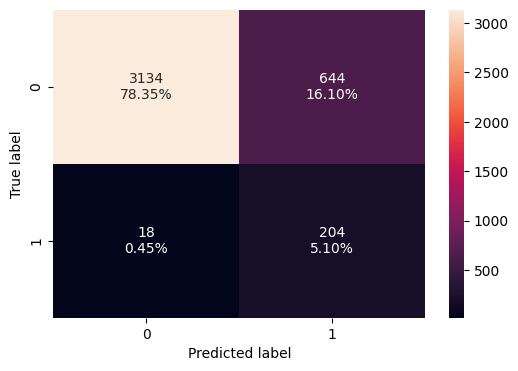

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_xgb3, X_val, y_val)

##XGBoosting Tuning using RandomizedSearchCV

In [ ]:
%time
# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={ 'n_estimators': [150, 200, 250], 'scale_pos_weight': [5,10], 'learning_rate': [0.1,0.2], 'gamma': [0,3,5], 'subsample': [0.8,0.9] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_under, y_train_under) ## the code to fit the model on undersampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.7 µs
Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.9279565796991049:


In [ ]:
# Creating new pipeline with best parameters
tuned_xgb4 = XGBClassifier(
    scale_pos_weight=10,
    gamma=5,
    subsample=0.8,
    n_estimators=200,
    learning_rate=0.1,
)

tuned_xgb4.fit(X_train_under, y_train_under)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#check the performance on Training set
xgb4_train_perf = model_performance_classification_sklearn(tuned_xgb4, X_train_under, y_train_under)## the code to check the performance on undersampled train set xgb_train_perf
xgb4_train_perf

Accuracy  Recall  Precision        F1
0  0.980293     1.0    0.96208  0.980674

In [ ]:
# Calculating different metrics on validation set
xgb4_val_perf = model_performance_classification_sklearn(tuned_xgb4, X_val, y_val)
print("Validation performance:")
xgb4_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0     0.839  0.923423   0.246394  0.388994

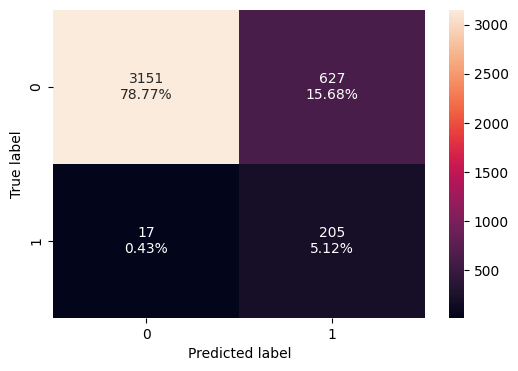

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_xgb4, X_val, y_val)

##Bagging Tuning with Undersampled data using GridSearchCV

In [ ]:
%%time
# Define theB agging model
model = BaggingClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV
param_grid = {
    'max_samples': [0.8, 0.9, 1],
    'max_features': [0.7, 0.8, 0.9],
    'n_estimators': [30, 50,70],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train_under, y_train_under)

print("Best Parameters: {}\nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Best Parameters: {'max_features': 0.7, 'max_samples': 0.8, 'n_estimators': 70}
Score: 0.8953215260585285
CPU times: user 31.3 s, sys: 694 ms, total: 32 s
Wall time: 2min 43s


In [ ]:
# Creating new pipeline with best parameters
tuned_bag3 = BaggingClassifier(
    max_samples=0.8,
    max_features=0.7,
    n_estimators=70,
    random_state=1
)

tuned_bag3.fit(X_train_under, y_train_under)  # Fit the model on undersampled data

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=70,
                  random_state=1)

In [ ]:
# check the performance on Training set
bag3_train_perf = model_performance_classification_sklearn(tuned_bag3, X_train_under, y_train_under)## the code to check the performance on undersampled train set
bag3_train_perf


Accuracy    Recall  Precision        F1
0  0.997185  0.994369        1.0  0.997177

In [ ]:
# Calculating different metrics on validation set
bag3_val_perf = model_performance_classification_sklearn(tuned_bag3, X_val, y_val)
print("Validation performance:")
bag3_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0   0.94125  0.882883   0.483951  0.625199

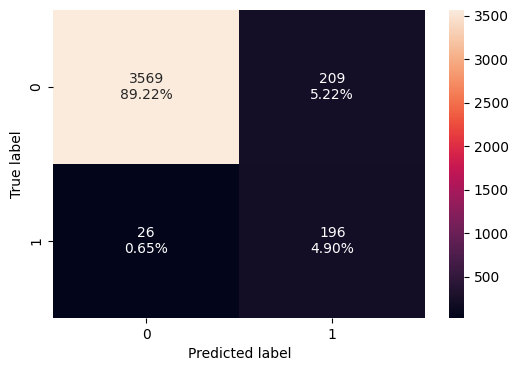

In [ ]:
## creating confusion matrix
confusion_matrix_sklearn(tuned_bag3, X_val, y_val)

##Bagging Tuning with Undersampled data using RandomizedSearchCV

In [ ]:
%time
# defining model
Model = BaggingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = { 'max_samples': [0.8,0.9,1], 'max_features': [0.7,0.8,0.9], 'n_estimators' : [30,50,70], }
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_under, y_train_under)  ## the code to fit the model on undersampled data

print("Best parameters are {} with CV score={}.".format(randomized_cv.best_params_, randomized_cv.best_score_))


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs
Best parameters are {'n_estimators': 70, 'max_samples': 0.8, 'max_features': 0.7} with CV score=0.8953215260585285.


In [ ]:
# Creating new pipeline with best parameters
tuned_bag4 = BaggingClassifier(
    max_samples=0.8,
    max_features=0.7,
    n_estimators=70,
    random_state=1
)

tuned_bag4.fit(X_train_under, y_train_under)  # Fit the model on undersampled data

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=70,
                  random_state=1)

In [ ]:
# check the performance on Training set
bag4_train_perf = model_performance_classification_sklearn(tuned_bag4, X_train_under, y_train_under)## the code to check the performance on undersampled train set
print("Training performance:")
bag4_train_perf


Training performance:


Accuracy    Recall  Precision        F1
0  0.997185  0.994369        1.0  0.997177

In [ ]:
# Calculating different metrics on validation set
bag4_val_perf = model_performance_classification_sklearn(tuned_bag4, X_val, y_val)
print("Validation performance:")
bag4_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0   0.94125  0.882883   0.483951  0.625199

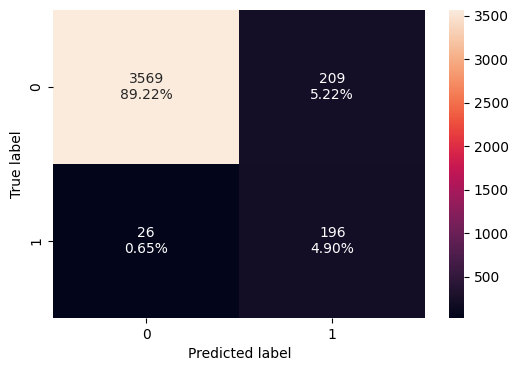

In [ ]:
## creating confusion matrix
confusion_matrix_sklearn(tuned_bag4, X_val, y_val)

##GradientBoost Tuning using GridSearchCV

In [ ]:
%%time
# Define theB agging model
model =GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV
param_grid = {
    "subsample": [0.5, 0.7],
    "n_estimators": np.arange(100, 150, 25),
    "learning_rate": [0.2, 0.05, 1],
    "max_features": [0.5, 0.7]
}
# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train_under, y_train_under)

print("Best Parameters: {}\nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Best Parameters: {'learning_rate': 0.2, 'max_features': 0.5, 'n_estimators': 125, 'subsample': 0.7}
Score: 0.9031993905922681
CPU times: user 28 s, sys: 499 ms, total: 28.5 s
Wall time: 2min 1s


In [ ]:
# Creating a new instance of GradientBoostingClassifier with the best parameters
tuned_gb3 = GradientBoostingClassifier(
    n_estimators=125,
    learning_rate=0.2,
    subsample=0.7,
    max_features=0.5,
    random_state=1
)

tuned_gb3.fit(X_train_under, y_train_under)  # Fit the model on undersampled data

GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, random_state=1, subsample=0.7)

In [ ]:
# check the performance on Training set
gb3_train_perf = model_performance_classification_sklearn(tuned_gb3, X_train_under, y_train_under)## the code to check the performance on undersampled train set
gb3_train_perf

Accuracy    Recall  Precision        F1
0  0.995495  0.990991        1.0  0.995475

In [ ]:
# Calculating different metrics on validation set
gb3_val_perf = model_performance_classification_sklearn(tuned_gb3, X_val, y_val)
print("Validation performance:")
gb3_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0    0.9345  0.873874   0.453271  0.596923

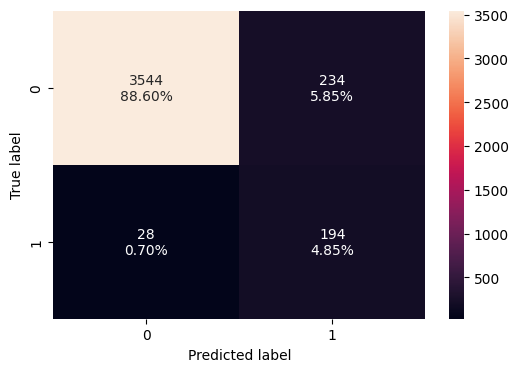

In [ ]:
## creating confusion matrix
confusion_matrix_sklearn(tuned_gb3, X_val, y_val)

##GradientBoost Tuning using RandomizedSearchCV

In [ ]:
%time
#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7] }
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_under, y_train_under) ## the code to fit the model on undersampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.3 µs
Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2} with CV score=0.9031993905922681:


In [ ]:
# Creating a new instance of GradientBoostingClassifier with the best parameters
tuned_gb4 = GradientBoostingClassifier(
    n_estimators=125,
    learning_rate=0.2,
    subsample=0.7,
    max_features=0.5,
    random_state=1
)


tuned_gb4.fit(X_train_under, y_train_under)  # Fit the model on undersampled data


GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, random_state=1, subsample=0.7)

In [ ]:
# check the performance on Training set
gb4_train_perf = model_performance_classification_sklearn(tuned_gb4, X_train_under, y_train_under)## the code to check the performance on undersampled train set
gb4_train_perf

Accuracy    Recall  Precision        F1
0  0.995495  0.990991        1.0  0.995475

In [ ]:
# Calculating different metrics on validation set
gb4_val_perf = model_performance_classification_sklearn(tuned_gb4, X_val, y_val)
print("Validation performance:")
gb4_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0    0.9345  0.873874   0.453271  0.596923

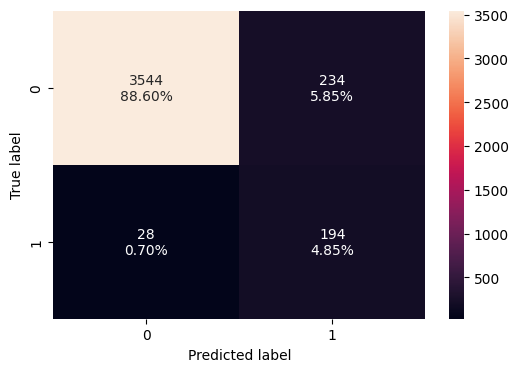

In [ ]:
## creating confusion matrix
confusion_matrix_sklearn(tuned_gb4, X_val, y_val)

##Model performance comparison and choosing the final model

**We have now tuned all the models, let's compare the performance of all tuned models and see which one is the best.**

#Training Performance Comparison

In [ ]:
# Training Performance
# Concatenate the DataFrames for training performance comparison
models_train_comp_df = pd.concat(
    [
        gb1_train_perf.T,  # Gradient Boosting with GridSearch (Oversampled)
        gb2_train_perf.T,  # Gradient Boosting with RandomSearch (Oversampled)
        xgb1_train_perf.T,  # XGBoost with GridSearch (Oversampled)
        xgb2_train_perf.T,  # XGBoost with RandomSearch (Oversampled)
        bag1_train_perf.T,  # Bagging with GridSearch (Oversampled)
        bag2_train_perf.T,  # Bagging with RandomSearch (Oversampled)
        gb3_train_perf.T,  # Gradient Boosting with GridSearch (Undersampled)
        gb4_train_perf.T,  # Gradient Boosting with RandomSearch (Undersampled)
        xgb3_train_perf.T,  # XGBoost with GridSearch (Undersampled)
        xgb4_train_perf.T,  # XGBoost with RandomSearch (Undersampled)
        bag3_train_perf.T,  # Bagging with GridSearch (Undersampled)
        bag4_train_perf.T,  # Bagging with RandomSearch (Undersampled)
    ],
    axis=1,
)

# Correct the columns naming
models_train_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data using GridSearch",
    "Gradient Boosting tuned with oversampled data using RandomizedSearch",
    "XGBoost tuned with oversampled data using GridSearch",
    "XGBoost tuned with oversampled data using RandomizedSearch",
    "Bagging tuned with oversampled data using GridSearch",
    "Bagging tuned with oversampled data using RandomizedSearch",
    "Gradient Boosting tuned with undersampled data using GridSearch",
    "Gradient Boosting tuned with undersampled data using RandomizedSearch",
    "XGBoost tuned with undersampled data using GridSearch",
    "XGBoost tuned with undersampled data using RandomizedSearch",
    "Bagging tuned with undersampled data using GridSearch",
    "Bagging tuned with undersampled data using RandomizedSearch",
]

# Print the training performance comparison DataFrame
print("Training performance comparison:")
print(models_train_comp_df)



Training performance comparison:
           Gradient Boosting tuned with oversampled data using GridSearch  \
Accuracy                                            0.950470                
Recall                                              0.926085                
Precision                                           0.973565                
F1                                                  0.949232                

           Gradient Boosting tuned with oversampled data using RandomizedSearch  \
Accuracy                                            0.963936                      
Recall                                              0.944812                      
Precision                                           0.982386                      
F1                                                  0.963233                      

           XGBoost tuned with oversampled data using GridSearch  \
Accuracy                                            0.997651      
Recall                         

##Validation Performance Comparison

In [ ]:
# Concatenate the DataFrames for validation performance comparison
models_val_comp_df = pd.concat(
    [
        gb1_val_perf.T,  # Gradient Boosting with GridSearch (Oversampled)
        gb2_val_perf.T,  # Gradient Boosting with RandomSearch (Oversampled)
        xgb1_val_perf.T,  # XGBoost with GridSearch (Oversampled)
        xgb2_val_perf.T,  # XGBoost with RandomSearch (Oversampled)
        bag1_val_perf.T,  # Bagging with GridSearch (Oversampled)
        bag2_val_perf.T,  # Bagging with RandomSearch (Oversampled)
        gb3_val_perf.T,  # Gradient Boosting with GridSearch (Undersampled)
        gb4_val_perf.T,  # Gradient Boosting with RandomSearch (Undersampled)
        xgb3_val_perf.T,  # XGBoost with GridSearch (Undersampled)
        xgb4_val_perf.T,  # XGBoost with RandomSearch (Undersampled)
        bag3_val_perf.T,  # Bagging with GridSearch (Undersampled)
        bag4_val_perf.T,  # Bagging with RandomSearch (Undersampled)
    ],
    axis=1,
)

# Correct the columns naming
models_val_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data using GridSearch",
    "Gradient Boosting tuned with oversampled data using RandomizedSearch",
    "XGBoost tuned with oversampled data using GridSearch",
    "XGBoost tuned with oversampled data using RandomizedSearch",
    "Bagging tuned with oversampled data using GridSearch",
    "Bagging tuned with oversampled data using RandomizedSearch",
    "Gradient Boosting tuned with undersampled data using GridSearch",
    "Gradient Boosting tuned with undersampled data using RandomizedSearch",
    "XGBoost tuned with undersampled data using GridSearch",
    "XGBoost tuned with undersampled data using RandomizedSearch",
    "Bagging tuned with undersampled data using GridSearch",
    "Bagging tuned with undersampled data using RandomizedSearch",
]

# Print the validation performance comparison DataFrame
print("Validation performance comparison:")
print(models_val_comp_df)



Validation performance comparison:
           Gradient Boosting tuned with oversampled data using GridSearch  \
Accuracy                                            0.962250                
Recall                                              0.882883                
Precision                                           0.610592                
F1                                                  0.721915                

           Gradient Boosting tuned with oversampled data using RandomizedSearch  \
Accuracy                                            0.971000                      
Recall                                              0.882883                      
Precision                                           0.685315                      
F1                                                  0.771654                      

           XGBoost tuned with oversampled data using GridSearch  \
Accuracy                                            0.975250      
Recall                       

1.XGBoost Tuned with Oversampled Data (using GridSearch):demonstrates excellent training performance and strong validation performance, indicating good generalization ability. However, the precision is noticeably impacted (0.732075) compared to recall (0.873874), but it remains a strong candidate given the overall high scores.

2.Gradient Boosting Tuned with Undersampled Data (using either GridSearch or RandomizedSearch):performs very well during training with undersampled data, its performance drops in validation, particularly in precision.


3.Bagging Tuned with Undersampled Data (using either GridSearch or RandomizedSearch):shows excellent training performance but relatively lower validation performance, especially in precision. While they have high recall, the precision drop impacts their F1-score.


4.Therefore, Based on the provided performance metrics, XGBoost tuned on oversampled data using GridSearch appears to be the best model.

*High Training Performance: It has very high training accuracy with excellent precision and recall, implying robust learning.

*Strong Validation Performance: Despite the drop from training to validation, the model maintains high validation accuracy (0.975250) and good F1-score (0.796715).




#Check Performance on Test set

   **Our final model is tuned_xgb1(XGBoost on oversampled data using GridSerachCV).**

   **Now we have our final model, so let's find out how our final model is performing on unseen test data.**

In [ ]:
# Define Test set

y_test = df1['Target']
X_test = df1.drop('Target', axis=1)


##XGBoost performance on Test set

In [ ]:
# Calculating different metrics on the test set
xgb1_test_perf = model_performance_classification_sklearn(tuned_xgb1, X_test, y_test) ##
print("Test performance:")
xgb1_test_perf

Test performance:


Accuracy    Recall  Precision        F1
0     0.974  0.851064   0.731707  0.786885

Observations

1.High Accuracy but Moderate Precision:While the model has high accuracy (97.4%), its precision (73.2%) is relatively lower. This indicates the model has a moderate number of false positives.

2.Good Recall:The recall of 85.1% suggests the model is fairly good at detecting actual positive instances, missing only 14.9% of positives.

3.Balanced F1-Score:The F1-score of 78.7% provides a single measure that balances precision and recall, showing that the model maintains reasonably good performance in both metrics without overly favoring one.

4.We can improve Precision by further tuning to reduce false positives might be beneficial. This could involve adjusting the classification threshold or using different algorithms or feature engineering strategies.


##Function to plot feature importance

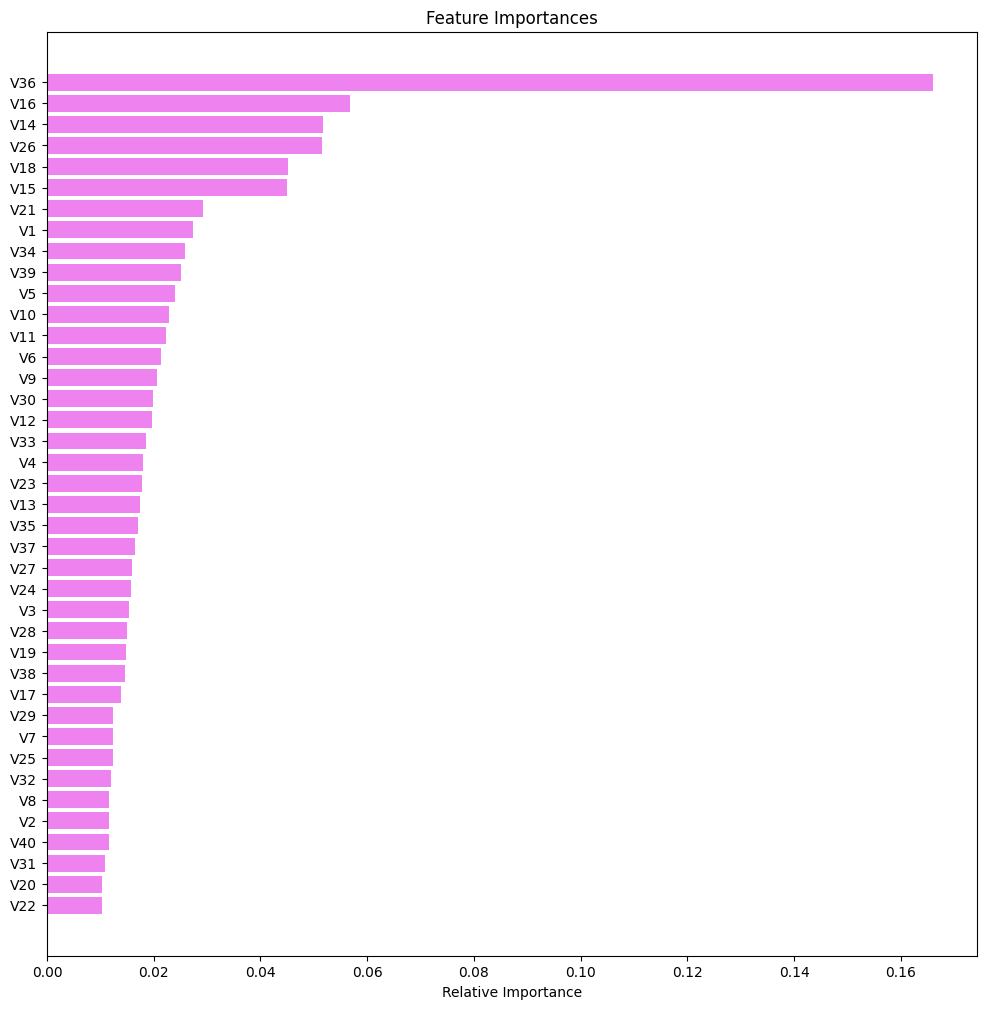

In [ ]:
import xgboost as xgb

# training DataFrame with feature names
feature_names = X_train.columns

# Extract feature importances from the XGBoost model
importances = tuned_xgb1.feature_importances_

# Get the indices that would sort the array (ascending)
indices = np.argsort(importances)

# Plot the feature importances
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()



**XGBoost model shows the relative importance of machineries or/and processes in failing.V36 and V22 have the highest and lowest relative importance respectively.

##Pipelines to Build the Final Model

1.Now that we have a final model, let's use pipelines to put the model into production. We know that we can use pipelines to standardize the model building, but the steps in a pipeline are applied to each and every variable.

2.We use Column Transformer to personalize the pipeline to perform different preprocessing steps on different columns.

#Import Necessary libraries

In [ ]:
# Import necessary libraries for creating and saving the pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import joblib
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

##Define Features

In [ ]:
# Define all numeric features
numeric_features = X_train.columns.tolist()
numeric_features


['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40']

#Fixing the missing values

In [ ]:
# We can't oversample/undersample data without doing missing value treatment, so let's first treat the missing values in the train set
imputer = SimpleImputer(strategy="median")
numeric_features = imputer.fit_transform(X1)
numeric_features
# We don't need to impute missing values in test set as it will be done inside pipeline

array([[ -4.46460639,  -4.67912903,   3.10154567, ...,  -2.36916859,
          2.95057792,  -3.48032448],
       [  3.36591227,   3.6533806 ,   0.90967142, ...,   5.908837  ,
         -0.38634531,   0.61624165],
       [ -3.83184267,  -5.82444447,   0.63403078, ...,   2.94002142,
          3.83916012,  -4.30940188],
       ...,
       [ -3.89697885,  -3.94240722,  -0.35136416, ...,  -6.40930375,
          1.47713807,  -0.87414797],
       [ -3.18732238, -10.05166156,   5.6959554 , ...,  -7.12991805,
          4.24939357,  -6.11226707],
       [ -2.68690325,   1.96118666,   6.1370877 , ...,  -2.20205649,
          1.67822859,  -1.97441277]])

##Initialize the Model

*tuned_xgb1 is already trained and considered the best model.

##Create the Pipeline

*Create a pipeline that includes the preprocessing step (StandardScaler) and
the best XGBoost model (tuned_xgb1).

In [ ]:
# Create the pipeline
Pipeline_model = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step to scale the features
    ('xgboost', tuned_xgb1)        # Your best XGBoost model
])


##Fit the Pipeline

In [ ]:
# To fit the pipeline
Pipeline_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

##Make Predictions

In [ ]:
# To make predictions on the test set
y_pred = Pipeline_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

##Evaluate the Model


*Evaluate the pipeline model on various metrics: accuracy, precision, recall, and F1-score:

In [ ]:
# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy of the final pipeline: {accuracy}")
print(f"Precision of the final pipeline: {precision}")
print(f"Recall of the final pipeline: {recall}")
print(f"F1 Score of the final pipeline: {f1}")


Accuracy of the final pipeline: 0.9878
Precision of the final pipeline: 0.987494207180226
Recall of the final pipeline: 0.9878
F1 Score of the final pipeline: 0.9874421627994532


1.The high accuracy suggests that the model is suitable for real-world application and can be relied upon for both failure and non-failure predictions, reducing the risk of unnoticed failures and false alarms.

2.With high precision, the operational team can trust that when a warning for a potential failure is issued, it is likely to be a true failure. This helps in optimizing maintenance schedules and resource allocation, avoiding unnecessary checks and interventions.

3.The high recall ensures that most of the actual failures are flagged by the model, which is crucial for preventive maintenance strategies. This helps in reducing unexpected downtimes and potential dangers associated with component failures, thereby ensuring smooth operation of the wind energy installations.

4.The high F1 score reflects the model’s balanced capability in detecting failures accurately while minimizing missed failures. This is essential for maintaining operational efficiency and reducing costs associated with both undetected failures and false alerts.

##Plot Feature Importances

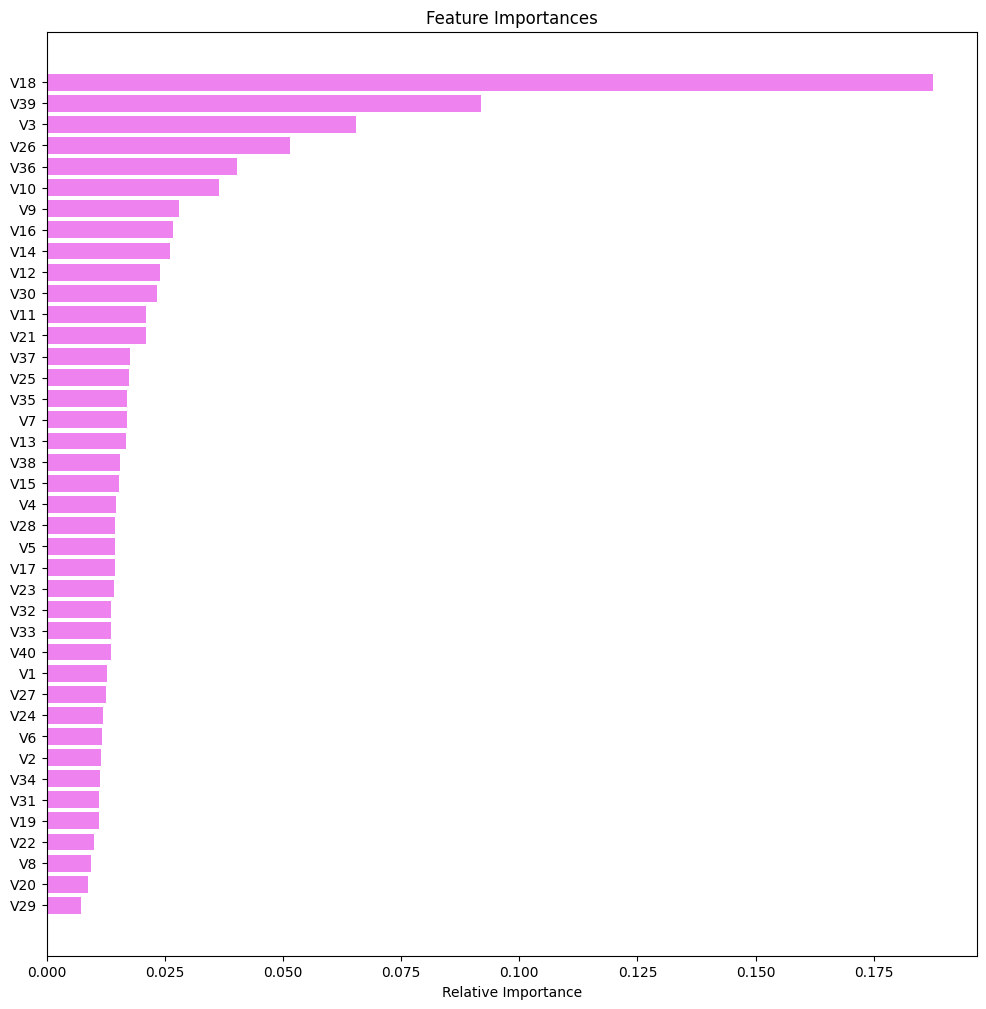

In [ ]:
def plot_feature_importances(pipeline, feature_names):
    importances = pipeline.named_steps['xgboost'].feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(12, 12))
    plt.title("Feature Importances")
    plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel("Relative Importance")
    plt.show()

# Plotting feature importances for the final model (optional)
plot_feature_importances(Pipeline_model, X_train.columns)



##Business Insights and Conclusions


*XGBoost model with Oversampled data using GridSearchCV is the best model that can help improving the machinery/processes involved in the production of wind energy by detecting their failure or breakdown before it happens.


*The reasons why XGBoost model is the best are:
1.The high accuracy suggests that the model is suitable for real-world application and can be relied upon for both failure and non-failure predictions, reducing the risk of unnoticed failures and false alarms.

2.With high precision, the operational team can trust that when a warning for a potential failure is issued, it is likely to be a true failure. This helps in optimizing maintenance schedules and resource allocation, avoiding unnecessary checks and interventions.

3.The high recall ensures that most of the actual failures are flagged by the model, which is crucial for preventive maintenance strategies. This helps in reducing unexpected downtimes and potential dangers associated with component failures, thereby ensuring smooth operation of the wind energy installations.

4.The high F1 score reflects the model’s balanced capability in detecting failures accurately while minimizing missed failures. This is essential for maintaining operational efficiency and reducing costs associated with both undetected failures and false alerts.

*The importance features plot in the final model indicates from top-down their
decreasing order of susceptible to failure and breakdown.

*The relative importance of the features are represented in the plot above. V18 ,V29, and  V3 are the first to third features with high relative importance.         
*V8,V20, and V29 are the last three wind energy machinery and or procecesses that will fail .

5.Recommendations
**Implement Preventive Maintenance Plans for components predicted to fail in order to minimize the risk of unexpected failures, reducing downtime, and extending the lifespan of components.

**Prioritize maintenance resources based on the model's predictions, focusing first on components with a high probability of failure. This practice will allow for efficient allocation of maintenance staff and resources, reducing costs and ensuring critical components are attended to promptly.

**Continuously monitor the predictions to detect any patterns or trends in component failurest o help in gaining deeper insights into common failure causes and improving the overall maintenance strategy.

**Use the failure predictions to adjust maintenance intervals dynamically, rather than following fixed schedules.This will lead to more effective use of resources and enhances the reliability of the wind energy components.

**Train the maintenance team to understand and act on model predictions. This is to ensure that they are well prepared to respond to and address potential failures accurately and efficiently.

**Integrate the XGBoost model into existing maintenance management systems for automated alerts and work order generation to streamlines the maintenance process and ensure timely interventions based on model predictions.

** Periodically retrain the model with new data to maintain its accuracy and relevance to ensure that the model adapts to any changes in data patterns or operational conditions, maintaining high performance.

**Use the feature importance scores from the XGBoost model to understand what factors contribute most to component failures.This will help your organization in providing actionable insights for design improvements, procurement decisions, and operation adjustments to mitigate failure risks.